<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge
> This project is to develop a model to predict the price of property at sale for the Ames city, Iowa

# Problem Statements / Background / Datasets

## Problem Statement

We are group of data scientists that working for a Real Estate Investment Firm. We are assigned to develop a model to predict the housing price of the property in Ames city, Iowa from the datasets given from year 2006 to 2010. We also need to provide insights and recommendation on which features that will affect positively and negatively to the selling price and how can the  property be further improved or modified to increase the housing price. Eventually the model can allow the firm to grab investment opportunities and maximize the investment return.

### Table of Contents:
- [Background](#Background)
    - [Outside Research](#Outside-Research)
- [Imports Data and Libraries](#Imports-Data-and-Libraries)
    - [Load Data](#Load-Data)
- [Data Cleaning and Missing Values Imputation](#Data-Cleaning-and-Missing-Values-Imputation)
    - [Create Functions](#Create-Functions)
    - [Data Dictionary](#Data-Dictionary)
    - [Data Cleaning](#Data-Cleaning)
    - [Missing Values Imputation](#Missing-Values-Imputation)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Outliers](#Outliers)
- [Feature Engineering and Preprocessing](#Feature-Engineering-and-Preprocessing)
    - [Multicollinearity](#Multicollinearity)
    - [Dummify Categorical Variables](#Dummify-Categorical-Variables)
- [Model Preparation and Selection](#Model-Preparation-and-Selection)
    - [Scaling](#Scaling)
    - [Train Test Split](#Train-Test-Split)
    - [Baseline Model: Linear Regression](#Baseline-Model:-Linear-Regression)
    - [Regularization: Ridge and Lasso Regression](#Regularization:-Ridge-and-Lasso-Regression)
- [Modeling and Evaluation](#Modeling-and-Evaluation)
    - [Hyperparameters: GridSearchCV](#Hyperparameters:-GridSearchCV)
    - [Predictive Model](#Predictive-Model)
    - [Kaggle Challenge RMSE Score](#Kaggle-Challenge-RMSE-Score)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
    - [Findings](#Findings)
    - [Recommendations](#Recommendations)
    - [Future Enhancements](#Future-Enhancements)
    - [Citations](#Citations)

## Background

US Real estate is a dynamic industry where adapt and evolves quickly. However, there will always be handful of problems and challenges that investors facing in the real estate market. According to one of the member of Forbes Real Estate Council, *Richard Lackey, City Commercial Real Estate, Inc.*
> *A major challenge is the huge gap between the bid and ask. Generally speaking, commercial real estate buyers want a 30% discount where commercial real estate sellers are only prepared to offer a 5% discount. While property type and location sway discounts, a price decrease is generally more in support of the seller's position than the buyer's. Industrial and multifamily are doing the best while retail and hospitality are doing the worst. - source: [Forbes](https://www.forbes.com/sites/forbesrealestatecouncil/2021/01/11/16-challenges-for-real-estate-investors-and-how-to-deal-with-them/?sh=6fab694950e7)*

The huge gap between bid and ask housing price may not a good sign for a real estate investment firm as the housing price fluctuate too much may caused a lot of uncertainties for the investment return, we need to have a stable and predictable housing market so real estate investment firm able to find the location or the house type with good investment and potential value. We need to build a model that able to predict the housing price fairly and accurately, so the investment firm able to grab the investment opportunities on those houses sold undervalue or overvalue and maximize the investment return.

According to [Neighborhood Scout](https://www.neighborhoodscout.com/ia/ames) Ames city is a larger medium-sized city located in the state of Iowa and Ames is the eighth largest community in Iowa. Ames real estate is some of the most expensive in Iowa, hence we decided to take the datasets from Ames City, Iowa for our model building.

### Outside Research

*Ames is a larger medium-sized city located in the state of Iowa. With a population of 66,258 people and 13 constituent neighborhoods, Ames is the eighth largest community in Iowa.* 

*Ames real estate is some of the most expensive in Iowa, although Ames house values don't compare to the most expensive real estate in the U.S.*

*Ames is a decidedly white-collar city, with fully 86.11% of the workforce employed in white-collar jobs, well above the national average. Overall, Ames is a city of professionals, service providers, and sales and office workers. There are especially a lot of people living in Ames who work in teaching (16.64%), office and administrative support (9.55%), and food service (9.18%).*

*And if you like science, one thing you'll find is that Ames has lots of scientists living in town - whether they be life scientists, physical scientists (like astronomers), or social scientists (like geographers!). So, if you're scientific-minded, you might like it here too.*

*Not only is Ames a city with many college students, but it also retains many recent graduates who are looking to start new careers, shaping the character of the city into a place that is geared toward, and considered attractive to, many single, educated people. Many singles consider Ames a good place to live without being in a really big city, with opportunities for friendships and fun with others like themselves.*

*One of the benefits of Ames is that there is very little traffic. The average commute to work is 17.76 minutes, which is substantially less than the national average. Not only does this mean that the drive to work is less aggravating, but noise and pollution levels are lower as a result.* 

Source: [Neighborhood Scout](https://www.neighborhoodscout.com/ia/ames)

In order to build a good predictive model on the Ames housing price, not only the dataset is important, we also need further domain knowledge on the property industry to build a good model by using the right/ most related features to train our model.

There are 8 critical factors that influence a home’s value [source here](https://www.opendoor.com/w/blog/factors-that-influence-home-value).

    1. Neighborhood comps
    2. Location
    3. Home size and usable space
    4. Age and condition
    5. Upgrades and updates
    6. The local market
    7. Economic indicators
    8. Interest rates


## Imports Data and Libraries

In [1]:
# import all libraries needed for usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from statistics import mode

from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

### Load Data

In [2]:
# load the train and test dataset
ames = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [3]:
# show the shape and first 2 rows of the dataset
print(ames.shape)
ames.head(2)

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [4]:
# show the shape and first 2 rows of the dataset
print(test.shape)
test.head(2)

(878, 80)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


# Data Cleaning and Missing Values Imputation

### Create Functions

In [5]:
# functions to check null values
def check_null(df):
    print(f'Current Dataframe Shape: {df.shape}')
    print(f'Total Missing in Values: {sum(df.isnull().sum())}')
    print(f'Total Missing in Columns: {sum(df.isnull().sum().values>0)}')
    print(f'Total Missing Value in any Rows: {sum(df.isnull().any(axis=1))}')
        
    # check the columns with nulls amount and percentage
    ames_null_df = pd.DataFrame(df.isnull().sum().reset_index())
    ames_null_df.columns = ['Columns','Total_Nulls']
    ames_null_df['%Nulls'] = round(ames_null_df['Total_Nulls']/df.shape[0]*100,2)
    return (ames_null_df[ames_null_df['Total_Nulls']>0].sort_values(by='Total_Nulls', ascending=False))

In [6]:
# functions to check pearson correlation coefficient above 0.5 and below -0.5
def check_corr(df, col_name):
    pearson_coef = df.corr()[col_name].sort_values(ascending=False)
    pearson_coef_high = pearson_coef[abs(pearson_coef)>=0.5]
    return round(pearson_coef_high.sort_values(ascending=False),2)

In [7]:
# function to check upper limit and lower limit for outliers
def check_iqr(df_col):
    q1, q3 = np.percentile(df_col, [25,95])
    iqr = q3 - q1
    upper_lim = q3 + (1.5*iqr)
    lower_lim = q1 - (1.5*iqr)
    return upper_lim, lower_lim

In [8]:
# create a function to save the rows index to drop due to outliers
rows_to_drop =[]

def add_rows_to_drop(rows_list):
    for rows in rows_list:
        if not rows in rows_to_drop:
            rows_to_drop.append(rows)
    return rows_to_drop

In [9]:
# create check rank function to apply row
def check_rank(row):
    if row <= 7:
        return 1
    elif row <=14:
        return 2
    elif row <=21:
        return 3
    else:
        return 4

## Data Dictionary

**Ames Housing Data Dictionary** can refer to [here](https://web.archive.org/web/20201203235151/http://jse.amstat.org/v19n3/Decock/DataDocumentation.txt)

## Data Cleaning

In [10]:
# rename the column name
ames.columns = ames.columns.str.replace(' ','_')
test.columns = test.columns.str.replace(' ','_')

According to the data dictionary, the Parcel ID (PID) in the data set are nominal values (non-numeric) so preceding 0’s must be included in the data entry field on the [Beacon website](https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=2&PageID=1104)

In [11]:
# add 0 in front of PID
ames['PID'] = '0' + ames['PID'].astype(str)
test['PID'] = '0' + test['PID'].astype(str)

In [12]:
# Change variable type to object
ames = ames.astype({'Id':'object','MS_SubClass':'object'})
test = test.astype({'Id':'object','MS_SubClass':'object'})

In [13]:
# categorize category Column and Numeric Column
category_col = ames.select_dtypes(include = 'O').columns
numeric_col = ames.select_dtypes(exclude = 'O').columns

In [14]:
#check length of category columns and numeric columns
print(f'Category Columns: {len(category_col)}')
print(f'Numeric Columns: {len(numeric_col)}')

Category Columns: 45
Numeric Columns: 36


In general, data can be distinguished into String / Object (category) type and Integer / Float (numeric) type. We then further segregate the category variables into ordinal variables which the object variables is in scale range and nominal variables. We also segregate our numeric columns into discrete numeric columns and continuos numeric columns as per below.

In [15]:
# further categorize category columns into ordinary and norminal columns, numeric columns into discrete and continuos columns
# ordinal categorical columns - 23 columns
ord_columns = ['Lot_Shape', 'Utilities' ,'Land_Slope', 'Overall_Qual', 'Overall_Cond', 'Exter_Qual', 'Exter_Cond', 
                   'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating_QC' , 'Electrical', 
                   'Kitchen_Qual', 'Functional' , 'Fireplace_Qu', 'Garage_Finish', 'Garage_Qual', 'Garage_Cond', 'Paved_Drive',
                   'Pool_QC', 'Fence' ]

# nominal categorical columns, there is no sale condition (stated in data description) - 24 columns
nom_columns = ['Id','PID','MS_SubClass','MS_Zoning','Street','Alley','Land_Contour','Lot_Config','Neighborhood',
                    'Condition_1','Condition_2','Bldg_Type','House_Style','Roof_Style','Roof_Matl','Exterior_1st',
                    'Exterior_2nd','Mas_Vnr_Type','Foundation','Heating','Central_Air','Garage_Type','Misc_Feature',
                    'Sale_Type']

# discrete numeric columns - 14 columns
disc_columns = ['Year_Built','Year_Remod/Add','Bsmt_Full_Bath','Bsmt_Half_Bath','Full_Bath','Half_Bath','Bedroom_AbvGr',
                    'Kitchen_AbvGr','TotRms_AbvGrd','Fireplaces','Garage_Yr_Blt','Garage_Cars','Mo_Sold','Yr_Sold']

# continuos numeric columns - 20 columns
cont_columns = ['Lot_Frontage','Lot_Area','Mas_Vnr_Area','BsmtFin_SF_1','BsmtFin_SF_2','Bsmt_Unf_SF','Total_Bsmt_SF',
                '1st_Flr_SF','2nd_Flr_SF','Low_Qual_Fin_SF','Gr_Liv_Area','Garage_Area','Wood_Deck_SF','Open_Porch_SF',
                'Enclosed_Porch','3Ssn_Porch','Screen_Porch','Pool_Area','Misc_Val','SalePrice']


### Missing Values Imputation

In [16]:
# check the null values status
check_null(ames)

Current Dataframe Shape: (2051, 81)
Total Missing in Values: 9822
Total Missing in Columns: 26
Total Missing Value in any Rows: 2051


,Columns,Total_Nulls,%Nulls
73,Pool_QC,2042,99.56
75,Misc_Feature,1986,96.83
7,Alley,1911,93.17
74,Fence,1651,80.50
58,Fireplace_Qu,1000,48.76
4,Lot_Frontage,330,16.09
60,Garage_Yr_Blt,114,5.56
65,Garage_Cond,114,5.56
64,Garage_Qual,114,5.56
61,Garage_Finish,114,5.56


In [17]:
# check the null values status
check_null(test)

Current Dataframe Shape: (878, 80)
Total Missing in Values: 4171
Total Missing in Columns: 19
Total Missing Value in any Rows: 878


,Columns,Total_Nulls,%Nulls
73,Pool_QC,874,99.54
75,Misc_Feature,837,95.33
7,Alley,820,93.39
74,Fence,706,80.41
58,Fireplace_Qu,422,48.06
4,Lot_Frontage,160,18.22
60,Garage_Yr_Blt,45,5.13
61,Garage_Finish,45,5.13
64,Garage_Qual,45,5.13
65,Garage_Cond,45,5.13


In [18]:
# check target response missing data
print(f'Total Missing Values for Target Response: {ames.SalePrice.isnull().sum()}')

Total Missing Values for Target Response: 0


There are total of 27 features with missing values, before we proceed with the missing data imputation, we need to categorize these features into different categories in order to use different method of imputations.

Category 1 - Categorical Variable Columns with missing values stated as **"NA / Not Available"** in data dictionary
- **Features:** 
> `Alley`, `Bsmt_Qual`, `Bsmt_Cond`, `Bsmt_Exposure`, `BsmtFin_Type_1`, `BsmtFin_Type_2`, `Fireplace_Qu`, `Garage_Type`, `Garage_Finish`, `Garage_Qual`, `Garage_Cond`, `Pool_QC`, `Fence`, `Misc_Feature`

    - **Imputation Method:** Replace missing value with `NA` (Not Available) as per **Ames Housing Data Dictionary** can refer to [here](https://web.archive.org/web/20201203235151/http://jse.amstat.org/v19n3/Decock/DataDocumentation.txt)

---
Category 2 - Numeric Columns with missing values
- **Features 1:** 
> `BsmtFin_SF_1` , `BsmtFin_SF_2` , `Bsmt_Unf_SF`, `Total_Bsmt_SF` , `Bsmt_Full_Bath` , `Bsmt_Half_Bath`
     - **Imputation Method:** Replace missing value with 0


- **Features 2:**
> `Garage_Cars` , `Garage_Area` , `Garage_Yr_Blt` 
     - **Imputation Method:** Filter `Garage_Finish` equal to **"NA"** and replace features with missing value by 0


- **Features 3:**
> `Lot_Frontage` 
    - **Imputation Method:** Drop the `Lot_Frontage` column
    

---
Category 3 - Other Categorical Variables Columns with missing values **NOT** stated as "NA / Not Available" in data dictionary, it is missing value (null)
- **Features:** 
> `Electrical`
     - **Imputation Method:** Filter `Utilities` equal to **"AllPub"** & `Neighborhood` equal to **'Timber'**, results shows `Electrical` only under **"SBrkr"**, hence replace missing values with **"SBrkr"**


- **Features:** 
> `Mas_Vnr_Area` , `Mas_Vnr_Type`
     
    - **Imputation Method:** Replace missing values in `Mas_Vnr_Type` with **"None"** and replace missing values in `Mas_Vnr_Area` by 0

### Missing Values Imputation - Categorical columns

In [19]:
# Impute the missing values in categorical string columns
# checking unique values in all categorical string columns and assign to a dictionary
str_col_ames_unique_dict = {}
str_col_test_unique_dict = {}

for col in category_col:
    str_col_ames_unique_dict[col] = list(ames[col].unique())
    str_col_test_unique_dict[col] = list(test[col].unique())

In [20]:
# check and filter the null values in the unique values dictionary
null_str_col_ames_list = []

for str_col, str_var in str_col_ames_unique_dict.items():
    if np.nan in str_var:
        null_str_col_ames_list.append(str_col)
        print(f'{str_col}: {str_var}')

Alley: [nan, 'Pave', 'Grvl']
Mas_Vnr_Type: ['BrkFace', 'None', nan, 'Stone', 'BrkCmn']
Bsmt_Qual: ['TA', 'Gd', 'Fa', nan, 'Ex', 'Po']
Bsmt_Cond: ['TA', 'Gd', nan, 'Fa', 'Po', 'Ex']
Bsmt_Exposure: ['No', 'Gd', 'Av', nan, 'Mn']
BsmtFin_Type_1: ['GLQ', 'Unf', 'ALQ', 'Rec', nan, 'BLQ', 'LwQ']
BsmtFin_Type_2: ['Unf', 'Rec', nan, 'BLQ', 'GLQ', 'LwQ', 'ALQ']
Fireplace_Qu: [nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa']
Garage_Type: ['Attchd', 'Detchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort']
Garage_Finish: ['RFn', 'Unf', 'Fin', nan]
Garage_Qual: ['TA', 'Fa', nan, 'Gd', 'Ex', 'Po']
Garage_Cond: ['TA', 'Fa', nan, 'Po', 'Gd', 'Ex']
Pool_QC: [nan, 'Fa', 'Gd', 'Ex', 'TA']
Fence: [nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw']
Misc_Feature: [nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev']


In [21]:
# check and filter the null values in the unique values dictionary
null_str_col_test_list = []

for str_col, str_var in str_col_test_unique_dict.items():
    if np.nan in str_var:
        null_str_col_test_list.append(str_col)
        print(f'{str_col}: {str_var}')

Alley: ['Grvl', nan, 'Pave']
Mas_Vnr_Type: ['None', 'BrkFace', 'Stone', 'BrkCmn', 'CBlock', nan]
Bsmt_Qual: ['Fa', 'Gd', 'TA', 'Ex', nan, 'Po']
Bsmt_Cond: ['TA', 'Gd', nan, 'Fa']
Bsmt_Exposure: ['No', 'Av', nan, 'Mn', 'Gd']
BsmtFin_Type_1: ['Unf', 'GLQ', 'BLQ', 'Rec', 'ALQ', nan, 'LwQ']
BsmtFin_Type_2: ['Unf', 'LwQ', nan, 'ALQ', 'GLQ', 'Rec', 'BLQ']
Electrical: ['FuseP', 'SBrkr', 'FuseA', 'FuseF', nan]
Fireplace_Qu: [nan, 'Gd', 'Fa', 'TA', 'Po', 'Ex']
Garage_Type: ['Detchd', 'Attchd', 'BuiltIn', nan, '2Types', 'CarPort', 'Basment']
Garage_Finish: ['Unf', 'Fin', 'RFn', nan]
Garage_Qual: ['Po', 'TA', 'Fa', nan, 'Gd']
Garage_Cond: ['Po', 'TA', nan, 'Fa', 'Gd', 'Ex']
Pool_QC: [nan, 'Ex', 'TA']
Fence: [nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw']
Misc_Feature: [nan, 'Shed', 'Othr', 'Gar2']


- after check the [Data Dictionary](https://web.archive.org/web/20201203235151/http://jse.amstat.org/v19n3/Decock/DataDocumentation.txt), `Mas_Vnr_Type` and `Electrical` are both having real missing values

In [22]:
# remove Mas_Vnr_Type and Electrical from the list
null_str_col_ames_list = [col for col in null_str_col_ames_list if col not in ('Mas_Vnr_Type')]
null_str_col_test_list = [col for col in null_str_col_test_list if col not in ('Mas_Vnr_Type','Electrical')]

In [23]:
# replace null value with not available (NA)
for col in null_str_col_ames_list:
    ames[col] = ames[col].replace(np.nan, 'NA')

for col in null_str_col_test_list:    
    test[col] = test[col].replace(np.nan, 'NA')

In [24]:
# check current null status
check_null(ames)

Current Dataframe Shape: (2051, 81)
Total Missing in Values: 498
Total Missing in Columns: 12
Total Missing Value in any Rows: 455


,Columns,Total_Nulls,%Nulls
4,Lot_Frontage,330,16.09
60,Garage_Yr_Blt,114,5.56
26,Mas_Vnr_Type,22,1.07
27,Mas_Vnr_Area,22,1.07
48,Bsmt_Full_Bath,2,0.10
49,Bsmt_Half_Bath,2,0.10
35,BsmtFin_SF_1,1,0.05
37,BsmtFin_SF_2,1,0.05
38,Bsmt_Unf_SF,1,0.05
39,Total_Bsmt_SF,1,0.05


In [25]:
# check current null status
check_null(test)

Current Dataframe Shape: (878, 80)
Total Missing in Values: 208
Total Missing in Columns: 5
Total Missing Value in any Rows: 202


,Columns,Total_Nulls,%Nulls
4,Lot_Frontage,160,18.22
60,Garage_Yr_Blt,45,5.13
26,Mas_Vnr_Type,1,0.11
27,Mas_Vnr_Area,1,0.11
43,Electrical,1,0.11


### Missing Values Imputation - Numeric columns

In [26]:
# Impute the missing values in numeric columns
# filter out any missing rows for the basement type of variables
ames_bsmt_missing = ames[ames[['Bsmt_Full_Bath','Bsmt_Half_Bath','BsmtFin_SF_2', 
                         'BsmtFin_SF_1','Bsmt_Unf_SF','Total_Bsmt_SF']].isnull().any(axis=1)]

# filter out any missing rows for the Garage_Cars and Garage_Area
ames_garage_mising = ames[ames[['Garage_Yr_Blt','Garage_Cars','Garage_Area']].isnull().any(axis=1)]
test_garage_mising = test[test[['Garage_Yr_Blt','Garage_Cars','Garage_Area']].isnull().any(axis=1)]

In [27]:
# create a list of columns related to basement
ames_bsmt = ['BsmtFin_SF_1','BsmtFin_SF_2','BsmtFin_Type_1','BsmtFin_Type_2','Bsmt_Cond',
              'Bsmt_Exposure','Bsmt_Full_Bath','Bsmt_Half_Bath','Bsmt_Qual','Bsmt_Unf_SF','Total_Bsmt_SF']

# create a list of columns related to garage
ames_garage = ['PID','Garage_Area','Garage_Cars','Garage_Cond','Garage_Finish','Garage_Qual','Garage_Type','Garage_Yr_Blt',]

In [28]:
# check the basement availablity, and no basement means no bathrooms
ames_bsmt_missing[ames_bsmt]

,BsmtFin_SF_1,BsmtFin_SF_2,BsmtFin_Type_1,BsmtFin_Type_2,Bsmt_Cond,Bsmt_Exposure,Bsmt_Full_Bath,Bsmt_Half_Bath,Bsmt_Qual,Bsmt_Unf_SF,Total_Bsmt_SF
616,0.0,0.0,NA,NA,NA,NA,NaN,NaN,NA,0.0,0.0
1327,NaN,NaN,NA,NA,NA,NA,NaN,NaN,NA,NaN,NaN


In [29]:
# check the garage availablity, and no finished garage means no Garage_Yr_Blt, Garage_Cars and Garage_Area
# however there is garage type of Detched found
ames_garage_mising[ames_garage].sort_values(by='Garage_Type', ascending=True).head(3)

,PID,Garage_Area,Garage_Cars,Garage_Cond,Garage_Finish,Garage_Qual,Garage_Type,Garage_Yr_Blt
1712,0910201180,NaN,NaN,NA,NA,NA,Detchd,NaN
28,0911103060,0.0,0.0,NA,NA,NA,NA,NaN
1439,0902128075,0.0,0.0,NA,NA,NA,NA,NaN


In [30]:
# check the numbers of na garage finish and show detchd in garage type
ames_garage_mising[ames_garage][['Garage_Finish','Garage_Type']].value_counts()

Garage_Finish  Garage_Type
NA             NA             113
               Detchd           1
dtype: int64

- filter out by `Garage_Finish`, and realize that the Detchd is entry error as no garage finish should not have any garage type

In [31]:
# check the garage availablity, and no finished garage means no Garage_Yr_Blt, Garage_Cars and Garage_Area
test_garage_mising[ames_garage].sort_values(by='Garage_Type', ascending=False).head(3)

,PID,Garage_Area,Garage_Cars,Garage_Cond,Garage_Finish,Garage_Qual,Garage_Type,Garage_Yr_Blt
29,0534451020,0,0,NA,NA,NA,NA,NaN
45,0923228150,0,0,NA,NA,NA,NA,NaN
482,0923228130,0,0,NA,NA,NA,NA,NaN


In [32]:
# check the numbers of na garage finish and show detchd in garage type
test_garage_mising[ames_garage][['Garage_Finish','Garage_Type']].value_counts()

Garage_Finish  Garage_Type
NA             NA             44
               Detchd          1
dtype: int64

- filter out by `Garage_Finish`, and realize that the Detchd is entry error as no garage finish should not have any garage type
- Cross check with [Beacon Website](https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=4&PageID=1108&Q=1339173726&KeyValue=0903426160) confirm that the unit did not have garage, hence there was also entry error on `Garage_Area` and `Garage_Cars`

In [33]:
# replace the entry error with 0 on Garage_Area and Garage_Cars
ames['Garage_Area'] = np.where((ames['Garage_Area'] != 0) & (ames['Garage_Finish'] == 'NA'), 0, ames['Garage_Area'])
ames['Garage_Cars'] = np.where((ames['Garage_Cars'] != 0) & (ames['Garage_Finish'] == 'NA'), 0, ames['Garage_Cars'])

test['Garage_Area'] = np.where((test['Garage_Area'] != 0) & (test['Garage_Finish'] == 'NA'), 0, test['Garage_Area'])
test['Garage_Cars'] = np.where((test['Garage_Cars'] != 0) & (test['Garage_Finish'] == 'NA'), 0, test['Garage_Cars'])


In [34]:
# replace the entry error with NA
ames['Garage_Type'] = np.where((ames['Garage_Type'] == 'Detchd') & (ames['Garage_Finish'] == 'NA'), 'NA',ames['Garage_Type'])
test['Garage_Type'] = np.where((test['Garage_Type'] == 'Detchd') & (test['Garage_Finish'] == 'NA'), 'NA',test['Garage_Type'])

In [35]:
# describe the garage built year
ames.Garage_Yr_Blt.describe() #entry typo on year 2207

count    1937.000000
mean     1978.707796
std        25.441094
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: Garage_Yr_Blt, dtype: float64

In [36]:
# describe the garage built year
test.Garage_Yr_Blt.describe()

count     833.000000
mean     1976.759904
std        25.689763
min      1900.000000
25%      1960.000000
50%      1978.000000
75%      2001.000000
max      2010.000000
Name: Garage_Yr_Blt, dtype: float64

In [37]:
# check PID
ames[ames.Garage_Yr_Blt > 2010][['PID','Garage_Yr_Blt','Year_Built']]

,PID,Garage_Yr_Blt,Year_Built
1699,0916384070,2207.0,2006


- we found there was a typo error that garage year build is 2207 
- we can replace the Garage Year Built witht the house Year Built for simplicity, however we take extra steps to further verify with [Beacon Website](https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=4&PageID=1108&Q=382215130&KeyValue=0916384070) and confirm that the garage built year is 2007 instead of built year 2006


In [38]:
# repalce null value of Bsmt_Full_Bath, Bsmt_Half_Bath, BsmtFin_SF_1, BsmtFin_SF_2, Bsmt_Unf_SF, Total_Bsmt_SF with 0
for col in ['Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF']:
    ames[col].replace(np.nan, 0, inplace = True)

# filter Garage_Finish equal to NA, then replace null value of Garage_Yr_Blt, Garage_Cars and Garage_Area with 0
ames['Garage_Cars'].fillna(0, inplace=True)
ames['Garage_Area'].fillna(0, inplace=True)
test['Garage_Cars'].fillna(0, inplace=True)
test['Garage_Area'].fillna(0, inplace=True)

# replace the missing value in garage built year
ames['Garage_Yr_Blt'] = np.where((ames['Garage_Finish'] == 'NA') & (ames['Garage_Yr_Blt'] != 0), 'NA',ames['Garage_Yr_Blt'])
test['Garage_Yr_Blt'] = np.where((test['Garage_Finish'] == 'NA') & (test['Garage_Yr_Blt'] != 0), 'NA',test['Garage_Yr_Blt'])

# under Garage_Yr_Blt, there is entry typo of year 2207, replace with year build 2006
ames['Garage_Yr_Blt'].replace(2207, 2007, inplace= True)

In [39]:
# check current null status
check_null(ames)

Current Dataframe Shape: (2051, 81)
Total Missing in Values: 374
Total Missing in Columns: 3
Total Missing Value in any Rows: 346


,Columns,Total_Nulls,%Nulls
4,Lot_Frontage,330,16.09
26,Mas_Vnr_Type,22,1.07
27,Mas_Vnr_Area,22,1.07


In [40]:
# check current null status
check_null(test)

Current Dataframe Shape: (878, 80)
Total Missing in Values: 163
Total Missing in Columns: 4
Total Missing Value in any Rows: 162


,Columns,Total_Nulls,%Nulls
4,Lot_Frontage,160,18.22
26,Mas_Vnr_Type,1,0.11
27,Mas_Vnr_Area,1,0.11
43,Electrical,1,0.11


In [41]:
# check correlation between Lot_Frontage and SalePrice
round(ames[['Lot_Frontage','SalePrice']].corr(),4)

,Lot_Frontage,SalePrice
Lot_Frontage,1.0000,0.3418
SalePrice,0.3418,1.0000


We noted that there are total of 490 rows of null values in column `Lot_Frontage` in both ames and test datasets which is more than 16% of the respective data set. In view of the `Lot_Frontage` do not have strong correlation with the `SalePrice`, Pearson Correlation Coefficient shows only 0.34, hence we decided to drop the column.

In [42]:
# drop lot frontage columns
ames.drop(columns='Lot_Frontage', axis=1, inplace = True)
test.drop(columns='Lot_Frontage', axis=1, inplace = True)

In [43]:
# update the variables list
cont_columns.remove('Lot_Frontage')

In [44]:
# check null status
check_null(ames)

Current Dataframe Shape: (2051, 80)
Total Missing in Values: 44
Total Missing in Columns: 2
Total Missing Value in any Rows: 22


,Columns,Total_Nulls,%Nulls
25,Mas_Vnr_Type,22,1.07
26,Mas_Vnr_Area,22,1.07


In [45]:
# check null status
check_null(test)

Current Dataframe Shape: (878, 79)
Total Missing in Values: 3
Total Missing in Columns: 3
Total Missing Value in any Rows: 2


,Columns,Total_Nulls,%Nulls
25,Mas_Vnr_Type,1,0.11
26,Mas_Vnr_Area,1,0.11
42,Electrical,1,0.11


### Missing Values Imputation - Other Variables

In [46]:
# the missing values in Electrical can be identify by the same Utilities and Neighborhood
test[(test['Utilities'] == 'AllPub') & 
  (test['Neighborhood'] == 'Timber')][['Utilities','Neighborhood','Electrical']].groupby(['Neighborhood','Utilities'])['Electrical'].count()

Neighborhood  Utilities
Timber        AllPub       23
Name: Electrical, dtype: int64

In [47]:
# check the neighborhood with Timber and Utitlities under AllPub
test[(test['Utilities'] == 'AllPub')& (test['Neighborhood'] == 'Timber')]['Electrical'].unique()

array(['SBrkr', nan], dtype=object)

In [48]:
# replace null value with SBrkr
test['Electrical'].replace(np.nan, 'SBrkr', inplace=True)

In [49]:
# check dataset shape and null values balance
check_null(test)

Current Dataframe Shape: (878, 79)
Total Missing in Values: 2
Total Missing in Columns: 2
Total Missing Value in any Rows: 1


,Columns,Total_Nulls,%Nulls
25,Mas_Vnr_Type,1,0.11
26,Mas_Vnr_Area,1,0.11


In [50]:
# check dataset shape and null values balance
check_null(ames)

Current Dataframe Shape: (2051, 80)
Total Missing in Values: 44
Total Missing in Columns: 2
Total Missing Value in any Rows: 22


,Columns,Total_Nulls,%Nulls
25,Mas_Vnr_Type,22,1.07
26,Mas_Vnr_Area,22,1.07


Since we unable to drop all the rows, hence we decided to replace the missing values in `Mas_Vnr_Type` with **"None"** and replace missing values in `Mas_Vnr_Area` by 0

In [51]:
# filter out Mas_Vnr_Type with none value
ames[ames.Mas_Vnr_Type=='None'][['PID','Neighborhood','Mas_Vnr_Type','Mas_Vnr_Area']].sort_values('Mas_Vnr_Area').tail()

,PID,Neighborhood,Mas_Vnr_Type,Mas_Vnr_Area
1684,0902427140,OldTown,None,1.0
1148,0535106140,NAmes,None,1.0
765,0533352075,Sawyer,None,1.0
810,0534129230,NWAmes,None,288.0
1832,0527166010,Gilbert,None,344.0


In [52]:
# filter out Mas_Vnr_Type with none value
test[test.Mas_Vnr_Type=='None'][['PID','Neighborhood','Mas_Vnr_Type','Mas_Vnr_Area']].sort_values('Mas_Vnr_Area').tail()

,PID,Neighborhood,Mas_Vnr_Type,Mas_Vnr_Area
272,0902329090,OldTown,None,0.0
261,0903453050,IDOTRR,None,0.0
877,0535327160,NAmes,None,0.0
382,0528138010,NridgHt,None,285.0
862,0527451110,BrDale,None,312.0


- Above 2 filter shows there are 2 None `Mas_Vnr_Type` with area value more than 0, after checked with Beacon website and confirm the value is available and not and entry error
- hence we decided to replace the None value in `Mas_Vnr_Type` by the mode of the same neighbohood

In [53]:
# check the majority of Mas_Vnr_Type with the same neighborhood
ames[ames['Neighborhood'] == 'Gilbert'].groupby(['Neighborhood','Mas_Vnr_Type'])['PID'].count()

Neighborhood  Mas_Vnr_Type
Gilbert       BrkCmn           1
              BrkFace         25
              None            81
              Stone            4
Name: PID, dtype: int64

In [54]:
# check the majority of Mas_Vnr_Type with the same neighborhood
ames[ames['Neighborhood'] == 'NWAmes'].groupby(['Neighborhood','Mas_Vnr_Type'])['PID'].count()

Neighborhood  Mas_Vnr_Type
NWAmes        BrkFace         64
              None            18
              Stone            5
Name: PID, dtype: int64

In [55]:
# check the majority of Mas_Vnr_Type with the same neighborhood
ames[ames['Neighborhood'] == 'NAmes'].groupby(['Neighborhood','Mas_Vnr_Type'])['PID'].count()

Neighborhood  Mas_Vnr_Type
NAmes         BrkCmn            6
              BrkFace         112
              None            179
              Stone            13
Name: PID, dtype: int64

In [56]:
# check the majority of Mas_Vnr_Type with the same neighborhood
ames[ames['Neighborhood'] == 'Sawyer'].groupby(['Neighborhood','Mas_Vnr_Type'])['PID'].count()

Neighborhood  Mas_Vnr_Type
Sawyer        BrkCmn           4
              BrkFace         32
              None            72
              Stone            3
Name: PID, dtype: int64

In [57]:
# check the majority of Mas_Vnr_Type with the same neighborhood
ames[ames['Neighborhood'] == 'OldTown'].groupby(['Neighborhood','Mas_Vnr_Type'])['PID'].count()

Neighborhood  Mas_Vnr_Type
OldTown       BrkFace           4
              None            157
              Stone             2
Name: PID, dtype: int64

In [58]:
# check the majority of Mas_Vnr_Type with the same neighborhood
test[test['Neighborhood'] == 'NridgHt'].groupby(['Neighborhood','Mas_Vnr_Type'])['PID'].count()

Neighborhood  Mas_Vnr_Type
NridgHt       BrkFace         20
              None             2
              Stone           22
Name: PID, dtype: int64

In [59]:
# check the majority of Mas_Vnr_Type with the same neighborhood
test[test['Neighborhood'] == 'BrDale'].groupby(['Neighborhood','Mas_Vnr_Type'])['PID'].count()

Neighborhood  Mas_Vnr_Type
BrDale        BrkFace         10
              None             1
Name: PID, dtype: int64

In [60]:
# replace the Mas_Vnr_Type of respective PID with the majority of Mas_Vnr_Type within same neighborhood
ames['Mas_Vnr_Type'] = np.where((ames['PID'] == '0534129230'), 'BrkFace',ames['Mas_Vnr_Type'])
ames['Mas_Vnr_Type'] = np.where((ames['PID'] == '0527166010'), 'BrkFace',ames['Mas_Vnr_Type'])
ames['Mas_Vnr_Type'] = np.where((ames['PID'] == '0535106140'), 'BrkFace',ames['Mas_Vnr_Type'])
ames['Mas_Vnr_Type'] = np.where((ames['PID'] == '0533352075'), 'BrkFace',ames['Mas_Vnr_Type'])
ames['Mas_Vnr_Type'] = np.where((ames['PID'] == '0902427140'), 'BrkFace',ames['Mas_Vnr_Type'])

test['Mas_Vnr_Type'] = np.where((test['PID'] == '0528138010'), 'Stone',test['Mas_Vnr_Type'])
test['Mas_Vnr_Type'] = np.where((test['PID'] == '0527451110'), 'BrkFace',test['Mas_Vnr_Type'])

In [61]:
# filter null values in Mas_Vnr_Type and Mas_Vnr_Area, replace with None
ames['Mas_Vnr_Type'].fillna('None', inplace=True)
ames['Mas_Vnr_Area'].replace(np.nan, 0, inplace = True)

test['Mas_Vnr_Type'].fillna('None', inplace=True)
test['Mas_Vnr_Area'].replace(np.nan, 0, inplace = True)

In [62]:
# check null status
check_null(ames)

Current Dataframe Shape: (2051, 80)
Total Missing in Values: 0
Total Missing in Columns: 0
Total Missing Value in any Rows: 0


,Columns,Total_Nulls,%Nulls


In [63]:
# check null status
check_null(test)

Current Dataframe Shape: (878, 79)
Total Missing in Values: 0
Total Missing in Columns: 0
Total Missing Value in any Rows: 0


,Columns,Total_Nulls,%Nulls


In [64]:
# found that the Mas_Vnr_Area with 0 value but with Mas_Vnr_Type
ames[(ames['Mas_Vnr_Area'] == 0) & (ames.Mas_Vnr_Type != 'None')][['PID','Mas_Vnr_Type','Mas_Vnr_Area']]

,PID,Mas_Vnr_Type,Mas_Vnr_Area
669,0528222090,BrkFace,0.0
1136,0527252070,BrkFace,0.0
1187,0528435060,Stone,0.0


In [65]:
# check test dataset without this issue
test[(test['Mas_Vnr_Area'] == 0) & (test.Mas_Vnr_Type != 'None')][['PID','Mas_Vnr_Type','Mas_Vnr_Area']]

,PID,Mas_Vnr_Type,Mas_Vnr_Area


In [66]:
# rectify the Mas_Vnr_Area with Beacon website data
ames['Mas_Vnr_Area'] = np.where((ames['PID'] == '0528222090'), 24, ames['Mas_Vnr_Area'])
ames['Mas_Vnr_Area'] = np.where((ames['PID'] == '0527252070'), 178, ames['Mas_Vnr_Area'])
ames['Mas_Vnr_Area'] = np.where((ames['PID'] == '0528435060'), 180, ames['Mas_Vnr_Area'])

After checked Beacon website and confirm `Mas_Vnr_Area` is available, hence we can replace the missing value with the masonry veneer square feet on the Beacon Website
- for PID - 0528222090, [website](https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=4&PageID=1108&Q=985735371&KeyValue=0528222090) shows Masonry Veneer (SF) of 24SF

- for PID - 0527252070, [website](https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=4&PageID=1108&Q=1230010441&KeyValue=0527252070) shows Masonry Veneer (SF) of 178SF

- for PID - 0528435060, [website](https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=4&PageID=1108&Q=1761731266&KeyValue=0528435060) shows Masonry Veneer (SF) of 180SF

## Exploratory Data Analysis

In [67]:
# Check Gr_Liv_Area is sum of 1st_Flr_SF, 2nd_Flr_SF, Low_Qual_Fin_SF
print(ames.shape)
print('Numbers of Match:' , 
      len(ames[ames['Gr_Liv_Area'] == (ames['1st_Flr_SF'] + ames['2nd_Flr_SF'] + ames['Low_Qual_Fin_SF'])]))

print(test.shape)
print('Numbers of Match:' , 
      len(test[test['Gr_Liv_Area'] == (test['1st_Flr_SF'] + test['2nd_Flr_SF'] + test['Low_Qual_Fin_SF'])]))

(2051, 80)
Numbers of Match: 2051
(878, 79)
Numbers of Match: 878


In [68]:
# check Total_Bsmt_SF is sum of BsmtFin_SF_1, BsmtFin_SF_2, Bsmt_Unf_SF
print('Numbers of Match:' , 
      len(ames[ames['Total_Bsmt_SF'] == (ames['BsmtFin_SF_1'] + ames['BsmtFin_SF_2'] + ames['Bsmt_Unf_SF'])]))

print('Numbers of Match:' , 
      len(test[test['Total_Bsmt_SF'] == (test['BsmtFin_SF_1'] + test['BsmtFin_SF_2'] + test['Bsmt_Unf_SF'])]))

Numbers of Match: 2051
Numbers of Match: 878


After checking both ames and test datasets, it shows that the `Gr_Liv_Area` and `Total_Bsmt_SF` are accurately follow formula below:
- **Gr_Liv_Area = Low_Qual_Fin_SF + 1st_Flr_SF + 2nd_Flr_SF**
- **Total_Bsmt_SF = BsmtFin_SF_1 + BsmtFin_SF_2 + Bsmt_Unf_SF**

**We started from analyzing the Ames Housing Sale Price Trend**

In [69]:
# check the sale volume month
ames.groupby(['Yr_Sold'])['SalePrice'].agg({'count','mean','median'})

,count,median,mean
Yr_Sold,,,
2006,438,159250,179471.609589
2007,498,167150,185524.514056
2008,435,163000,181750.372414
2009,446,163000,182455.244395
2010,234,155000,174180.059829


- 2007 have the highest in median housing price, average housing price and the sales volume
- 2010 have the lowest in median housing price, average housing price and the sales volume, we will look into it further to find out the reason of sales volume drop by 47%

In [70]:
# check average saleprice over 2006 - 2010
ames.SalePrice.mean()

181469.70160897123

In [71]:
# combine the year and month to year-month from train datasets
ames_price_trend = ames[['Mo_Sold','Yr_Sold','SalePrice']]
ames_price_trend['month_year'] = ames_price_trend['Yr_Sold'].astype(str) + '-' + ames_price_trend['Mo_Sold'].astype(str)
ames_price_trend['month_year'] = ames_price_trend['month_year'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m'))

# convert the average sale price by month year to dataframe
ames_price_trend = pd.DataFrame(ames_price_trend.groupby('month_year')['SalePrice'].mean().reset_index())

<ipython-input-71-5f72eea4f110>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_price_trend['month_year'] = ames_price_trend['Yr_Sold'].astype(str) + '-' + ames_price_trend['Mo_Sold'].astype(str)
<ipython-input-71-5f72eea4f110>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_price_trend['month_year'] = ames_price_trend['month_year'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m'))


In [72]:
# combine the year and month to year-month from train datasets 
ames_sale_count = ames[['Mo_Sold','Yr_Sold','SalePrice']]
ames_sale_count['month_year'] = ames_sale_count['Yr_Sold'].astype(str) + '-' + ames_sale_count['Mo_Sold'].astype(str)
ames_sale_count['month_year'] = ames_sale_count['month_year'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m'))

# convert the sale volume by month year to dataframe
ames_sale_count = pd.DataFrame(ames_sale_count.groupby('month_year')['SalePrice'].count().reset_index())

<ipython-input-72-b8d7405b6a30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_sale_count['month_year'] = ames_sale_count['Yr_Sold'].astype(str) + '-' + ames_sale_count['Mo_Sold'].astype(str)
<ipython-input-72-b8d7405b6a30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_sale_count['month_year'] = ames_sale_count['month_year'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m'))


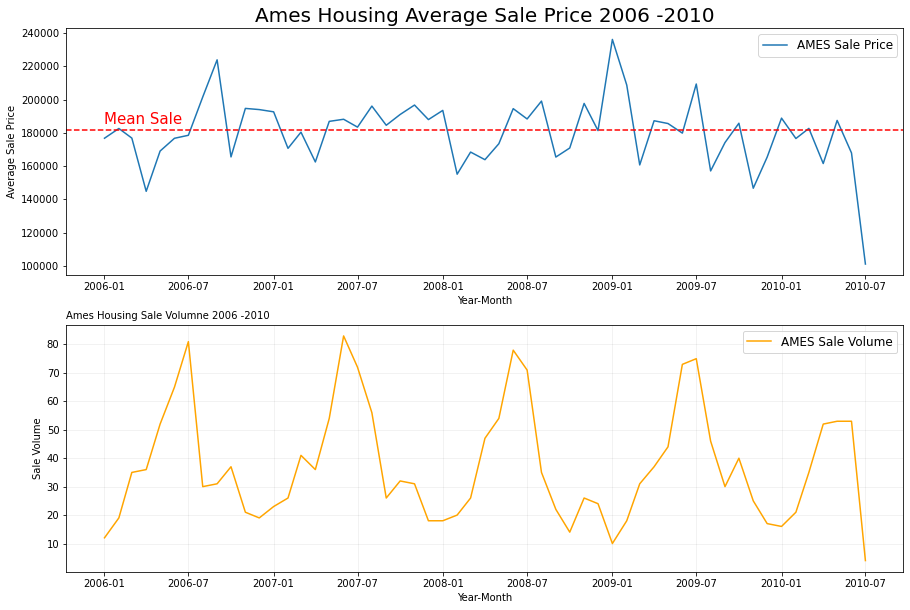

In [73]:
# plot the average sale price trendline
plt.figure(figsize = (15, 10))

# Create line plot of GOOG volume over time.
ax1 = plt.subplot(2,1,1)
ax1 = plt.plot(ames_price_trend['month_year'],
         ames_price_trend['SalePrice'],
         label = 'AMES Sale Price')

plt.legend(loc = 'upper right', fontsize = 'large')
plt.xlabel('Year-Month')
plt.ylabel('Average Sale Price')
plt.title('Ames Housing Average Sale Price 2006 -2010',fontsize=20)
plt.axhline(y=ames['SalePrice'].mean(), ls='--',color='r')
plt.text(datetime.datetime(2006,1,1), 185_000, 'Mean Sale', size=15, color='r')

# plot the sale volume trendline
ax2 = plt.subplot(2,1,2)
ax2 = plt.plot(ames_sale_count['month_year'], ames_sale_count['SalePrice'], label = 'AMES Sale Volume', color='orange')

plt.legend(loc = 'upper right', fontsize = 'large')
plt.xlabel('Year-Month')
plt.ylabel('Sale Volume')
plt.title('Ames Housing Sale Volumne 2006 -2010',fontsize=10, loc='left')

plt.grid(True, linewidth = 0.5, linestyle = '-', c = 'black', alpha = 0.1);

In [74]:
# check the sale volume by year and month
ames.groupby(['Yr_Sold', 'Mo_Sold'])['SalePrice'].agg({'count','mean'})

count           mean
Yr_Sold Mo_Sold                      
2006    1           12  176741.666667
        2           19  182592.894737
        3           35  176811.371429
        4           36  144838.666667
        5           52  169035.096154
        6           65  176706.000000
        7           81  178504.975309
        8           30  201515.400000
        9           31  223841.032258
        10          37  165510.324324
        11          21  194654.571429
        12          19  193948.947368
2007    1           23  192601.173913
        2           26  170664.000000
        3           41  180383.658537
        4           36  162476.194444
        5           54  186866.796296
        6           83  188134.759036
        7           72  183400.944444
        8           56  196047.517857
        9           26  184522.153846
        10          32  191007.375000
        11          31  196677.354839
        12          18  187939.611111
2008    1           18  193462.666667
        2           20  155126.800000
        3           26  168420.038462
        4           47  163844.148936
        5           54  173439.425926
        6           78  194507.961538
        7           71  188316.056338
        8           35  199047.028571
        9           22  165427.045455
        10          14  170871.000000
        11          26  197643.769231
        12          24  181341.208333
2009    1           10  236103.300000
        2           18  208680.166667
        3           31  160687.903226
        4           37  187237.837838
        5           44  185570.227273
        6           73  179809.506849
        7           75  209312.773333
        8           46  157089.130435
        9           30  174131.666667
        10          40  185745.700000
        11          25  146696.000000
        12          17  165395.176471
2010    1           16  188805.625000
        2           21  176564.285714
        3           35  182650.200000
        4           52  161531.807692
        5           53  187433.358491
        6           53  167896.509434
        7            4  101125.000000

The Ames Housing data from 2006 - 2010 have the average sale price of $18,1469.70

We can see the Ames housing sale price peak in Jan 2009 and start the drastic decreasing from mid 2010, this is mainly caused by the 2008 Financial Crisis, the property market had been badly affected. The low sale volumen in 2010 was mainly because of the data recorded up to July 2010, is not a full year of 2010. Hence we cannot conclude that there was a huge drop in sale volumne 2010 in Ames City, Iowa.

From the graphs above also showed there was possible of **Economic indicators** and **Interest rates** factors may impact the housing price which we do not have the data at the moment for further analysis

<Figure size 1080x720 with 0 Axes>

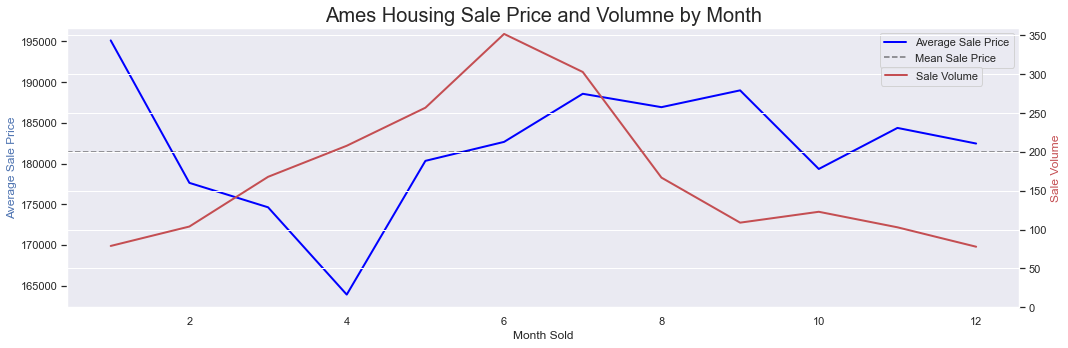

In [75]:
# plot the line chart to show the house sale price and sale volume by month
sns.set(rc = {'figure.figsize':(15,5)})
plt.figure(figsize = (15, 10))

ax = ames.groupby(['Mo_Sold'])['SalePrice'].agg({'mean','count'}).reset_index().plot(kind = 'line', x = 'Mo_Sold',
                  y = 'mean', color = 'Blue', linewidth = 2, label = 'Average Sale Price')

ax2 = ames.groupby(['Mo_Sold'])['SalePrice'].agg({'mean','count'}).reset_index().plot(kind = 'line', x = 'Mo_Sold',
                  y = 'count', color = 'r', secondary_y = True, linewidth = 2, ax = ax, label = 'Sale Volume')

ax.set_xlabel('Month Sold')
ax.set_ylabel('Average Sale Price', color = "b")
ax2.set_ylabel('Sale Volume', color = 'r')

ax2.set_ylim(0,360)
ax2.left_ax.axhline(y=ames['SalePrice'].mean(), ls='--', color="black", alpha=0.5, label = 'Mean Sale Price')

ax.legend(loc = 'best')
ax2.legend(loc = 'best', bbox_to_anchor=(0.967, 0.88, 0, 0))

plt.title('Ames Housing Sale Price and Volumne by Month',fontsize=20)
plt.tight_layout()

plt.show();

From the line plot above, we can see that the higher the average sale price tend to have lower in sale volume, when the average housing price drop, we can see the sale volume picking up. However in view of the 2010 data only collected till July, hence the sale volume will be affected after July. The line charts also shows that the average sale price top at January and follow by July and September.

In order for us to build a good predictive model, the distribution of SalePrice is crucial especially our dataset was during jan 2006 - jul 2010 and there was financial crisis happened in between.

### Target Response: SalePrice

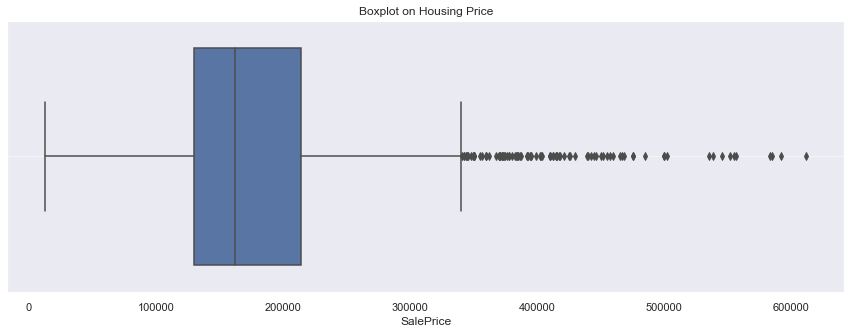

In [76]:
# Create Boxplots to check any outliers for our response - SalePrice
sns.set(rc = {'figure.figsize':(15,5)})
sns.boxplot(x='SalePrice',data=ames, orient = 'h')
plt.grid(alpha=0.5)
plt.title('Boxplot on Housing Price');

In [77]:
# describe the sale price in ames dataset
ames.SalePrice.describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

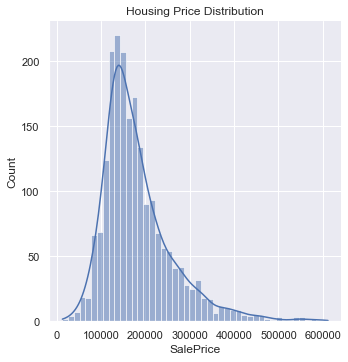

In [78]:
# Create histogram to show the distribution of the SalePrice
sns.displot(x='SalePrice',data=ames, kde=True)
plt.title('Housing Price Distribution');

- From the histogram, it shows as Right-skewed, long right-tail and was not normally distributed
- both boxplot and histogram shows that the data may have outliers, however this is our target response that we used to train our model, and we cannot simply drop the outliers, we will look into more of the other features
- we will need to perform log transformation on the saleprice to have a normal distributed target

In [79]:
# create ames category group exclude the continuos variables
ames_cat_group = ord_columns + nom_columns + disc_columns
ames_cat_group = [item for item in ames_cat_group if item not in ['Id','PID','Year_Built',
                                                                  'Year_Remod/Add','Garage_Yr_Blt','Mo_Sold','Yr_Sold']]
len(ames_cat_group) #total 54 category columns

54

In [80]:
# check each category mean sale price
for col in ames[ames_cat_group]:
    print(round(ames.groupby(col)['SalePrice'].mean().sort_values(ascending=False),2))
    print()

Lot_Shape
IR2    233954.75
IR1    211848.67
IR3    193182.22
Reg    162925.81
Name: SalePrice, dtype: float64

Utilities
AllPub    181551.6
NoSeWa    137500.0
NoSewr     57625.0
Name: SalePrice, dtype: float64

Land_Slope
Mod    204639.47
Sev    194598.00
Gtl    180358.48
Name: SalePrice, dtype: float64

Overall_Qual
10    417396.57
9     370197.38
8     271437.04
7     203430.29
6     162891.10
5     134963.64
4     107744.04
3      81309.10
2      51081.00
1      48725.00
Name: SalePrice, dtype: float64

Overall_Cond
5    207055.99
9    198177.59
8    155913.37
7    155327.27
6    148952.67
4    114034.57
3     99786.00
2     65364.83
1     59625.00
Name: SalePrice, dtype: float64

Exter_Qual
Ex    374460.31
Gd    230802.48
TA    143270.98
Fa     89801.19
Name: SalePrice, dtype: float64

Exter_Cond
Ex    236263.86
TA    185258.20
Gd    167623.02
Fa    102507.69
Po     44800.00
Name: SalePrice, dtype: float64

Bsmt_Qual
Ex    329506.62
Gd    202537.58
TA    139988.46
Fa    107752.17
N

In [81]:
# Sale Volumne by each category
for col in ames[ames_cat_group]:
    print(round(ames.groupby(col)['SalePrice'].count().sort_values(ascending=False),2))
    print()

Lot_Shape
Reg    1295
IR1     692
IR2      55
IR3       9
Name: SalePrice, dtype: int64

Utilities
AllPub    2049
NoSeWa       1
NoSewr       1
Name: SalePrice, dtype: int64

Land_Slope
Gtl    1953
Mod      88
Sev      10
Name: SalePrice, dtype: int64

Overall_Qual
5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: SalePrice, dtype: int64

Overall_Cond
5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: SalePrice, dtype: int64

Exter_Qual
TA    1247
Gd     697
Ex      81
Fa      26
Name: SalePrice, dtype: int64

Exter_Cond
TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: SalePrice, dtype: int64

Bsmt_Qual
TA    887
Gd    864
Ex    184
Fa     60
NA     55
Po      1
Name: SalePrice, dtype: int64

Bsmt_Cond
TA    1834
Gd      89
Fa      65
NA      55
Po       5
Ex       3
Name: SalePrice, dtype: int64

Bsmt_Exposure
No    1339
Av     288
Gd     203
Mn     163
NA      58
Name: Sal

From above analysis mean sale price and sale volume on different category groups of features. We found some interesting categories that may have larger impact on the sale price and will explore more details.

### Overall Quality and Condition

In [82]:
# groupby Overall_Qual and show mean min max and count of the category
ames.groupby(['Overall_Qual'])['SalePrice'].agg(['mean','min','max','count']).reset_index().sort_values('mean', ascending=False)

,Overall_Qual,mean,min,max,count
9,10,417396.565217,160000,555000,23
8,9,370197.376623,150000,611657,77
7,8,271437.044000,122000,538000,250
6,7,203430.285383,105000,383970,431
5,6,162891.102767,79000,415000,506
4,5,134963.644760,55993,284700,563
3,4,107744.037736,34900,256000,159
2,3,81309.103448,37900,139600,29
1,2,51081.000000,12789,82000,9
0,1,48725.000000,13100,81500,4


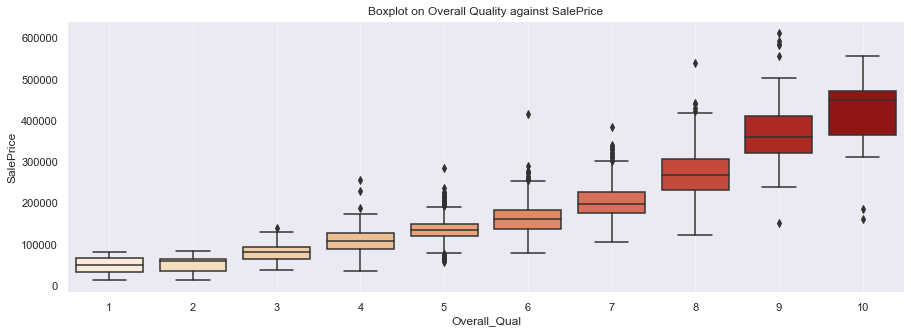

In [83]:
# check on the boxplots on different quality category
sns.set(rc = {'figure.figsize':(15,5)})
sns.boxplot(x='Overall_Qual',y='SalePrice',data=ames, palette="OrRd")
plt.grid(alpha=0.5)
plt.title('Boxplot on Overall Quality against SalePrice');

- Although the box plot shows some of the outliers, overall the **higher the overall quality of the house tend to have higher average sale price**

In [84]:
# groupby Overall_Cond and show mean min max and count of the category
ames.groupby(['Overall_Cond'])['SalePrice'].agg(['mean','min','max','count']).reset_index().sort_values('mean', ascending=False)

,Overall_Cond,mean,min,max,count
4,5,207055.988870,13100,611657,1168
8,9,198177.586207,88750,475000,29
7,8,155913.366337,84500,415000,101
6,7,155327.270370,50138,402000,270
5,6,148952.665761,37900,392000,368
3,4,114034.571429,40000,260000,70
2,3,99786.000000,35000,200624,35
1,2,65364.833333,12789,87000,6
0,1,59625.000000,50000,65000,4


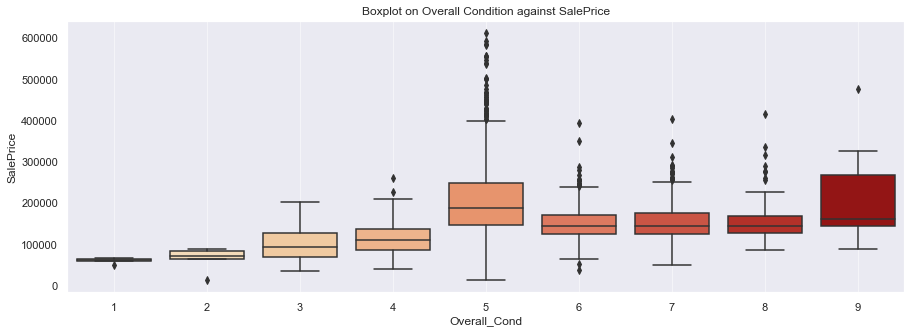

In [85]:
# check on the boxplots on different condtion category
sns.set(rc = {'figure.figsize':(15,5)})
sns.boxplot(x='Overall_Cond',y='SalePrice',data=ames, palette="OrRd")
plt.grid(alpha=0.5)
plt.title('Boxplot on Overall Condition against SalePrice');

- From the boxplot on `Overall_Cond`, it showed that the house have condition level of 5 and above tend to have better housing price than those below 5

### House Style

In [86]:
# set the order of the house_stye from mean sale price high to low
house_style_order = ames.groupby('House_Style')['SalePrice'].mean().sort_values(ascending=False).index

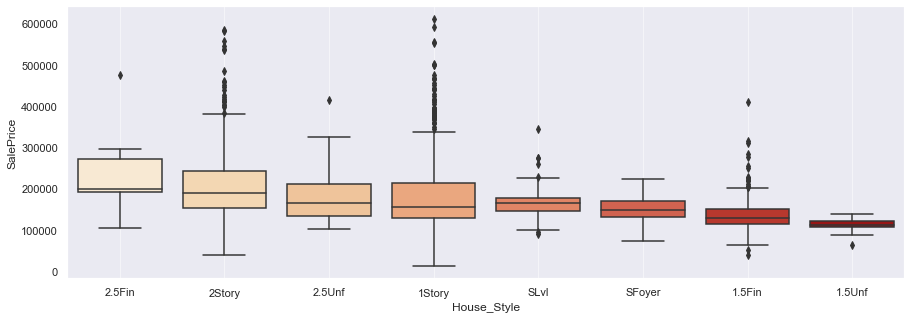

In [87]:
# check on the boxplots on different house style
sns.set(rc = {'figure.figsize':(15,5)})
sns.boxplot(x='House_Style',y='SalePrice',data=ames, palette="OrRd", order=house_style_order)
plt.grid(alpha=0.5);

In [88]:
# groupby house style and show mean min max and count of the category
ames.groupby(['House_Style'])['SalePrice'].agg(['mean','min','max','count']).reset_index().sort_values('max', ascending=False)

,House_Style,mean,min,max,count
2,1Story,179809.194523,12789,611657,1059
5,2Story,206408.963211,40000,584500,598
3,2.5Fin,243666.666667,104000,475000,6
4,2.5Unf,191785.714286,101000,415000,14
0,1.5Fin,136480.091743,37900,410000,218
7,SLvl,166248.989362,91000,345000,94
6,SFoyer,149343.920000,73000,224500,50
1,1.5Unf,112466.666667,64500,139400,12


From the boxplot, it shows that the mean sale price does not follow the more stories of the house style then will have higher sale price, we noticed that 1Story house type was the most popular with sale volume of 1059 which is 77.09% higher than the 2nd house type (2 story).

Although 1 story house type only have average 179809.19 in sale price, which is lower than 2.5 story with 2nd level finished 2 story and 2.5 story with 2nd level unfinished, the house type had the highest sale price among the house styles, and it showed the potential of high demand in 1Story house stye and house style may not be the major factor affecting the housing price

### Garage Completion Level and Quality

In [89]:
# groupby Garage_Finish and show mean min max and count of the category
ames.groupby(['Garage_Finish'])['SalePrice'].agg(['mean','min',
                                                  'max','count']).reset_index().sort_values('mean', ascending=False)

,Garage_Finish,mean,min,max,count
0,Fin,239800.664047,102900,611657,509
2,RFn,204792.036269,50138,584500,579
3,Unf,140718.148410,12789,475000,849
1,NA,106065.991228,34900,200500,114


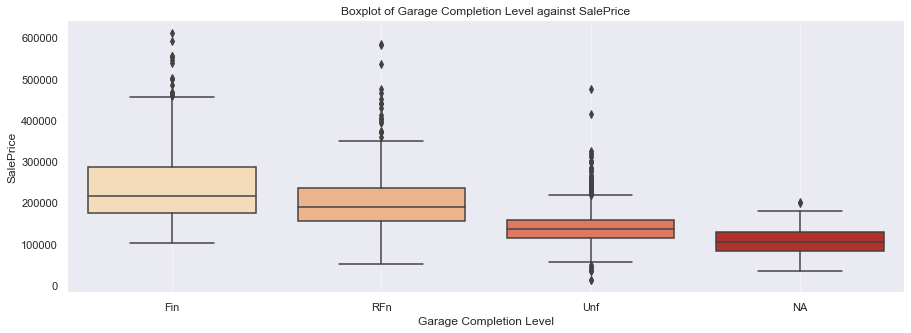

In [90]:
# check on the boxplots on different quality category
sns.set(rc = {'figure.figsize':(15,5)})
sns.boxplot(x='Garage_Finish',y='SalePrice',data=ames, palette="OrRd", order= ['Fin','RFn','Unf','NA'])
plt.grid(alpha=0.5)
plt.xlabel('Garage Completion Level')
plt.title('Boxplot of Garage Completion Level against SalePrice');

- From the `Garage_Finish` boxplot, it showed the Finished garage have higher housing price than non finish or those house without garage
- If we able to complete the garage,the housing price may be increased

In [91]:
# groupby Garage_Finish and show mean min max and count of the category
ames.groupby(['Garage_Qual'])['SalePrice'].agg(['mean','min',
                                                  'max','count']).reset_index().sort_values('mean', ascending=False)

,Garage_Qual,mean,min,max,count
2,Gd,262989.277778,90350,591587,18
0,Ex,241000.000000,120500,475000,3
5,TA,188312.700328,35311,611657,1832
1,Fa,116184.890244,12789,257076,82
3,NA,106065.991228,34900,200500,114
4,Po,65000.000000,63000,67000,2


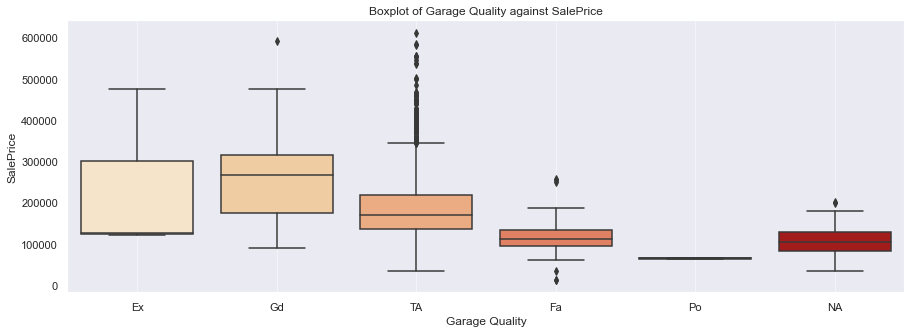

In [92]:
# check on the boxplots on different quality category
sns.set(rc = {'figure.figsize':(15,5)})
sns.boxplot(x='Garage_Qual',y='SalePrice',data=ames, palette="OrRd", order= ['Ex','Gd','TA','Fa','Po','NA'])
plt.grid(alpha=0.5)
plt.xlabel('Garage Quality')
plt.title('Boxplot of Garage Quality against SalePrice');

- From the `Garage_Qual` boxplot, it showed that the better the quality tend to have better housing price

In [93]:
# groupby Garage_Cars and show mean min max and count of the category
ames.groupby(['Garage_Cars'])['SalePrice'].agg(['mean','min',
                                                  'max','count']).reset_index().sort_values('mean', ascending=False)

,Garage_Cars,mean,min,max,count
3,3.0,309382.745247,87000,611657,263
4,4.0,229653.846154,123000,460000,13
2,2.0,184125.956866,12789,441929,1136
1,1.0,126824.591603,35000,330000,524
5,5.0,126500.000000,126500,126500,1
0,0.0,106065.991228,34900,200500,114


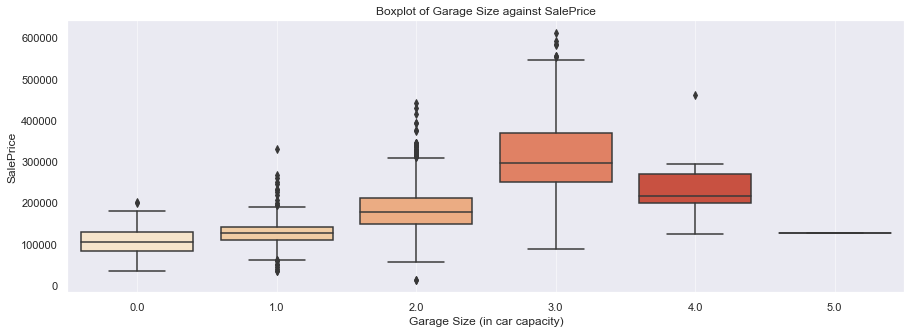

In [94]:
# check on the boxplots on different quality category
sns.set(rc = {'figure.figsize':(15,5)})
sns.boxplot(x='Garage_Cars',y='SalePrice',data=ames, palette="OrRd")
plt.grid(alpha=0.5)
plt.xlabel('Garage Size (in car capacity)')
plt.title('Boxplot of Garage Size against SalePrice');

- From the boxplot, it showed that the garage size able to fit in more cars tend to have higher average sale price, however when it is more than 3 cars, the average sale price start to decrease
- In term of sale volume, Garage size that able to fit 2 cars tend to be most popular, 2nd is the size able to fit 1 car.
- The most unpopular garage size will be the one able to fit in 5 cars, it may be caused by Residence in Ames owning 5 cars per family is not that common

### Rooms and Living Size Area

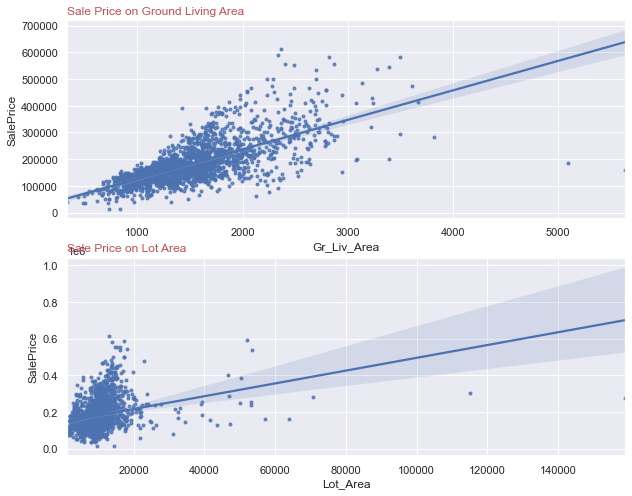

In [95]:
# Analyze the Gr_Liv_Area, Lot_Area on Sale Price            
plt.figure(figsize=(10,8))

ax = plt.subplot(2,1,1)
ax.set_title('Sale Price on Ground Living Area', loc='left', fontsize=12, color='r')
ax = sns.regplot(data=ames, x="Gr_Liv_Area", y="SalePrice", marker='.')

ax2 = plt.subplot(2,1,2)
ax2.set_title('Sale Price on Lot Area', loc='left', fontsize=12, color='r')
ax2 = sns.regplot(data=ames, x="Lot_Area", y="SalePrice", marker='.')

plt.show();

- From both regplot on the Ground living area and Lot Area, it showed that there was a positive correlation against SalePrice. The higher the the lot area or living area show better in hosing price
- We also noted there were few outliers from the regplot that we may need to remove later

In [96]:
# groupby TotRms_AbvGrd and show mean min max and count of the category
ames.groupby(['TotRms_AbvGrd'])['SalePrice'].agg(['mean','min',
                                                  'max','count']).reset_index().sort_values('count', ascending=False)

,TotRms_AbvGrd,mean,min,max,count
4,6,164301.169179,37900,374000,597
5,7,200752.334737,55000,500067,475
3,5,143577.611794,12789,392500,407
6,8,216750.539474,81000,591587,228
2,4,127488.753425,13100,270000,146
7,9,262559.214286,98000,501837,98
8,10,285100.081633,90000,555000,49
9,11,333535.863636,62500,611657,22
10,12,265129.692308,76500,582933,13
1,3,97275.000000,35000,155900,12


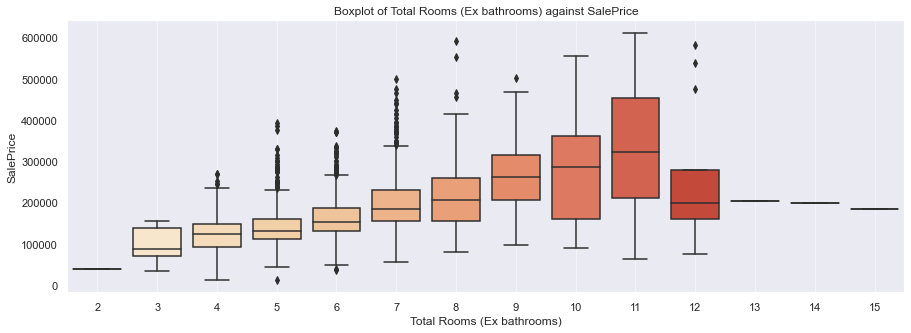

In [97]:
# check on the boxplots on different quality category
sns.set(rc = {'figure.figsize':(15,5)})
sns.boxplot(x='TotRms_AbvGrd',y='SalePrice',data=ames, palette="OrRd")
plt.grid(alpha=0.5)
plt.xlabel('Total Rooms (Ex bathrooms)')
plt.title('Boxplot of Total Rooms (Ex bathrooms) against SalePrice');

- Majority of the house sale come with 4-8 rooms, it means that 4-8 rooms house are more popular than those above 8 and below 4 rooms
- From the boxplot chart, it showed that the housing price tend to increase according to the number of the rooms, however it started to drop when the numbers of room more than 11

### Bathrooms

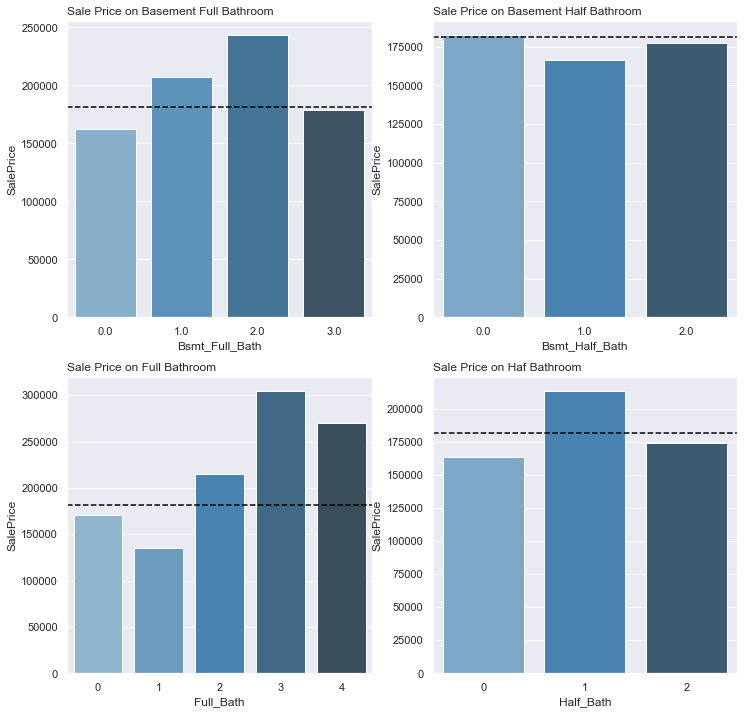

In [98]:
# plot the bar chart to shows Bsmt_Full_Bath, Bsmt_Half_Bath, Full_Bath and Half_Bath
plt.figure(figsize=(12,12))

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('Sale Price on Basement Full Bathroom', loc='left')
ax1 = sns.barplot(x='Bsmt_Full_Bath',y='SalePrice',data=ames, palette="Blues_d", ci=None )
ax1 = plt.axhline(y=ames['SalePrice'].mean(), ls='--',color='black');

ax2 = plt.subplot(2,2,2)
ax2.set_title('Sale Price on Basement Half Bathroom', loc='left')
ax2 = sns.barplot(x='Bsmt_Half_Bath',y='SalePrice',data=ames, palette="Blues_d", ci=None)
ax2 = plt.axhline(y=ames['SalePrice'].mean(), ls='--',color='black');


ax3 = plt.subplot(2,2,3)
ax3.set_title('Sale Price on Full Bathroom', loc='left')
ax3 = sns.barplot(x='Full_Bath',y='SalePrice',data=ames, palette="Blues_d", ci=None)
ax3 = plt.axhline(y=ames['SalePrice'].mean(), ls='--',color='black');

ax4 = plt.subplot(2,2,4)
ax4.set_title('Sale Price on Haf Bathroom', loc='left')
ax4 = sns.barplot(x='Half_Bath',y='SalePrice',data=ames, palette="Blues_d", ci=None)
ax4 = plt.axhline(y=ames['SalePrice'].mean(), ls='--',color='black');

plt.show();

- By analyzing different type of bathrooms on basement and above grade, the bar graph shows that the Full bathroom type tend to have better housing price while half bathroom type tend to have lower in housing price

### Year Remodified and Year Built

In [99]:
# filter out strong correlation coefficient 
check_corr(ames,'SalePrice')

SalePrice         1.00
Overall_Qual      0.80
Gr_Liv_Area       0.70
Garage_Area       0.65
Garage_Cars       0.65
Total_Bsmt_SF     0.63
1st_Flr_SF        0.62
Year_Built        0.57
Year_Remod/Add    0.55
Full_Bath         0.54
Mas_Vnr_Area      0.51
TotRms_AbvGrd     0.50
Name: SalePrice, dtype: float64

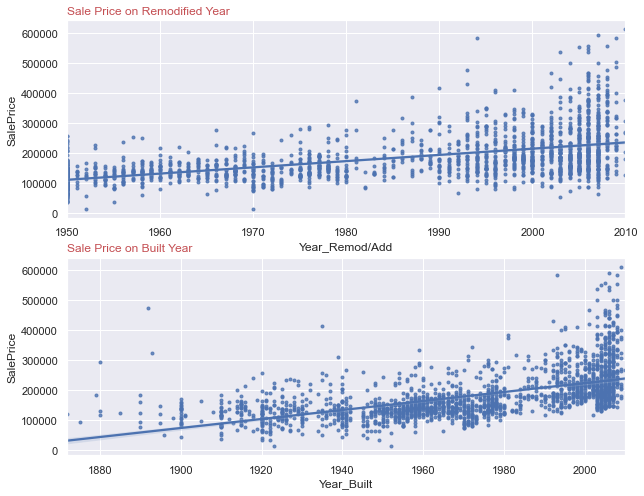

In [100]:
# Analyze the Year_Built, Year_Remod/Add on Sale Price            
plt.figure(figsize=(10,8))

ax5 = plt.subplot(2,1,1)
ax5.set_title('Sale Price on Remodified Year', loc='left', fontsize=12, color='r')
ax5 = sns.regplot(data=ames, x="Year_Remod/Add", y="SalePrice", marker='.')

ax6 = plt.subplot(2,1,2)
ax6.set_title('Sale Price on Built Year', loc='left', fontsize=12, color='r')
ax6 = sns.regplot(data=ames, x="Year_Built", y="SalePrice", marker='.')

plt.show();

- From both regplot above, it shows that the most recent built house or the house had just modefied recently tend to have higher average sale price as compared to those older house
- this allow us to further feature engineer to create `age` feature later on

### Neighborhood

In [101]:
# filter and sort the mean saleprice by neighborhood in ascending order
ames.groupby('Neighborhood')['SalePrice'].mean().sort_values()

Neighborhood
MeadowV    100231.250000
IDOTRR     101103.188406
BrDale     103371.052632
OldTown    125276.300613
BrkSide    127022.697368
Edwards    130493.468531
SWISU      134758.875000
Landmrk    137000.000000
Sawyer     137181.909910
NPkVill    140476.470588
Blueste    144566.666667
NAmes      145905.816129
Mitchel    167656.707317
SawyerW    187760.160920
Greens     188666.666667
Gilbert    189228.387931
NWAmes     194619.022989
Blmngtn    200417.681818
CollgCr    202497.216667
Crawfor    205901.211268
ClearCr    217490.074074
Somerst    227183.900000
Timber     241051.354167
Veenker    253570.588235
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
Name: SalePrice, dtype: float64

In [102]:
# assign the order
ames_order = ames.groupby('Neighborhood')['SalePrice'].mean().sort_values().index

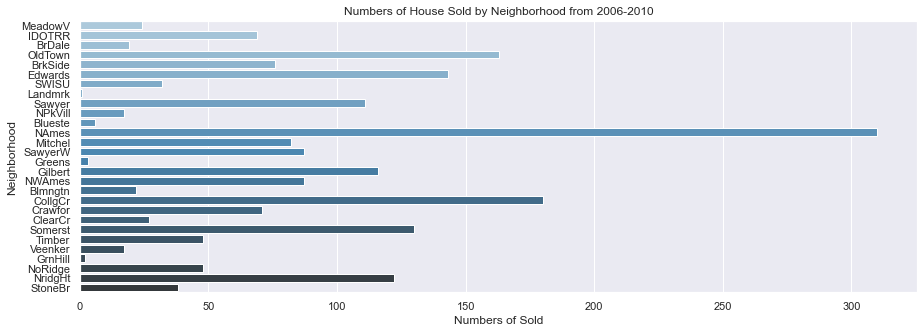

In [103]:
# plot the bar chart showing the number of unit sold by neighborhood in ascending mean price order
sns.countplot(y='Neighborhood', data=ames, orient='h',order =ames_order, palette='Blues_d')
plt.title('Numbers of House Sold by Neighborhood from 2006-2010')
plt.xlabel('Numbers of Sold');

- From the bar chart, it shows that NAmes have the highest numbers of sold but the highest average sale price is from StoneBr, hence the highest sale volume is not from those low in mean sale price nor high in mean sale price

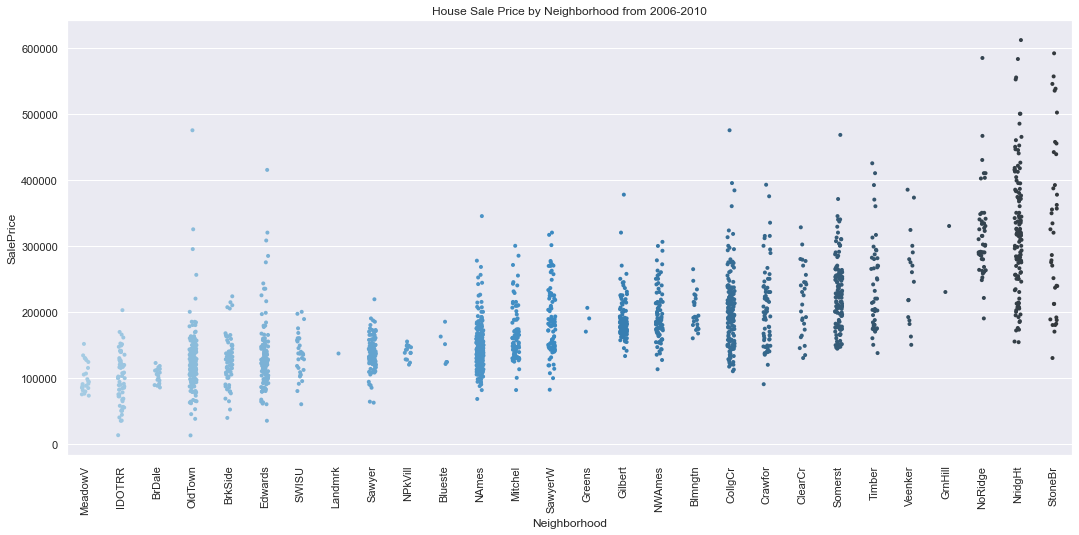

In [104]:
# strip plot for the house sale price by neighborhood in classify by ascending mean sale price order of neighborhood
plt.figure(figsize=(18,8))
sns.stripplot(x='Neighborhood', y='SalePrice', data=ames, order =ames_order,size=4, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('House Sale Price by Neighborhood from 2006-2010');

- From the stripplot, we noticed some of the neighborhood tend to have low sale volume, however the higher the mean sale price neighborhood tend to have lager variance sale price range
- With such imbalanced data distribution on each neighborhood, we cannot solely rely on the model to learn and generalize the saleprice according to the neighborhood. We will need to further bin these neighborhood into categories later.

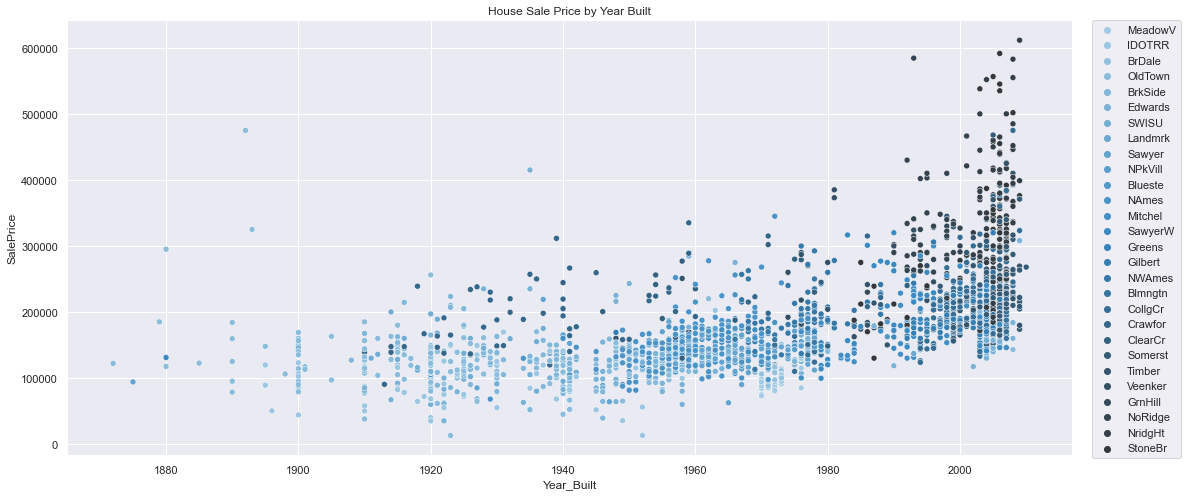

In [105]:
# scatter plot for the house sale price by year built in classify by ascending mean sale price order of the neighborhood
plt.figure(figsize=(18,8))
sns.scatterplot(x='Year_Built', y='SalePrice', data=ames, hue='Neighborhood' , palette='Blues_d', hue_order =ames_order)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('House Sale Price by Year Built');

- the scatterplot shows that the the darker the dot tend to be newly built and have higher mean sale price while the lighter the dot are those neighborhood tend to have older house age with relatively low in mean sale price.
- Hence those dark dot neighborhood tend to be newly built house and may tend to have better house condition and quality, it lead to further better sale price.

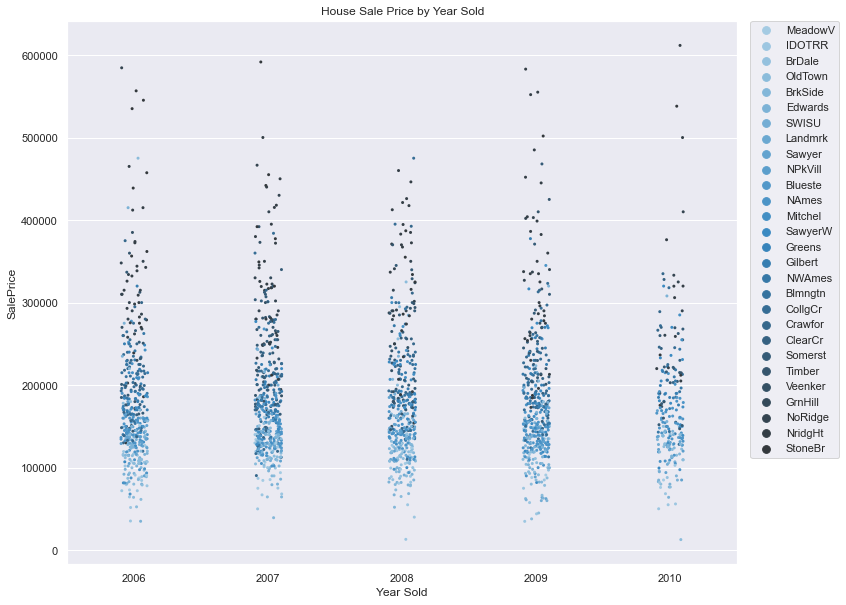

In [106]:
# strip plot for the house sale price by year sold in classify by ascending mean sale price order of the neighborhood
plt.figure(figsize=(12,10))
sns.stripplot(x='Yr_Sold', y='SalePrice', data=ames, hue='Neighborhood' , palette='Blues_d', hue_order =ames_order,size=3)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel('Year Sold')
plt.title('House Sale Price by Year Sold');

- From strip plot above, it showed that regardless of which year the house sold, those darker dot neighborhood tend to have higher housing price then lighter dot neighborhood.
- It may be explained by the neighborhood have correlation against the SalePrice, we will create the `location` and `zone` to segregate these neighborhood and check the correlationship later

## Outliers

We first create histograms for all numerical columns and check the distribution

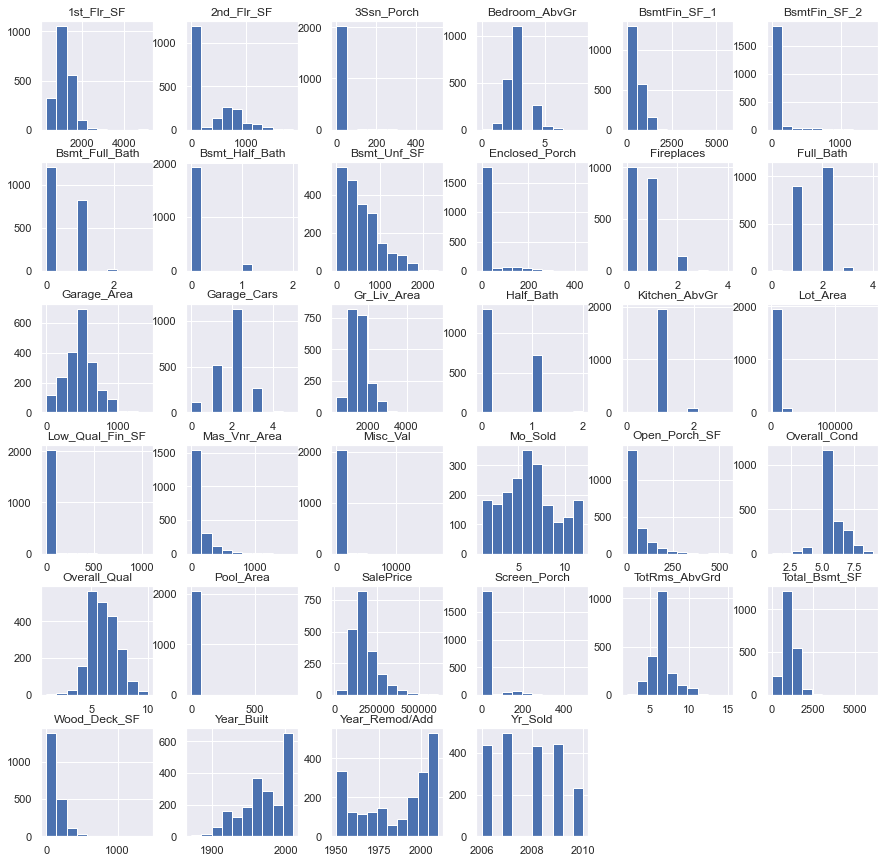

In [107]:
# create the histogram on non object data type features
ames[sorted(ames.select_dtypes(exclude='O').columns)].hist(figsize= (15,15));

- there are a lot of distribution at 0, that is caused by the variable have 0 values or the not applicable

In [108]:
# Describe the non object data type features
print(ames[ames.select_dtypes(exclude='O').columns].shape)
ames[sorted(ames.select_dtypes(exclude='O').columns)].describe([0.25,0.5,0.75, 0.95]).T

(2051, 34)


,count,mean,std,min,25%,50%,75%,95%,max
1st_Flr_SF,2051.0,1164.488055,396.446923,334.0,879.5,1093.0,1405.0,1801.5,5095.0
2nd_Flr_SF,2051.0,329.329108,425.671046,0.0,0.0,0.0,692.5,1133.5,1862.0
3Ssn_Porch,2051.0,2.591419,25.229615,0.0,0.0,0.0,0.0,0.0,508.0
Bedroom_AbvGr,2051.0,2.843491,0.826618,0.0,2.0,3.0,3.0,4.0,8.0
BsmtFin_SF_1,2051.0,442.084837,461.195041,0.0,0.0,368.0,733.5,1272.5,5644.0
BsmtFin_SF_2,2051.0,47.935641,164.964052,0.0,0.0,0.0,0.0,414.0,1474.0
Bsmt_Full_Bath,2051.0,0.427109,0.522589,0.0,0.0,0.0,1.0,1.0,3.0
Bsmt_Half_Bath,2051.0,0.063384,0.251590,0.0,0.0,0.0,0.0,1.0,2.0
Bsmt_Unf_SF,2051.0,567.451487,445.022846,0.0,220.0,474.0,811.0,1492.5,2336.0
Enclosed_Porch,2051.0,22.571916,59.845110,0.0,0.0,0.0,0.0,176.0,432.0


- From both histogram and describe of numeric columns summary, it showed some of the features having huge difference in max value and 95th percentile value, it may be caused by the outliers. Hence we deicded to use IQR rule to filter out out outliers.

**Define IQR Rule for Outliers**
- For Skewed distributions: Use Inter-Quartile Range (IQR) rule to filter out the outliers
- The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.
- in this datasets, we decided to set Q1 and Q3 as the 25th and 95th percentile of the respective columns in order to cover most of the data range, and IQR represents the inter-quartile range and given by Q3 – Q1

In [109]:
# check the numeric columns with outliers
list_outliers = []
for col in ames[ames.select_dtypes(exclude='O').columns]:
    uplim, lowlim = check_iqr(ames[col])
    if len(ames[(ames[col]< lowlim)|(ames[col]> uplim)]) >0:
        list_outliers.append(col)

In [110]:
# print out all the outliers columns
print(list_outliers)

['Lot_Area', 'Year_Built', 'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Total_Bsmt_SF', '1st_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Full_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Wood_Deck_SF', 'Open_Porch_SF', '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val']


In [111]:
# check the Pearson Correlation Coefficient against SalePrice
check_corr(ames,'SalePrice')

SalePrice         1.00
Overall_Qual      0.80
Gr_Liv_Area       0.70
Garage_Area       0.65
Garage_Cars       0.65
Total_Bsmt_SF     0.63
1st_Flr_SF        0.62
Year_Built        0.57
Year_Remod/Add    0.55
Full_Bath         0.54
Mas_Vnr_Area      0.51
TotRms_AbvGrd     0.50
Name: SalePrice, dtype: float64

We know that the model building is highly senstive to the outliers, it will affect the accuracy of the model especially features that have high correlated against our target response.

**Outlier 1 - Lot Area**

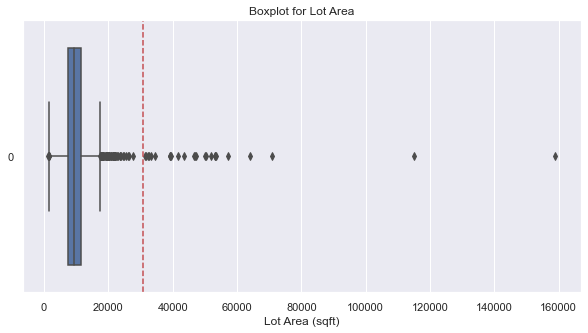

In [112]:
# plot box plot to check lot area outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=ames.Lot_Area, orient ='h')

plt.axvline(x=check_iqr(ames.Lot_Area)[0], ls='--',color='r')
plt.xlabel('Lot Area (sqft)')
plt.title('Boxplot for Lot Area')
plt.show();

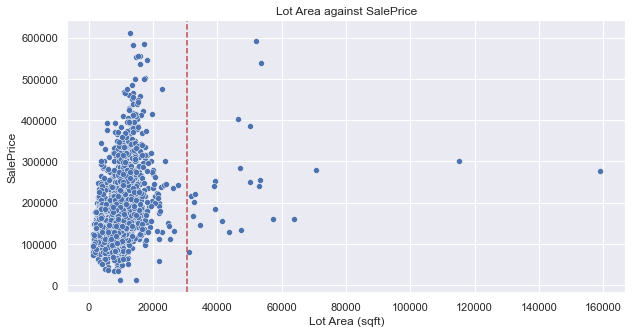

In [113]:
# use scatter plot to check the outliers against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="Lot_Area", y="SalePrice")
plt.axvline(x=check_iqr(ames.Lot_Area)[0], ls='--',color='r')
plt.xlabel('Lot Area (sqft)')
plt.title('Lot Area against SalePrice');

In this case, we cannot follow the IQR rule to remove all above the upper bound limint of IQR, hence we decided to remove outliers above 80,000

In [114]:
# check the rows with outliers and the percentage
print(round(ames[(ames['Lot_Area'] > 80_000)].shape[0]/ames.shape[0]*100,4),'%')

ames[(ames['Lot_Area'] > 80_000)]

0.0975 %


,Id,PID,MS_SubClass,MS_Zoning,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
471,2116,0906426060,50,RL,159000,Pave,NA,IR2,Low,AllPub,...,0,0,NA,NA,Shed,500,6,2007,WD,277000
694,2072,0905301050,20,RL,115149,Pave,NA,IR2,Low,AllPub,...,0,0,NA,NA,NA,0,6,2007,WD,302000


In [115]:
# add the rows index to be dropped to rows_to_drop due to outliers
add_rows_to_drop(ames[(ames['Lot_Area'] > 80_000)].index)

[471, 694]

- outlier 1 lot area shows 2 outliers under id 2116 and 2072 as per pre-define IQR rule
- from both boxplot and scatterplot against saleprice, the lot area clearly shows the extremely high in lot area (sqft) but the saleprice reflected is far lesser than expected 
- since the percentage of the outliers rows are less than 0.1% of overall datasets, we decided to drop these 2 outliers for better modeling later

**Outlier 2 - Year Built**

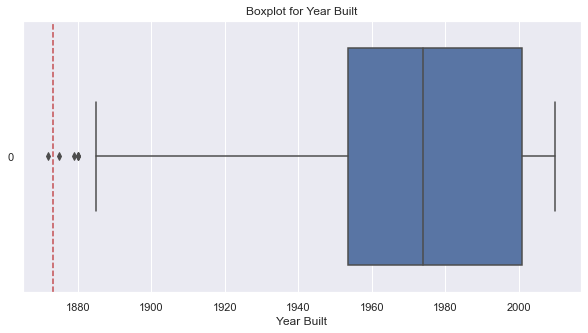

In [116]:
# plot box plot to check Year_Built outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=ames.Year_Built, orient ='h')

plt.axvline(x=check_iqr(ames.Year_Built)[1], ls='--',color='r')
plt.xlabel('Year Built')
plt.title('Boxplot for Year Built')
plt.show();

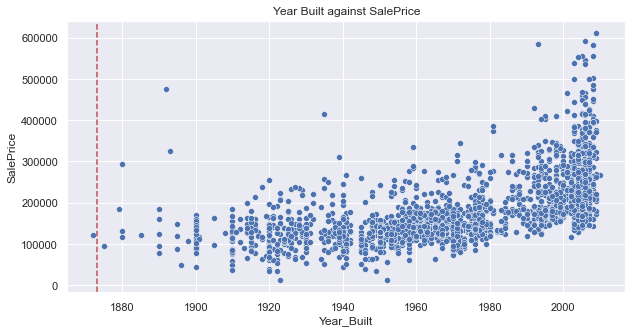

In [117]:
# use scatter plot to check the outliers against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="Year_Built", y="SalePrice")
plt.axvline(x=check_iqr(ames.Year_Built)[1], ls='--',color='r')
plt.title('Year Built against SalePrice');

In [118]:
# check the rows with outliers and the percentage
print(round(ames[(ames['Year_Built'] > check_iqr(ames['Year_Built'])[0]) | 
                 (ames['Year_Built'] < check_iqr(ames['Year_Built'])[1])].shape[0]/ames.shape[0]*100,4),'%')

ames[(ames['Year_Built'] > check_iqr(ames['Year_Built'])[0]) | 
     (ames['Year_Built'] < check_iqr(ames['Year_Built'])[1])]

0.0488 %


,Id,PID,MS_SubClass,MS_Zoning,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
951,1319,0902330010,70,RM,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,12,2008,WD,122000


In [119]:
# add the rows index to be dropped to rows_to_drop due to outliers
add_rows_to_drop(ames[(ames['Year_Built'] > check_iqr(ames['Year_Built'])[0]) | 
     (ames['Year_Built'] < check_iqr(ames['Year_Built'])[1])].index)

[471, 694, 951]

- There was 1 outlier as per IQR rule that fall below the lower limit, hence we decided to drop the outlier

**Outlier 3 - Basement Area**

As we already shows earlier that the forumula below is accurate, hence the basement area for type 1 total basement are correlated with each other, hence we will only filter out the `Total_Bsmt_SF` first and double check on `BsmtFin_SF_1`, `BsmtFin_SF_2` and `Bsmt_Unf_SF`
> **Total_Bsmt_SF = BsmtFin_SF_1 + BsmtFin_SF_2 + Bsmt_Unf_SF**

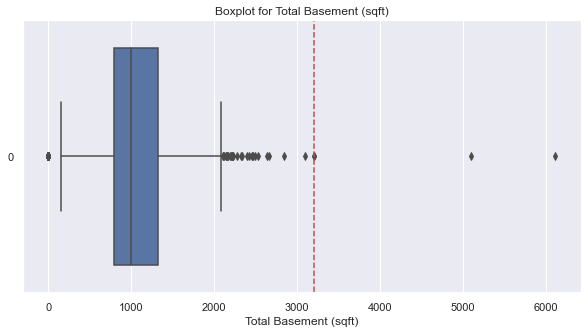

In [120]:
# plot box plot to check Total_Bsmt_SF outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=ames.Total_Bsmt_SF, orient ='h')

plt.axvline(x=check_iqr(ames.Total_Bsmt_SF)[0], ls='--',color='r')
plt.xlabel('Total Basement (sqft)')
plt.title('Boxplot for Total Basement (sqft)')
plt.show();

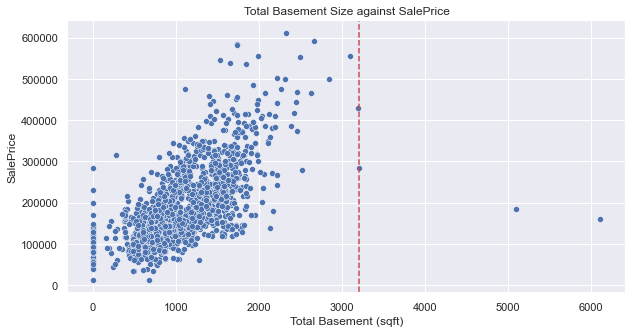

In [121]:
# use scatter plot to check the outliers against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="Total_Bsmt_SF", y="SalePrice")
plt.axvline(x=check_iqr(ames.Total_Bsmt_SF)[0], ls='--',color='r')
plt.xlabel('Total Basement (sqft)')
plt.title('Total Basement Size against SalePrice');

- From the plot, there are 2 obvious outliers above the IQR upper limit, hence we decided to filter out the outliers above 4000

In [122]:
# check the rows with outliers and the percentage
print(round(ames[(ames['Total_Bsmt_SF'] > 4000)].shape[0]/ames.shape[0]*100,4),'%')

ames[(ames['Total_Bsmt_SF'] > 4000)][['Id','PID','Total_Bsmt_SF','SalePrice']]

0.0975 %


,Id,PID,Total_Bsmt_SF,SalePrice
960,1499,0908154235,6110.0,160000
1885,2181,0908154195,5095.0,183850


In [123]:
# we further check on the other related outlier BsmtFin_SF_1, which shows the outlier ID also part of outlier Total_Bsmt_SF
print(round(ames[(ames['BsmtFin_SF_1'] > check_iqr(ames['BsmtFin_SF_1'])[0]) | 
                 (ames['BsmtFin_SF_1'] < check_iqr(ames['BsmtFin_SF_1'])[1])].shape[0]/ames.shape[0]*100,4),'%')

ames[(ames['BsmtFin_SF_1'] > check_iqr(ames['BsmtFin_SF_1'])[0]) | 
     (ames['BsmtFin_SF_1'] < check_iqr(ames['BsmtFin_SF_1'])[1])]

0.0975 %


,Id,PID,MS_SubClass,MS_Zoning,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
960,1499,0908154235,60,RL,63887,Pave,NA,IR3,Bnk,AllPub,...,0,480,Gd,NA,NA,0,1,2008,New,160000
1885,2181,0908154195,20,RL,39290,Pave,NA,IR1,Bnk,AllPub,...,0,0,NA,NA,Elev,17000,10,2007,New,183850


- both `Total_Bsmt_SF` and `BsmtFin_SF_1` have the same outliers index 960 and 1885 and the percentage of the outliers rows are less than 0.1% of overall datasets, we decided to drop these 2 outliers for better modeling later

In [124]:
# add the rows index to be dropped to rows_to_drop due to outliers
add_rows_to_drop(ames[(ames['BsmtFin_SF_1'] > check_iqr(ames['BsmtFin_SF_1'])[0]) | 
     (ames['BsmtFin_SF_1'] < check_iqr(ames['BsmtFin_SF_1'])[1])].index)

[471, 694, 951, 960, 1885]

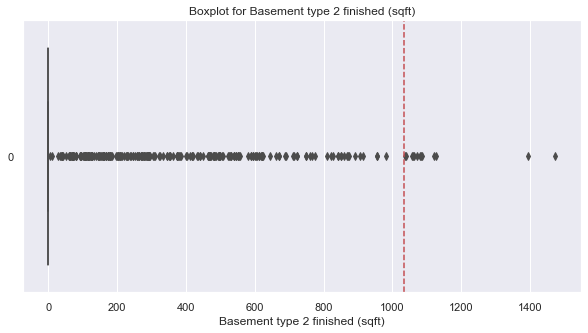

In [125]:
# plot box plot to check BsmtFin_SF_2 outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=ames.BsmtFin_SF_2, orient ='h')

plt.axvline(x=check_iqr(ames.BsmtFin_SF_2)[0], ls='--',color='r')
plt.xlabel('Basement type 2 finished (sqft)')
plt.title('Boxplot for Basement type 2 finished (sqft)')
plt.show();

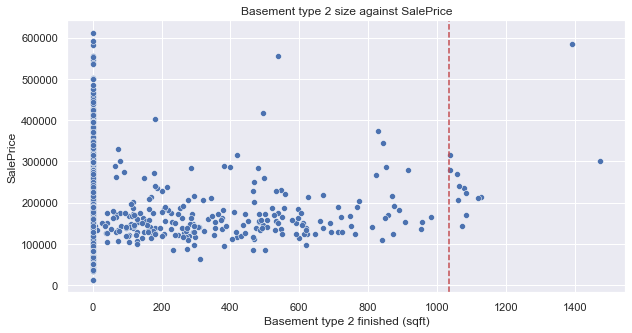

In [126]:
# use scatter plot to check the outliers against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="BsmtFin_SF_2", y="SalePrice")
plt.axvline(x=check_iqr(ames.BsmtFin_SF_2)[0], ls='--',color='r')
plt.xlabel('Basement type 2 finished (sqft)')
plt.title('Basement type 2 size against SalePrice');

- From the scatter plot, it showed there was numbers of outliers above IQR upper limit for Basement type 2 finished size, in this casae we will filtered out the 2 outliers above 1200 sqft

In [127]:
# we further check on the other related outlier BsmtFin_SF_2, which shows the outlier ID also part of outlier Total_Bsmt_SF
print(round(ames[(ames['BsmtFin_SF_2'] > 1200)].shape[0]/ames.shape[0]*100,4),'%')

ames[(ames['BsmtFin_SF_2'] > 1200)]

0.0975 %


,Id,PID,MS_SubClass,MS_Zoning,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
770,2093,0906201200,60,RL,10380,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,8,2007,WD,301000
1692,2451,0528360050,60,RL,17242,Pave,NA,IR1,Lvl,AllPub,...,210,0,NA,NA,NA,0,5,2006,WD,584500


In [128]:
# add the rows index to be dropped to rows_to_drop due to outliers
add_rows_to_drop(ames[(ames['BsmtFin_SF_2'] > 1200)].index)

[471, 694, 951, 960, 1885, 770, 1692]

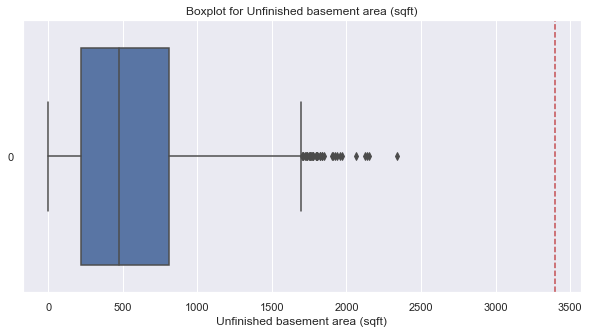

In [129]:
# plot box plot to check Bsmt_Unf_SF outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=ames.Bsmt_Unf_SF, orient ='h')

plt.axvline(x=check_iqr(ames.Bsmt_Unf_SF)[0], ls='--',color='r')
plt.xlabel('Unfinished basement area (sqft)')
plt.title('Boxplot for Unfinished basement area (sqft)')
plt.show();

- There was no outliers for feature `Bsmt_Unf_SF` as per the IQR rule and boxplot

**Outlier 4 - Masonry Veneer Area**

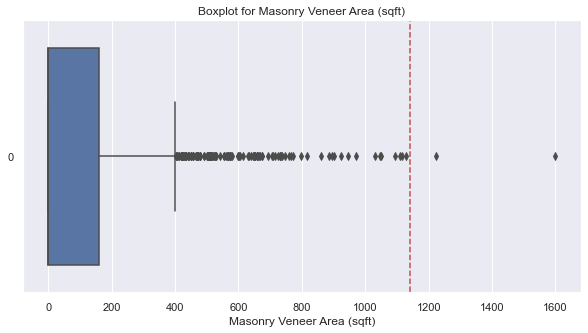

In [130]:
# plot box plot to check Mas_Vnr_Area outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=ames.Mas_Vnr_Area, orient ='h')

plt.axvline(x=check_iqr(ames.Mas_Vnr_Area)[0], ls='--',color='r')
plt.xlabel('Masonry Veneer Area (sqft)')
plt.title('Boxplot for Masonry Veneer Area (sqft)')
plt.show();

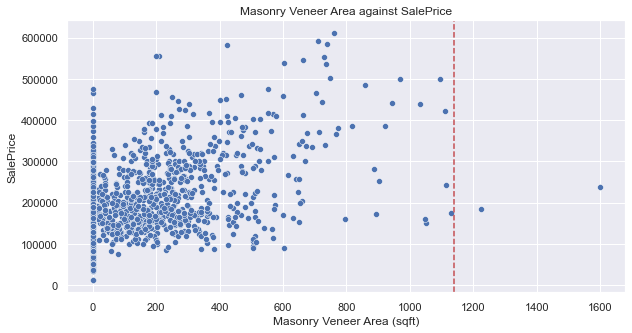

In [131]:
# use scatter plot to check the outliers against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="Mas_Vnr_Area", y="SalePrice")
plt.axvline(x=check_iqr(ames.Mas_Vnr_Area)[0], ls='--',color='r')
plt.xlabel('Masonry Veneer Area (sqft)')
plt.title('Masonry Veneer Area against SalePrice');

In [132]:
# check the rows with outliers and the percentage
print(round(ames[(ames['Mas_Vnr_Area'] > check_iqr(ames['Mas_Vnr_Area'])[0]) | 
                 (ames['Mas_Vnr_Area'] < check_iqr(ames['Mas_Vnr_Area'])[1])].shape[0]/ames.shape[0]*100,4),'%')

ames[(ames['Mas_Vnr_Area'] > check_iqr(ames['Mas_Vnr_Area'])[0]) | 
     (ames['Mas_Vnr_Area'] < check_iqr(ames['Mas_Vnr_Area'])[1])]

0.0975 %


,Id,PID,MS_SubClass,MS_Zoning,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
1409,1850,0533241030,60,FV,7399,Pave,Pave,IR1,Lvl,AllPub,...,198,0,NA,NA,NA,0,6,2007,WD,239000
1885,2181,0908154195,20,RL,39290,Pave,NA,IR1,Bnk,AllPub,...,0,0,NA,NA,Elev,17000,10,2007,New,183850


In [133]:
# add the rows index to be dropped to rows_to_drop due to outliers
add_rows_to_drop(ames[(ames['Mas_Vnr_Area'] > check_iqr(ames['Mas_Vnr_Area'])[0]) | 
                      (ames['Mas_Vnr_Area'] < check_iqr(ames['Mas_Vnr_Area'])[1])].index)

[471, 694, 951, 960, 1885, 770, 1692, 1409]

- For `Mas_Vnr_Area` there was 2 outliers with index 1409 and 1885 that fulfilled IQR rule, and both boxplot and scatterplot, the outliers were less than 0.1% of overall datasets, hence we decided to drop the outliers

**Outlier 5 - Ground Living Area**

As we already shows earlier that the forumula below is accurate, hence the living area for 1st floor area, low quality finished area (all floors) and living area (above grade) are correlated with each other, hence we will only filter out the `Gr_Liv_Area` first and double check on `1st_Flr_SF` , `2nd_Flr_SF` and `Low_Qual_Fin_SF`
> **Gr_Liv_Area = Low_Qual_Fin_SF + 1st_Flr_SF + 2nd_Flr_SF**

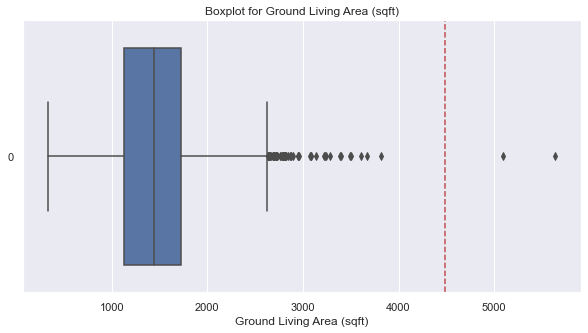

In [134]:
# plot box plot to check Gr_Liv_Area outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=ames.Gr_Liv_Area, orient ='h')

plt.axvline(x=check_iqr(ames.Gr_Liv_Area)[0], ls='--',color='r')
plt.xlabel('Ground Living Area (sqft)')
plt.title('Boxplot for Ground Living Area (sqft)')
plt.show();

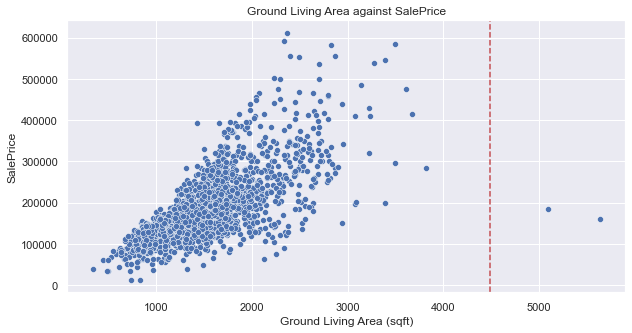

In [135]:
# use scatter plot to check the outliers against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="Gr_Liv_Area", y="SalePrice")
plt.axvline(x=check_iqr(ames.Gr_Liv_Area)[0], ls='--',color='r')
plt.xlabel('Ground Living Area (sqft)')
plt.title('Ground Living Area against SalePrice');

In [136]:
# check the rows with outliers and the percentage
print(round(ames[(ames['Gr_Liv_Area'] > check_iqr(ames['Gr_Liv_Area'])[0]) | 
                 (ames['Gr_Liv_Area'] < check_iqr(ames['Gr_Liv_Area'])[1])].shape[0]/ames.shape[0]*100,4),'%')

ames[(ames['Gr_Liv_Area'] > check_iqr(ames['Gr_Liv_Area'])[0]) | 
     (ames['Gr_Liv_Area'] < check_iqr(ames['Gr_Liv_Area'])[1])]

0.0975 %


,Id,PID,MS_SubClass,MS_Zoning,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
960,1499,0908154235,60,RL,63887,Pave,NA,IR3,Bnk,AllPub,...,0,480,Gd,NA,NA,0,1,2008,New,160000
1885,2181,0908154195,20,RL,39290,Pave,NA,IR1,Bnk,AllPub,...,0,0,NA,NA,Elev,17000,10,2007,New,183850


In [137]:
# add the rows index to be dropped to rows_to_drop due to outliers
add_rows_to_drop(ames[(ames['Gr_Liv_Area'] > check_iqr(ames['Gr_Liv_Area'])[0]) | 
                      (ames['Gr_Liv_Area'] < check_iqr(ames['Gr_Liv_Area'])[1])].index)

[471, 694, 951, 960, 1885, 770, 1692, 1409]

- outlier 3 `Gr_Liv_Area` showed 2 outliers under index 960 and 1885 as per pre-define IQR rule, outliers can also be clearly see from both boxplot and scatterplot
- since the percentage of the outliers rows are less than 0.1% of overall datasets and it also having the same outliers ID as outlier 2 `Total_Bsmt_SF`, we decided to drop both the outliers for better modeling later

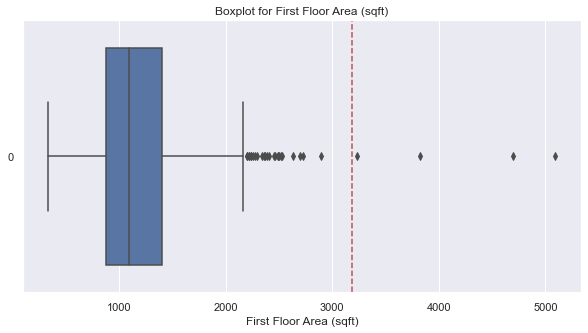

In [138]:
# plot box plot to check 1st_Flr_SF outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=ames['1st_Flr_SF'], orient ='h')

plt.axvline(x=check_iqr(ames['1st_Flr_SF'])[0], ls='--',color='r')
plt.xlabel('First Floor Area (sqft)')
plt.title('Boxplot for First Floor Area (sqft)')
plt.show();

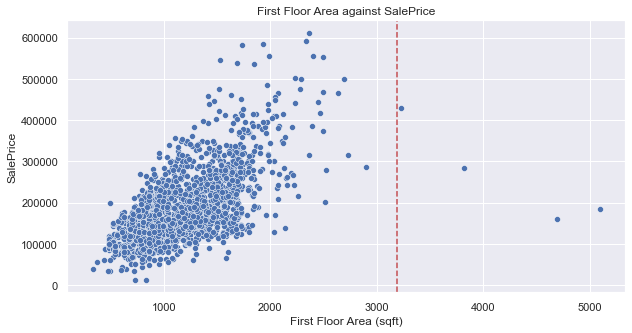

In [139]:
# use scatter plot to check the outliers against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="1st_Flr_SF", y="SalePrice")
plt.axvline(x=check_iqr(ames['1st_Flr_SF'])[0], ls='--',color='r')
plt.xlabel('First Floor Area (sqft)')
plt.title('First Floor Area against SalePrice');

- remove the outliers above 4000 and the results show is the same ID as `Gr_Liv_Area` outliers

In [140]:
# check the rows with outliers and the percentage
print(round(ames[(ames['1st_Flr_SF'] > 4000)].shape[0]/ames.shape[0]*100,4),'%')

ames[(ames['1st_Flr_SF'] > 4000)]

0.0975 %


,Id,PID,MS_SubClass,MS_Zoning,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
960,1499,0908154235,60,RL,63887,Pave,NA,IR3,Bnk,AllPub,...,0,480,Gd,NA,NA,0,1,2008,New,160000
1885,2181,0908154195,20,RL,39290,Pave,NA,IR1,Bnk,AllPub,...,0,0,NA,NA,Elev,17000,10,2007,New,183850


In [141]:
# add the rows index to be dropped to rows_to_drop due to outliers
add_rows_to_drop(ames[(ames['1st_Flr_SF'] > 4000)].index)

[471, 694, 951, 960, 1885, 770, 1692, 1409]

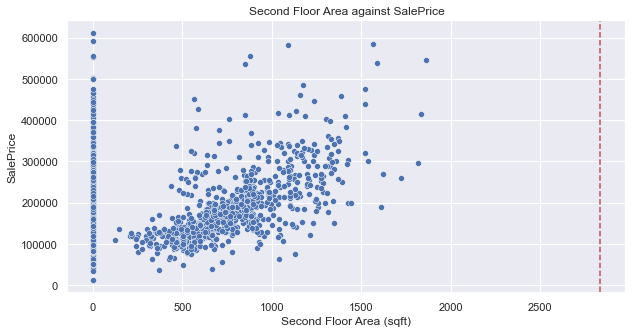

In [142]:
# use scatter plot to check the outliers against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="2nd_Flr_SF", y="SalePrice")
plt.axvline(x=check_iqr(ames['2nd_Flr_SF'])[0], ls='--',color='r')
plt.xlabel('Second Floor Area (sqft)')
plt.title('Second Floor Area against SalePrice');

- For feature `2nd_Flr_SF`, there was no outliers showed from the scatter plot and IQR Rule

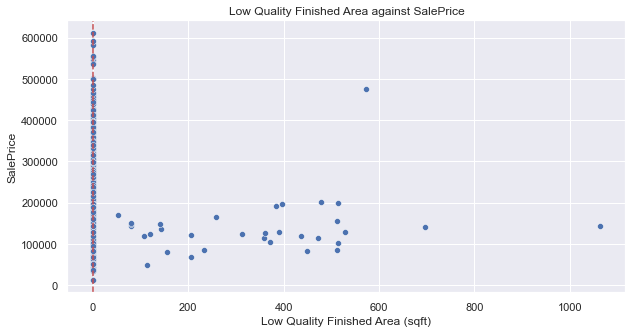

In [143]:
# use scatter plot to check the outliers against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="Low_Qual_Fin_SF", y="SalePrice")
plt.axvline(x=check_iqr(ames['Low_Qual_Fin_SF'])[0], ls='--',color='r')
plt.xlabel('Low Quality Finished Area (sqft)')
plt.title('Low Quality Finished Area against SalePrice');

In [144]:
# check Low_Qual_Fin_SF correlation against SalePrice
ames[['Low_Qual_Fin_SF','SalePrice']].corr()

,Low_Qual_Fin_SF,SalePrice
Low_Qual_Fin_SF,1.000000,-0.041594
SalePrice,-0.041594,1.000000


- `Low_Qual_Fin_SF` have numbers of outliers above IQR upper limit and showed from the scatter plot, however it do not have strong corelation against SalePrice, Pearson Correlation Coeffition showed -0.041594 against SalePrice, hence we do not remove the outliers

**Outlier 6 - Bathroom**

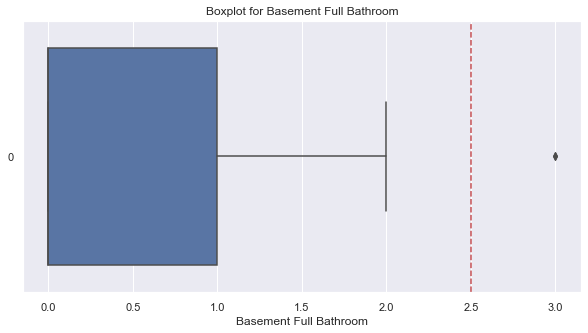

In [145]:
# plot box plot to check Bsmt_Full_Bath outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=ames['Bsmt_Full_Bath'], orient ='h')

plt.axvline(x=check_iqr(ames['Bsmt_Full_Bath'])[0], ls='--',color='r')
plt.xlabel('Basement Full Bathroom')
plt.title('Boxplot for Basement Full Bathroom')
plt.show();

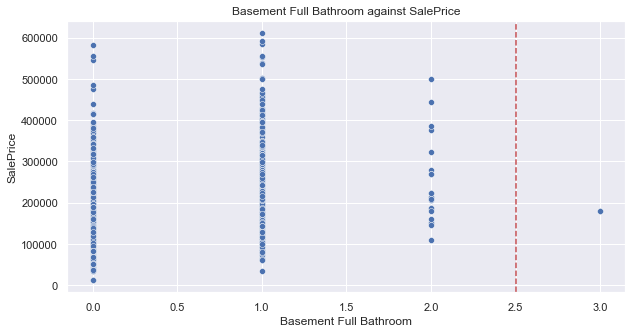

In [146]:
# use scatter plot to check the outliers against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="Bsmt_Full_Bath", y="SalePrice")
plt.axvline(x=check_iqr(ames['Bsmt_Full_Bath'])[0], ls='--',color='r')
plt.xlabel('Basement Full Bathroom')
plt.title('Basement Full Bathroom against SalePrice');

In [147]:
# check the rows with outliers and the percentage
print(round(ames[(ames['Bsmt_Full_Bath'] > check_iqr(ames['Bsmt_Full_Bath'])[0]) | 
                 (ames['Bsmt_Full_Bath'] < check_iqr(ames['Bsmt_Full_Bath'])[1])].shape[0]/ames.shape[0]*100,4),'%')

ames[(ames['Bsmt_Full_Bath'] > check_iqr(ames['Bsmt_Full_Bath'])[0]) | 
     (ames['Bsmt_Full_Bath'] < check_iqr(ames['Bsmt_Full_Bath'])[1])]

0.0975 %


,Id,PID,MS_SubClass,MS_Zoning,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
791,763,0904301060,90,RL,10800,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,3,2009,WD,179000
1584,764,0904301070,90,RL,10800,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,3,2009,WD,179000


- There was 2 outliers showed from the Scatterplot and boxplot, as per IQR Rule it have fall above the upper limit.
- Since the 2 outliers only less than 0.1% of the overall datasets, hence we decided to drop the outliers

In [148]:
# add the rows index to be dropped to rows_to_drop due to outliers
add_rows_to_drop(ames[(ames['Bsmt_Full_Bath'] > check_iqr(ames['Bsmt_Full_Bath'])[0]) | 
     (ames['Bsmt_Full_Bath'] < check_iqr(ames['Bsmt_Full_Bath'])[1])].index)

[471, 694, 951, 960, 1885, 770, 1692, 1409, 791, 1584]

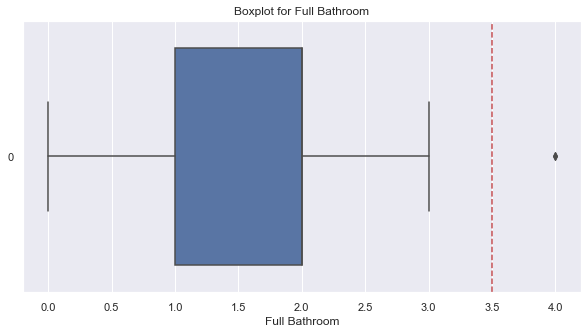

In [149]:
# plot box plot to check Full_Bath outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=ames['Full_Bath'], orient ='h')

plt.axvline(x=check_iqr(ames['Full_Bath'])[0], ls='--',color='r')
plt.xlabel('Full Bathroom')
plt.title('Boxplot for Full Bathroom')
plt.show();

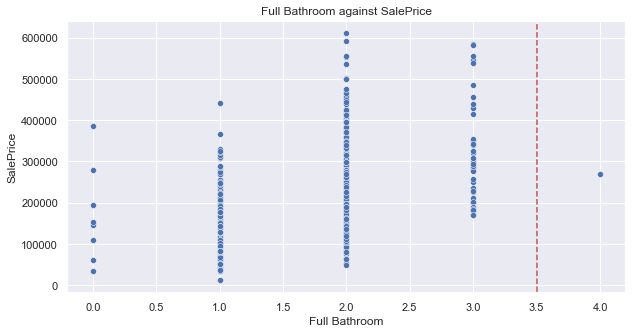

In [150]:
# use scatter plot to check the outliers against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="Full_Bath", y="SalePrice")
plt.axvline(x=check_iqr(ames['Full_Bath'])[0], ls='--',color='r')
plt.xlabel('Full Bathroom')
plt.title('Full Bathroom against SalePrice');

In [151]:
# check the rows with outliers and the percentage
print(round(ames[(ames['Full_Bath'] > check_iqr(ames['Full_Bath'])[0]) | 
                 (ames['Full_Bath'] < check_iqr(ames['Full_Bath'])[1])].shape[0]/ames.shape[0]*100,4),'%')

ames[(ames['Full_Bath'] > check_iqr(ames['Full_Bath'])[0]) | 
     (ames['Full_Bath'] < check_iqr(ames['Full_Bath'])[1])]

0.0975 %


,Id,PID,MS_SubClass,MS_Zoning,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
1566,816,0906230010,90,RL,11855,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,10,2009,WD,269500
1605,817,0906230020,90,RL,7939,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,10,2009,WD,269500


- There was 2 outliers showed from the Scatterplot and boxplot, as per IQR Rule it have fall above the upper limit.
- Since the 2 outliers only less than 0.1% of the overall datasets, hence we decided to drop the outliers

In [152]:
# add the rows index to be dropped to rows_to_drop due to outliers
add_rows_to_drop(ames[(ames['Full_Bath'] > check_iqr(ames['Full_Bath'])[0]) | 
                      (ames['Full_Bath'] < check_iqr(ames['Full_Bath'])[1])].index)

[471, 694, 951, 960, 1885, 770, 1692, 1409, 791, 1584, 1566, 1605]

**Outlier 7 -Bedroom**

In [153]:
# check the pearson correlation coefficient of Bedroom_AbvGr against Sale Price
ames[['Bedroom_AbvGr','SalePrice']].corr()

,Bedroom_AbvGr,SalePrice
Bedroom_AbvGr,1.000000,0.137067
SalePrice,0.137067,1.000000


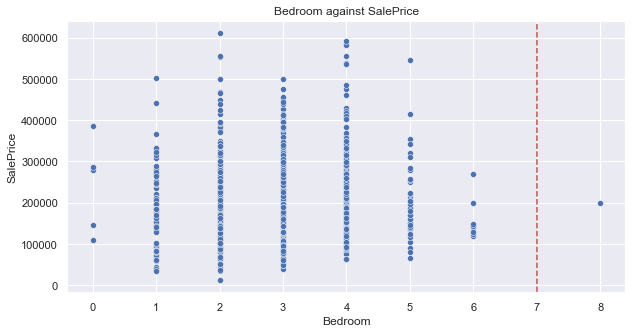

In [154]:
# use scatter plot to check the outliers against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="Bedroom_AbvGr", y="SalePrice")
plt.axvline(x=check_iqr(ames['Bedroom_AbvGr'])[0], ls='--',color='r')
plt.xlabel('Bedroom')
plt.title('Bedroom against SalePrice');

In [155]:
# check the rows with outliers and the percentage
print(round(ames[(ames['Bedroom_AbvGr'] > check_iqr(ames['Bedroom_AbvGr'])[0]) | 
                 (ames['Bedroom_AbvGr'] < check_iqr(ames['Bedroom_AbvGr'])[1])].shape[0]/ames.shape[0]*100,4),'%')

ames[(ames['Bedroom_AbvGr'] > check_iqr(ames['Bedroom_AbvGr'])[0]) | 
     (ames['Bedroom_AbvGr'] < check_iqr(ames['Bedroom_AbvGr'])[1])]

0.0488 %


,Id,PID,MS_SubClass,MS_Zoning,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
858,2195,0909176080,190,RH,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,0,NA,NA,NA,0,3,2007,WD,200000


- According to IQR Rule, `Bedroom_AbvGr` showed 1 outlier that fall above the upper limit, however the `Bedroom_AbvGr` only have weak Pearson Correlation Coefficient of 0.137067 against `SalePrice`, hence we decided not to drop the row

**Outlier 8 - Kitchen**

In [156]:
# check the pearson correlation coefficient of Kitchen_AbvGr against Sale Price
ames[['Kitchen_AbvGr','SalePrice']].corr()

,Kitchen_AbvGr,SalePrice
Kitchen_AbvGr,1.000000,-0.125444
SalePrice,-0.125444,1.000000


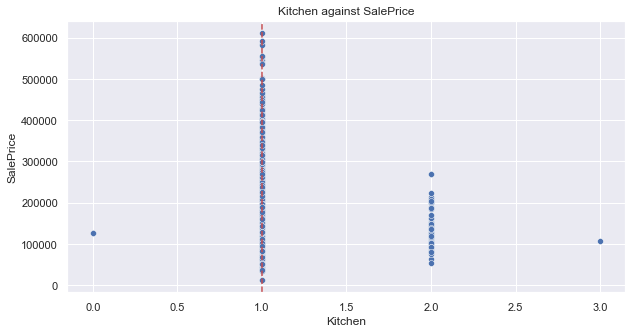

In [157]:
# use scatter plot to check the outliers against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="Kitchen_AbvGr", y="SalePrice")
plt.axvline(x=check_iqr(ames['Kitchen_AbvGr'])[0], ls='--',color='r')
plt.xlabel('Kitchen')
plt.title('Kitchen against SalePrice');

- According to IQR Rule, `Kitchen_AbvGr` showed numerbs of outliers that fall above the upper limit and below lower limit, however the `Kitchen_AbvGr` only have weak Pearson Correlation Coefficient of -0.125444 against `SalePrice`, hence we decided not to drop the rows

**Other outliers:** `Wood_Deck_SF`, `Open_Porch_SF`, `3Ssn_Porch`, `Screen_Porch`, `Pool_Area`, `Misc_Val`

In [158]:
# check the pearson correlation coefficient of Wood_Deck_SF against Sale Price
ames[['Wood_Deck_SF','Open_Porch_SF','3Ssn_Porch','Screen_Porch','Pool_Area','Misc_Val','SalePrice']].corr()

,Wood_Deck_SF,Open_Porch_SF,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,SalePrice
Wood_Deck_SF,1.000000,0.047630,-0.010851,-0.067770,0.128373,0.085091,0.326490
Open_Porch_SF,0.047630,1.000000,-0.007336,0.059027,0.073965,0.109919,0.333476
3Ssn_Porch,-0.010851,-0.007336,1.000000,-0.029574,-0.006522,-0.004887,0.048732
Screen_Porch,-0.067770,0.059027,-0.029574,1.000000,0.033114,0.007122,0.134581
Pool_Area,0.128373,0.073965,-0.006522,0.033114,1.000000,0.017661,0.023106
Misc_Val,0.085091,0.109919,-0.004887,0.007122,0.017661,1.000000,-0.007375
SalePrice,0.326490,0.333476,0.048732,0.134581,0.023106,-0.007375,1.000000


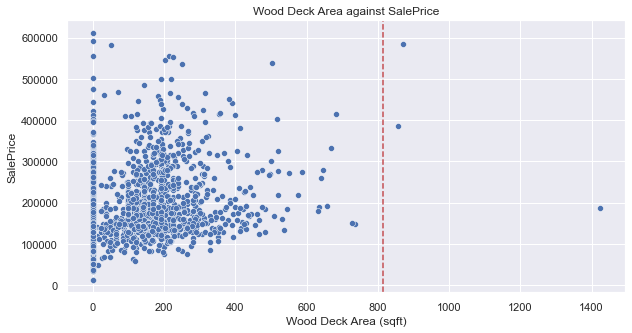

In [159]:
# use scatter plot to check the outliers of Wood_Deck_SF against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="Wood_Deck_SF", y="SalePrice")
plt.axvline(x=check_iqr(ames.Wood_Deck_SF)[0], ls='--',color='r')
plt.xlabel('Wood Deck Area (sqft)')
plt.title('Wood Deck Area against SalePrice');

- According to IQR Rule, `Wood_Deck_SF` showed 3 outliers that fall above the upper limit, however the `Wood_Deck_SF` only have weak Pearson Correlation Coefficient of 0.326490 against `SalePrice`, hence we decided not to drop the rows

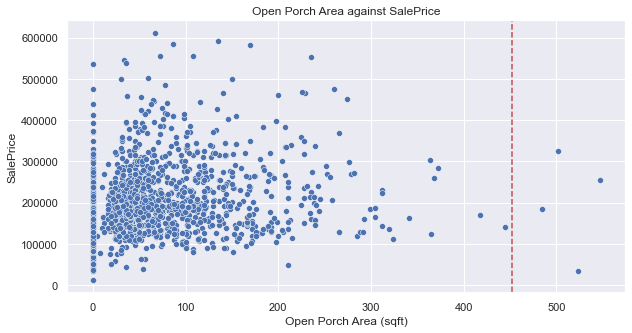

In [160]:
# use scatter plot to check the outliers of Open_Porch_SF against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="Open_Porch_SF", y="SalePrice")
plt.axvline(x=check_iqr(ames['Open_Porch_SF'])[0], ls='--',color='r')
plt.xlabel('Open Porch Area (sqft)')
plt.title('Open Porch Area against SalePrice');

- According to IQR Rule, `Open_Porch_SF` showed 4 outliers that fall above the upper limit, however the `Open_Porch_SF` only have weak Pearson Correlation Coefficient of 0.333476 against `SalePrice`, hence we decided not to drop the rows

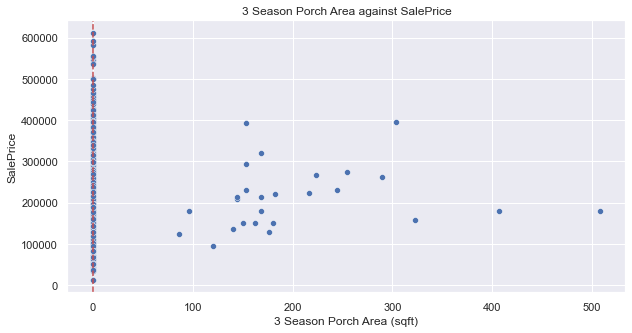

In [161]:
# use scatter plot to check the outliers of 3Ssn_Porch against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="3Ssn_Porch", y="SalePrice")
plt.axvline(x=check_iqr(ames['3Ssn_Porch'])[0], ls='--',color='r')
plt.xlabel('3 Season Porch Area (sqft)')
plt.title('3 Season Porch Area against SalePrice');

- `3Ssn_Porch` have a weak Pearson Correlation Coefficient of 0.048732 against `SalePrice` and base on IQR Rule, it will remove almost all the value above 0, then left with 0 in the columns, hence we decided to drop the columns

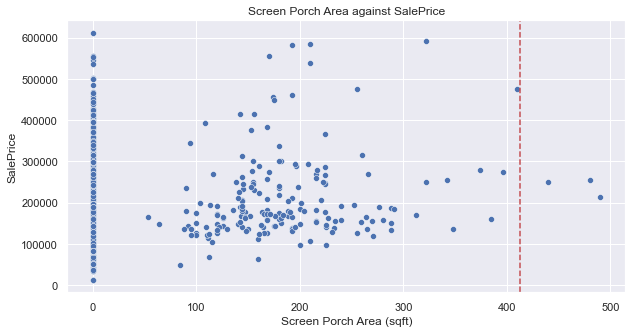

In [162]:
# use scatter plot to check the outliers against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="Screen_Porch", y="SalePrice")
plt.axvline(x=check_iqr(ames.Screen_Porch)[0], ls='--',color='r')
plt.xlabel('Screen Porch Area (sqft)')
plt.title('Screen Porch Area against SalePrice');

- According to IQR Rule, `Screen_Porch` showed 4 outliers that fall above the upper limit, however the `Screen_Porch` only have weak Pearson Correlation Coefficient of 0.134581 against `SalePrice`, hence we decided not to drop the rows

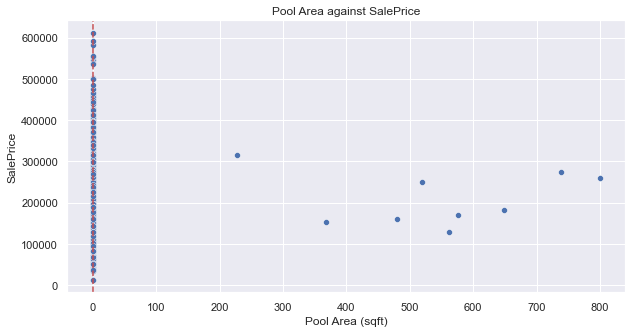

In [163]:
# use scatter plot to check the outliers against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="Pool_Area", y="SalePrice")
plt.axvline(x=check_iqr(ames.Pool_Area)[0], ls='--',color='r')
plt.xlabel('Pool Area (sqft)')
plt.title('Pool Area against SalePrice');

- `Pool_Area` have a weak Pearson Correlation Coefficient of 0.023106 against SalePrice and base on IQR Rule, it will remove almost all the value above 0, then left with 0 in the columns,hence we decided to drop the columns

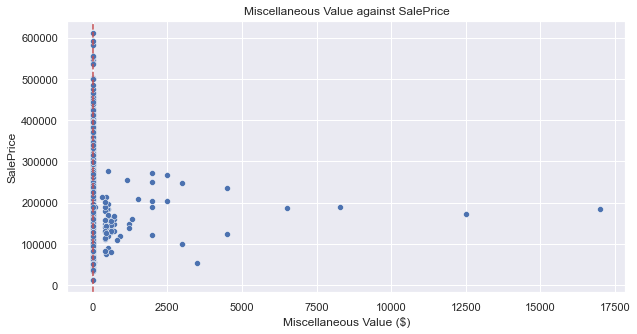

In [164]:
# use scatter plot to check the outliers against saleprice
plt.figure(figsize=(10,5))
sns.scatterplot(data=ames, x="Misc_Val", y="SalePrice")
plt.axvline(x=check_iqr(ames.Misc_Val)[0], ls='--',color='r')
plt.xlabel('Miscellaneous Value ($)')
plt.title('Miscellaneous Value against SalePrice');

- `Misc_Val` have a weak Pearson Correlation Coefficient of -0.007375 against SalePrice and base on IQR Rule, it will remove almost all the value above 0, then left with 0 in the columns,hence we decided to drop the columns

In [165]:
# total numbers of outliers rows to drop and the percentage
print(len(rows_to_drop))
print(len(rows_to_drop) / ames.shape[0] *100)

12
0.5850804485616773


- In summary, total number of 12 rows to be dropped due to outliers, it constitute only about 0.6% of overall datasets, hence there will not have huge impact on our model building accuracy, hence we proceed with drop the outliers

In [166]:
# drop the outliers that with index in rows_to_drop
print(f'Before drop outliers ames shape: {ames.shape}')

ames = ames[~ames.index.isin(rows_to_drop)]
                  
print(f'After drop outliers ames shape: {ames.shape}')

# drop the pool_area, 3Ssn_Porch, Open_Porch_SF and  Misc_Val column

ames.drop(columns=['Pool_Area','3Ssn_Porch','Open_Porch_SF','Misc_Val'], axis=1, inplace=True)
test.drop(columns=['Pool_Area','3Ssn_Porch','Open_Porch_SF','Misc_Val'], axis=1, inplace=True)
print(f'After drop Columns ames shape: {ames.shape}')


# pending for 3Ssn_Porch and Misc_Val

Before drop outliers ames shape: (2051, 80)
After drop outliers ames shape: (2039, 80)
After drop Columns ames shape: (2039, 76)


# Feature Engineering and Preprocessing

> *The features you use influence more than everything else the result. No algorithm alone, to my knowledge, can supplement the information gain given by correct feature engineering. — Luca Massaron*

### SalePrice

Log transformed our SalePrice

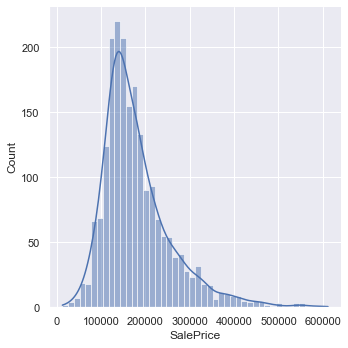

In [167]:
# check the distribution of the SalePrice
sns.displot(ames.SalePrice, kde=True);

In [168]:
# log transform SalePrice
ames['SalePrice'] = np.log(ames['SalePrice'])

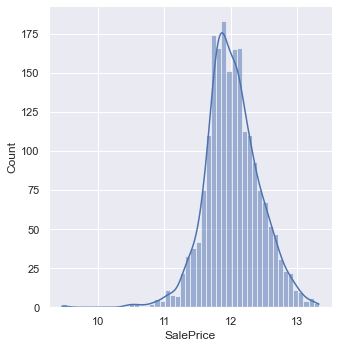

In [169]:
# check the distribution of the SalePrice
sns.displot(ames.SalePrice, kde=True);

- From the distribution plot, it showed that the initial SalePrice before log transformed was right skewed distribution, after we perform log transform on SalePrice, and the 2nd distribution plot shows closer to normally distribution.

In [170]:
# check pearson correlation coefficient of features above 0.5
check_corr(ames,'SalePrice')

SalePrice         1.00
Overall_Qual      0.83
Gr_Liv_Area       0.71
Garage_Cars       0.67
Garage_Area       0.66
Total_Bsmt_SF     0.65
Year_Built        0.63
1st_Flr_SF        0.62
Year_Remod/Add    0.60
Full_Bath         0.57
TotRms_AbvGrd     0.50
Name: SalePrice, dtype: float64

As the ordinal variables is a categorical variable (string / object) but these variables exist on an ordinal scale in nature. Hence we need to map all the ordinal variable features into numeric numbers for our modeling

In [171]:
# assign the quality scale for mapping
quality_scale = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
exposure_scale = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
bsmtfin_scale = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
privacy_scale = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
paved_scale = {'Y':2, 'P':1, 'N':0}
garage_scale = {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0}
func_scale = {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0}
pool_scale = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA':0}

In [172]:
# Binarize Nominal Categorical Variable Column
ames['Central_Air'] = ames['Central_Air'].map({'Y': 1, 'N': 0})

In [173]:
# convert the ordinal variable to numeric
ames['BsmtFin_Type_1'] = ames['BsmtFin_Type_1'].map(bsmtfin_scale)
ames['BsmtFin_Type_2'] = ames['BsmtFin_Type_2'].map(bsmtfin_scale)
ames['Bsmt_Cond'] = ames['Bsmt_Cond'].map(quality_scale)
ames['Bsmt_Qual'] = ames['Bsmt_Qual'].map(quality_scale)
ames['Bsmt_Exposure'] = ames['Bsmt_Exposure'].map(exposure_scale)
ames['Garage_Cond'] = ames['Garage_Cond'].map(quality_scale)
ames['Garage_Qual'] = ames['Garage_Qual'].map(quality_scale)
ames['Garage_Finish'] = ames['Garage_Finish'].map(garage_scale)
ames['Exter_Qual'] = ames['Exter_Qual'].map(quality_scale)
ames['Exter_Cond'] = ames['Exter_Cond'].map(quality_scale)
ames['Functional'] = ames['Functional'].map(func_scale)
ames['Kitchen_Qual'] = ames['Kitchen_Qual'].map(quality_scale)
ames['Fireplace_Qu'] = ames['Fireplace_Qu'].map(quality_scale)
ames['Heating_QC'] = ames['Heating_QC'].map(quality_scale)

ames['Pool_QC'] = ames['Pool_QC'].map(pool_scale)
ames['Fence'] = ames['Fence'].map(privacy_scale)

ames['Paved_Drive'] = ames['Paved_Drive'].map(paved_scale)

In [174]:
# Binarize Nominal Categorical Variable Column for test dataset
test['Central_Air'] = test['Central_Air'].map({'Y': 1, 'N': 0})

In [175]:
# convert the ordinal variable to numeric for test dataset
test['BsmtFin_Type_1'] = test['BsmtFin_Type_1'].map(bsmtfin_scale)
test['BsmtFin_Type_2'] = test['BsmtFin_Type_2'].map(bsmtfin_scale)
test['Bsmt_Cond'] = test['Bsmt_Cond'].map(quality_scale)
test['Bsmt_Qual'] = test['Bsmt_Qual'].map(quality_scale)
test['Bsmt_Exposure'] = test['Bsmt_Exposure'].map(exposure_scale)
test['Garage_Cond'] = test['Garage_Cond'].map(quality_scale)
test['Garage_Qual'] = test['Garage_Qual'].map(quality_scale)
test['Garage_Finish'] = test['Garage_Finish'].map(garage_scale)
test['Exter_Qual'] = test['Exter_Qual'].map(quality_scale)
test['Exter_Cond'] = test['Exter_Cond'].map(quality_scale)
test['Functional'] = test['Functional'].map(func_scale)
test['Kitchen_Qual'] = test['Kitchen_Qual'].map(quality_scale)
test['Fireplace_Qu'] = test['Fireplace_Qu'].map(quality_scale)
test['Heating_QC'] = test['Heating_QC'].map(quality_scale)

test['Pool_QC'] = test['Pool_QC'].map(pool_scale)
test['Fence'] = test['Fence'].map(privacy_scale)

test['Paved_Drive'] = test['Paved_Drive'].map(paved_scale)

In [176]:
#check the Pearson Correlation Coefficient against SalePrice and shows strong correlation
check_corr(ames,'SalePrice')

SalePrice         1.00
Overall_Qual      0.83
Gr_Liv_Area       0.71
Exter_Qual        0.69
Kitchen_Qual      0.68
Garage_Cars       0.67
Garage_Area       0.66
Total_Bsmt_SF     0.65
Bsmt_Qual         0.64
Year_Built        0.63
1st_Flr_SF        0.62
Garage_Finish     0.60
Year_Remod/Add    0.60
Full_Bath         0.57
Fireplace_Qu      0.54
Heating_QC        0.50
TotRms_AbvGrd     0.50
Name: SalePrice, dtype: float64

### Location and Zone

We always said location is one of the most important factor to determine the housing price. Especially when comes to a good neighborhood in Ames. The datasets consist of total 28 neighborhoods which we do not have additional informaiton like median household income of each neighborhood nor the information of amenities (eg. school, railway / subway, hospital and etc.). Hence we have to categorize the neighborhood and engineer a feature to determine the **location desirability level**. We understand that the overall quality and Exterior quality of the house tend to have strong positive correlation against SalePrice, hence, we take the feature engineer a `quality_score` from `Overall_Qual`, `Functional`, `Exter_Qual`.

After we obtain the `quality_score`, filter out the average quality_score of each neighborhood and rank it accordingly. Categorize into 4 categories: **1** as low quality, **2** as mid_low quality, **3** as mid_high quality and **4** as high quality.

In [177]:
# check current house condition related variables corr
ames[['Overall_Qual','Overall_Cond','Functional','Exter_Cond','Exter_Qual','SalePrice']].corr()

,Overall_Qual,Overall_Cond,Functional,Exter_Cond,Exter_Qual,SalePrice
Overall_Qual,1.000000,-0.080701,0.181652,0.018395,0.740242,0.827078
Overall_Cond,-0.080701,1.000000,0.129910,0.416218,-0.157026,-0.035880
Functional,0.181652,0.129910,1.000000,0.102572,0.112647,0.177376
Exter_Cond,0.018395,0.416218,0.102572,1.000000,0.035966,0.085774
Exter_Qual,0.740242,-0.157026,0.112647,0.035966,1.000000,0.694950
SalePrice,0.827078,-0.035880,0.177376,0.085774,0.694950,1.000000


In [178]:
# create the overall score
ames['quality_score'] = (ames.Overall_Qual / ames.Overall_Qual.mean() * 
                         ames.Functional / ames.Functional.mean()  * 
                         ames.Exter_Qual / ames.Exter_Qual.mean() )
# create same columen for test dataset
test['quality_score'] = (test.Overall_Qual / test.Overall_Qual.mean() * 
                         test.Functional / test.Functional.mean()  * 
                         test.Exter_Qual / test.Exter_Qual.mean() )

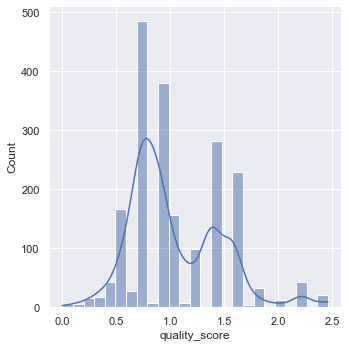

In [179]:
# check the distribution of the overall_score
sns.displot(ames.quality_score, kde=True);

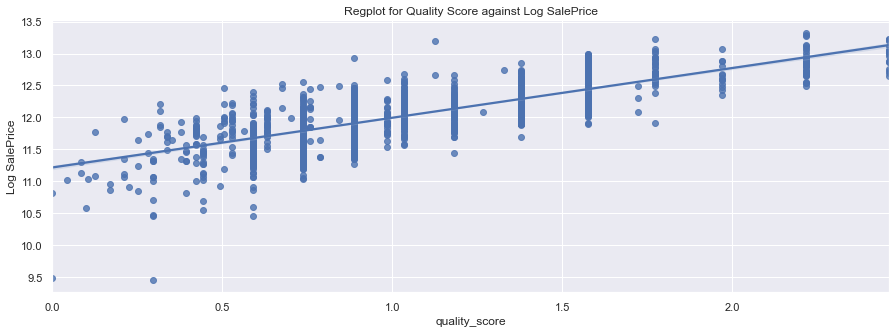

In [180]:
# plot reg plot to shows linear relationships against target
sns.regplot(data=ames, x='quality_score', y='SalePrice')
plt.ylabel('Log SalePrice')
plt.title('Regplot for Quality Score against Log SalePrice');

- From the regplot, `quality_score` feature showed a positive linear relationship against Log SalePrice, the better the `quality_score` the higher the `SalePrice`
- Pearson Correlation Coefficient shows 0.80 aginast SalePrice which is a strong postive correlation

In [181]:
# filter out the mean overall score of each neighborhood and assign to new dataframe
loc_rank_df = pd.DataFrame(ames.groupby(['Neighborhood'])['quality_score'].mean().sort_values()).reset_index()
loc_rank_df

,Neighborhood,quality_score
0,IDOTRR,0.628983
1,MeadowV,0.637250
2,Edwards,0.725836
3,Sawyer,0.740359
4,BrkSide,0.757761
5,OldTown,0.764332
6,NAmes,0.790298
7,SWISU,0.802496
8,BrDale,0.857131
9,Mitchel,0.866018


In [182]:
# create new column and rank it accordingly
loc_rank_df['loc_rank'] = loc_rank_df['quality_score'].rank(method='max')

In [183]:
# create another column to apply function check_rank to assign the location desirability level
loc_rank_df['loc_level'] = loc_rank_df['loc_rank'].apply(check_rank)

In [184]:
# groupby level and check the mean overall_score
loc_rank_df.groupby(['loc_level'])['quality_score'].mean().sort_values()

loc_level
1    0.720689
2    0.896021
3    1.194083
4    1.560782
Name: quality_score, dtype: float64

In [185]:
# retrieve the neighborhood and loc_level into dictionary for mapping later
loc_rank_dict = loc_rank_df[['Neighborhood','loc_level']].set_index('Neighborhood').T.to_dict('records')
loc_rank_dict[0]

{'IDOTRR': 1,
 'MeadowV': 1,
 'Edwards': 1,
 'Sawyer': 1,
 'BrkSide': 1,
 'OldTown': 1,
 'NAmes': 1,
 'SWISU': 2,
 'BrDale': 2,
 'Mitchel': 2,
 'Landmrk': 2,
 'ClearCr': 2,
 'NPkVill': 2,
 'NWAmes': 2,
 'Crawfor': 3,
 'Blueste': 3,
 'Gilbert': 3,
 'SawyerW': 3,
 'CollgCr': 3,
 'Veenker': 3,
 'Timber': 3,
 'GrnHill': 4,
 'Blmngtn': 4,
 'Somerst': 4,
 'NoRidge': 4,
 'Greens': 4,
 'StoneBr': 4,
 'NridgHt': 4}

In [186]:
# map the new location row
ames['location'] = ames['Neighborhood'].map(loc_rank_dict[0])

# map the new location into test dataset
test['location'] = test['Neighborhood'].map(loc_rank_dict[0])

In [187]:
# filter the location category and check the mean sale price, and the mean sale price do correponse to the location category
ames.groupby(['location'])['SalePrice'].agg({'count','mean'}).sort_values('mean')

,count,mean
location,,
1,891,11.745010
2,263,12.004985
3,522,12.180451
4,363,12.488387


In [188]:
# check distribution of location
ames.location.value_counts(normalize=True)

1    0.436979
3    0.256008
4    0.178028
2    0.128985
Name: location, dtype: float64

In [189]:
# check the pearson correlation coefficient above 0.5
check_corr(ames, 'SalePrice')

SalePrice         1.00
Overall_Qual      0.83
quality_score     0.80
Gr_Liv_Area       0.71
Exter_Qual        0.69
Kitchen_Qual      0.68
location          0.68
Garage_Cars       0.67
Garage_Area       0.66
Total_Bsmt_SF     0.65
Bsmt_Qual         0.64
Year_Built        0.63
1st_Flr_SF        0.62
Garage_Finish     0.60
Year_Remod/Add    0.60
Full_Bath         0.57
Fireplace_Qu      0.54
Heating_QC        0.50
TotRms_AbvGrd     0.50
Name: SalePrice, dtype: float64

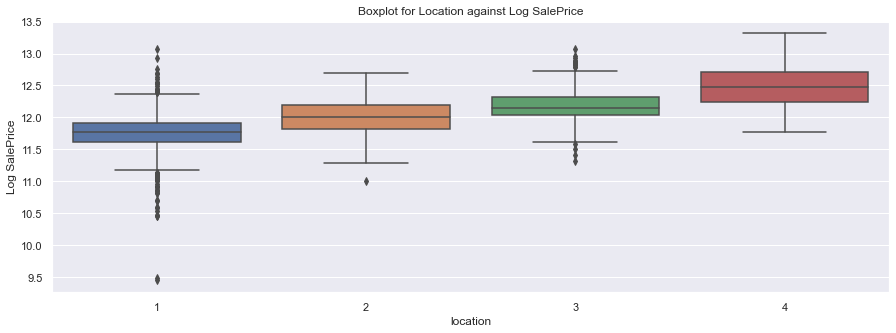

In [190]:
# plot box plot to shows linear relationships against target
sns.boxplot(data=ames, x='location', y='SalePrice')
plt.ylabel('Log SalePrice')
plt.title('Boxplot for Location against Log SalePrice');

- From the boxplot, `location` feature showed a positive linear relationship against Log SalePrice, the better the `location` the higher the `SalePrice`
- Pearson Correlation Coefficient shows 0.68 aginast SalePrice which is a strong postive correlation

In [191]:
# group mean saleprice of each neighborhood
ames_df =pd.DataFrame(ames.groupby('Neighborhood')['SalePrice'].mean().sort_values()).reset_index()

In [192]:
# cut the mean saleprice into 4 different categories
ames_df['zone'] = pd.cut(ames_df['SalePrice'], 4, labels=[1,2,3,4])

In [193]:
# map the neighbohood into a new feature as zone
ames_df = ames_df[['Neighborhood','zone']]
ames['zone'] = ames['Neighborhood'].map(ames_df.set_index('Neighborhood').to_dict()['zone'])
test['zone'] = test['Neighborhood'].map(ames_df.set_index('Neighborhood').to_dict()['zone'])

In [194]:
# check the average sale price on each zone category
ames.groupby('zone')['SalePrice'].mean()

zone
1    11.642765
2    11.871753
3    12.188141
4    12.573271
Name: SalePrice, dtype: float64

In [195]:
# check the percentage of distribution in each zone
ames.zone.value_counts(normalize=True)

3    0.351643
2    0.274154
1    0.239823
4    0.134380
Name: zone, dtype: float64

In [196]:
# check the Pearson correlation coefficient of zone against SalePrice
ames[['zone','SalePrice']].corr()

,zone,SalePrice
zone,1.0000,0.7303
SalePrice,0.7303,1.0000


In [197]:
# check the Pearson correlation coefficient against SalePrice
check_corr(ames,'SalePrice')

SalePrice         1.00
Overall_Qual      0.83
quality_score     0.80
zone              0.73
Gr_Liv_Area       0.71
Exter_Qual        0.69
Kitchen_Qual      0.68
location          0.68
Garage_Cars       0.67
Garage_Area       0.66
Total_Bsmt_SF     0.65
Bsmt_Qual         0.64
Year_Built        0.63
1st_Flr_SF        0.62
Garage_Finish     0.60
Year_Remod/Add    0.60
Full_Bath         0.57
Fireplace_Qu      0.54
Heating_QC        0.50
TotRms_AbvGrd     0.50
Name: SalePrice, dtype: float64

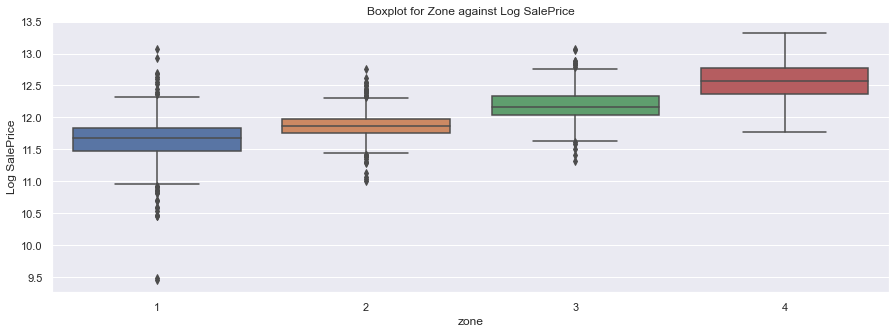

In [198]:
# plot box plot to shows linear relationships against target
sns.boxplot(data=ames, x='zone', y='SalePrice')
plt.ylabel('Log SalePrice')
plt.title('Boxplot for Zone against Log SalePrice');

- From the boxplot, `zone` feature showed a positive linear relationship against Log SalePrice, the better the `zone` the higher the `SalePrice`
- Pearson Correlation Coefficient shows 0.73 aginast SalePrice which is a strong postive correlation

### Age - Year Built to Sold

In [199]:
# check current year related variables corr
ames[['Year_Built','Yr_Sold','Year_Remod/Add','Mo_Sold','SalePrice']].corr()

,Year_Built,Yr_Sold,Year_Remod/Add,Mo_Sold,SalePrice
Year_Built,1.000000,-0.003668,0.630680,-0.004080,0.626173
Yr_Sold,-0.003668,1.000000,0.043352,-0.148353,-0.017333
Year_Remod/Add,0.630680,0.043352,1.000000,0.011104,0.599982
Mo_Sold,-0.004080,-0.148353,0.011104,1.000000,0.031171
SalePrice,0.626173,-0.017333,0.599982,0.031171,1.000000


In [200]:
# create house age variable to determine how old is the house
ames['age'] = ames['Yr_Sold']  - (ames['Year_Remod/Add'] + ames['Year_Built'])/2

# create the same feature for test dataset
test['age'] = test['Yr_Sold']  - (test['Year_Remod/Add'] + test['Year_Built'])/2

In [201]:
# check the Pearson correlation coefficient against SalePrice
check_corr(ames, 'SalePrice')

SalePrice         1.00
Overall_Qual      0.83
quality_score     0.80
zone              0.73
Gr_Liv_Area       0.71
Exter_Qual        0.69
Kitchen_Qual      0.68
location          0.68
Garage_Cars       0.67
Garage_Area       0.66
Total_Bsmt_SF     0.65
Bsmt_Qual         0.64
Year_Built        0.63
1st_Flr_SF        0.62
Garage_Finish     0.60
Year_Remod/Add    0.60
Full_Bath         0.57
Fireplace_Qu      0.54
Heating_QC        0.50
TotRms_AbvGrd     0.50
age              -0.68
Name: SalePrice, dtype: float64

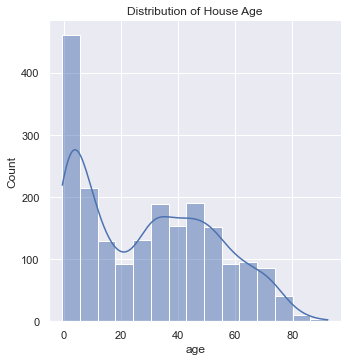

In [202]:
# check the distribution of the house age
sns.displot(ames.age, kde=True)
plt.title('Distribution of House Age',fontsize=12);

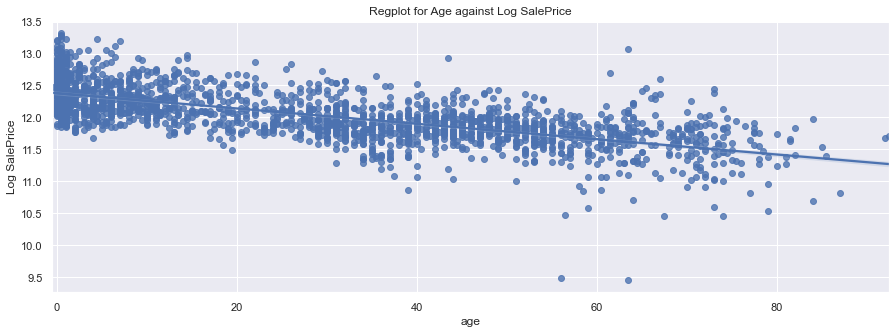

In [203]:
# plot reg plot to shows linear relationships against target
sns.regplot(data=ames, x='age', y='SalePrice')
plt.ylabel('Log SalePrice')
plt.title('Regplot for Age against Log SalePrice');

- From the regplot, `age` feature showed a positive linear relationship against Log SalePrice, the smaller the `age` the higher the `SalePrice`
- Pearson Correlation Coefficient shows -0.68 aginast SalePrice which is a strong negative correlation

In [204]:
# Change variable type to object
ames = ames.astype({'Yr_Sold':'object','Mo_Sold':'object'})
test = test.astype({'Yr_Sold':'object','Mo_Sold':'object'})

We decided to convert `Yr_Sold` and `Mo_Sold` to **Object** for dummify later, as we aware that during 2008 Financial Crisis, US property market had been badly affected, hence the year of sold may be one of the factor to determine the price. As earlier showed, the month of sale can be concentrated in several months with high sale volume and average sale price, hence we would also convert it to an object for dummify later.

### Lot and Size Area (square feet)

According to [MYMOVE website](https://www.mymove.com/buying-selling/guides/most-important-factors-for-buying-your-dream-home/), it mentioned that the lot is not something will first come into buyers' minds.
> *It is the one thing about a property that cannot really be altered. Think about it: You could knock down a house and rebuild it from scratch, but regardless of the changes you make, the lot will stay the same.*

> *Do you long for a back yard big enough for your kids to run around in? Does the lot have a view that you can see yourself enjoying for years to come?*

Although the `Lot_Area` does not have strong correlation with the sale price in Ames, we still need to look into it as one of the major factor together with size area when building our model.

In [205]:
# check the Pearson correlation coefficient of Lot_Area against SalePrice
ames[['Lot_Area','SalePrice']].corr()

,Lot_Area,SalePrice
Lot_Area,1.000000,0.328668
SalePrice,0.328668,1.000000


In [206]:
# describe the lot area
ames.Lot_Area.describe()

count     2039.000000
mean      9899.338401
std       5245.378316
min       1300.000000
25%       7500.000000
50%       9400.000000
75%      11500.000000
max      70761.000000
Name: Lot_Area, dtype: float64

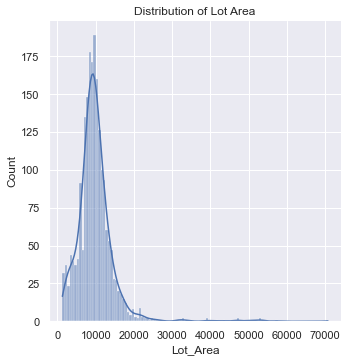

In [207]:
# distribution of lot area
sns.displot(ames.Lot_Area, kde=True)
plt.title('Distribution of Lot Area');

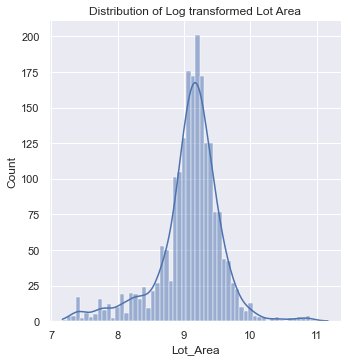

In [208]:
# distribution of lot area after log transformation, and it shows better and closer to normal distribution
sns.displot(np.log(ames.Lot_Area), kde=True)
plt.title('Distribution of Log transformed Lot Area');

- We noticed from above distribution chart the `Lot_Area` distribution was highly skewed to the right with long right tail, with such imbalance distribution of dataset will impact our model learning, hence we decided to log transformed the `Lot_Area`
- From the 2nd distribution chart, it showed the log transformed `Lot_Area` was more normally distributed than the 1st distribution chart

In [209]:
# convert the lot area into logarithm lot_Area in order to skew the distribution
ames['log_Lot_Area'] =np.log(ames['Lot_Area'])
test['log_Lot_Area'] =np.log(test['Lot_Area'])

# drop the initial Lot_Area columns
ames.drop(columns='Lot_Area', axis=1, inplace=True)
test.drop(columns='Lot_Area', axis=1, inplace=True)

Next we look into the feature engineer the size area by creating a new `total_size` to determine how have a feature that cover most of the size area of the house

In [210]:
# check current area size related variables corr
ames[['Gr_Liv_Area','Total_Bsmt_SF','BsmtFin_SF_1',
       'BsmtFin_SF_2','Garage_Area','1st_Flr_SF','2nd_Flr_SF',
       'Low_Qual_Fin_SF','SalePrice']].corr()

,Gr_Liv_Area,Total_Bsmt_SF,BsmtFin_SF_1,BsmtFin_SF_2,Garage_Area,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,SalePrice
Gr_Liv_Area,1.000000,0.410204,0.156550,-0.023465,0.477695,0.531610,0.649803,0.109302,0.707598
Total_Bsmt_SF,0.410204,1.000000,0.491398,0.087316,0.480064,0.789560,-0.238428,-0.020544,0.654660
BsmtFin_SF_1,0.156550,0.491398,1.000000,-0.045141,0.316469,0.413704,-0.183068,-0.080501,0.430290
BsmtFin_SF_2,-0.023465,0.087316,-0.045141,1.000000,0.003595,0.094278,-0.111177,-0.001517,0.009745
Garage_Area,0.477695,0.480064,0.316469,0.003595,1.000000,0.490107,0.112924,-0.067449,0.655303
1st_Flr_SF,0.531610,0.789560,0.413704,0.094278,0.490107,1.000000,-0.290325,-0.008497,0.624994
2nd_Flr_SF,0.649803,-0.238428,-0.183068,-0.111177,0.112924,-0.290325,1.000000,0.011451,0.251817
Low_Qual_Fin_SF,0.109302,-0.020544,-0.080501,-0.001517,-0.067449,-0.008497,0.011451,1.000000,-0.049529
SalePrice,0.707598,0.654660,0.430290,0.009745,0.655303,0.624994,0.251817,-0.049529,1.000000


In [211]:
# create new feature as total_size
ames['total_size'] = (ames['Gr_Liv_Area'] + ames['BsmtFin_SF_1'] + ames['BsmtFin_SF_2']+ ames['Total_Bsmt_SF'] + 
                      ames['Garage_Area']+ ames['1st_Flr_SF'] + ames['2nd_Flr_SF'] + ames['Low_Qual_Fin_SF'] + 
                      ames['Wood_Deck_SF'] + ames['Screen_Porch'])

test['total_size'] = (test['Gr_Liv_Area'] + test['BsmtFin_SF_1'] + test['BsmtFin_SF_2']+ test['Total_Bsmt_SF'] + 
                      test['Garage_Area']+ test['1st_Flr_SF'] + test['2nd_Flr_SF'] + test['Low_Qual_Fin_SF'] + 
                      test['Wood_Deck_SF'] + test['Screen_Porch'])

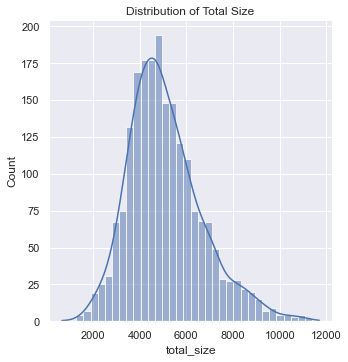

In [212]:
# check the distribution of the total_size
sns.displot(ames.total_size, kde=True)
plt.title('Distribution of Total Size',fontsize=12);

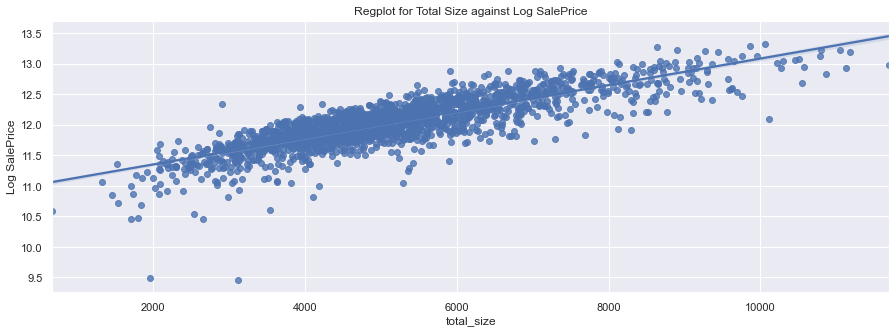

In [213]:
# plot reg plot to shows linear relationships against target
sns.regplot(data=ames, x='total_size', y='SalePrice')
plt.ylabel('Log SalePrice')
plt.title('Regplot for Total Size against Log SalePrice');

- From the regplot, `total_size` feature showed a positive linear relationship against Log SalePrice, the higher the `total_size` tend to have higher on `SalePrice`
- Pearson Correlation Coefficient shows 0.84 aginast SalePrice which is a strong postive correlation

In [214]:
# check the Pearson correlation coefficient against SalePrice
check_corr(ames, 'SalePrice')

SalePrice         1.00
total_size        0.84
Overall_Qual      0.83
quality_score     0.80
zone              0.73
Gr_Liv_Area       0.71
Exter_Qual        0.69
Kitchen_Qual      0.68
location          0.68
Garage_Cars       0.67
Garage_Area       0.66
Total_Bsmt_SF     0.65
Bsmt_Qual         0.64
Year_Built        0.63
1st_Flr_SF        0.62
Garage_Finish     0.60
Year_Remod/Add    0.60
Full_Bath         0.57
Fireplace_Qu      0.54
Heating_QC        0.50
TotRms_AbvGrd     0.50
age              -0.68
Name: SalePrice, dtype: float64

### Basement

In [215]:
# check current basement related variables corr
ames[['Bsmt_Cond','Bsmt_Qual','BsmtFin_Type_1','BsmtFin_Type_2','Bsmt_Exposure','SalePrice']].corr()

,Bsmt_Cond,Bsmt_Qual,BsmtFin_Type_1,BsmtFin_Type_2,Bsmt_Exposure,SalePrice
Bsmt_Cond,1.000000,0.633843,0.314284,0.223405,0.268446,0.294867
Bsmt_Qual,0.633843,1.000000,0.417466,0.102864,0.440768,0.642188
BsmtFin_Type_1,0.314284,0.417466,1.000000,0.114744,0.353766,0.386957
BsmtFin_Type_2,0.223405,0.102864,0.114744,1.000000,0.112164,0.026870
Bsmt_Exposure,0.268446,0.440768,0.353766,0.112164,1.000000,0.402076
SalePrice,0.294867,0.642188,0.386957,0.026870,0.402076,1.000000


In [216]:
# create new feature as basement score
ames['bsmt_score'] = (ames['Bsmt_Cond']*ames['Bsmt_Qual'] + ames['Bsmt_Exposure'] + 
                      (ames['BsmtFin_Type_1'] + ames['BsmtFin_Type_2'])/2)

# create same feature for test dataset
test['bsmt_score'] = (test['Bsmt_Cond']*test['Bsmt_Qual'] + test['Bsmt_Exposure'] + 
                      (test['BsmtFin_Type_1'] + test['BsmtFin_Type_2'])/2)

In [217]:
# check the Pearson correlation coefficient against SalePrice
check_corr(ames, 'SalePrice')

SalePrice         1.00
total_size        0.84
Overall_Qual      0.83
quality_score     0.80
zone              0.73
Gr_Liv_Area       0.71
Exter_Qual        0.69
Kitchen_Qual      0.68
location          0.68
Garage_Cars       0.67
Garage_Area       0.66
Total_Bsmt_SF     0.65
bsmt_score        0.65
Bsmt_Qual         0.64
Year_Built        0.63
1st_Flr_SF        0.62
Garage_Finish     0.60
Year_Remod/Add    0.60
Full_Bath         0.57
Fireplace_Qu      0.54
Heating_QC        0.50
TotRms_AbvGrd     0.50
age              -0.68
Name: SalePrice, dtype: float64

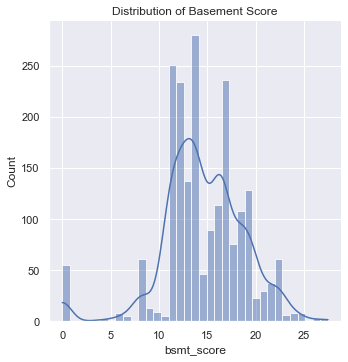

In [218]:
# check the distribution of the bsmt_score
sns.displot(ames.bsmt_score, kde=True)
plt.title('Distribution of Basement Score',fontsize=12);

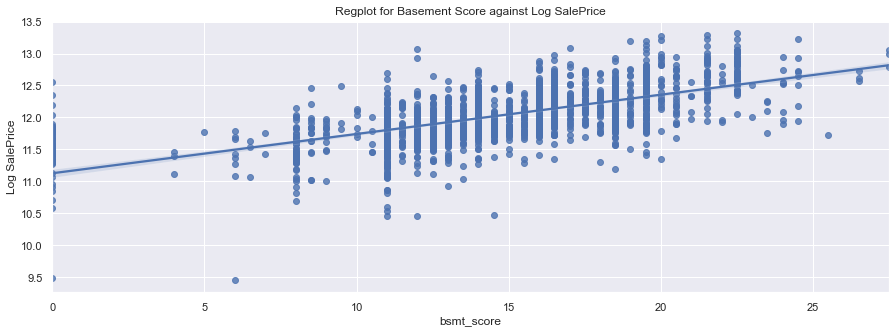

In [219]:
# plot reg plot to shows linear relationships against target
sns.regplot(data=ames, x='bsmt_score', y='SalePrice')
plt.ylabel('Log SalePrice')
plt.title('Regplot for Basement Score against Log SalePrice');

- From the regplot, `bsmt_score` feature showed a positive linear relationship against Log SalePrice, the higher the `bsmt_score` tend to have higher on `SalePrice`
- Pearson Correlation Coefficient shows 0.65 aginast SalePrice which is a strong postive correlation

### Total Rooms with Bathrooms

In [220]:
# check current bathroom related variables corr
ames[['Bsmt_Full_Bath','Full_Bath','Bsmt_Half_Bath','Half_Bath','TotRms_AbvGrd','SalePrice']].corr()

,Bsmt_Full_Bath,Full_Bath,Bsmt_Half_Bath,Half_Bath,TotRms_AbvGrd,SalePrice
Bsmt_Full_Bath,1.000000,-0.041180,-0.148689,-0.036752,-0.049369,0.286190
Full_Bath,-0.041180,1.000000,-0.061868,0.142158,0.525396,0.566301
Bsmt_Half_Bath,-0.148689,-0.061868,1.000000,-0.047943,-0.065290,-0.027868
Half_Bath,-0.036752,0.142158,-0.047943,1.000000,0.335125,0.297979
TotRms_AbvGrd,-0.049369,0.525396,-0.065290,0.335125,1.000000,0.500097
SalePrice,0.286190,0.566301,-0.027868,0.297979,0.500097,1.000000


In [221]:
# create new feature to sum the total rooms availabele inclusive of full and half bath rooms
ames['total_room'] = (ames['Bsmt_Full_Bath'] + ames['Full_Bath'] + ames['TotRms_AbvGrd'] + 
                      0.5*(ames['Bsmt_Half_Bath'] + ames['Half_Bath']))

# create the same feature for test dataset
test['total_room'] = (test['Bsmt_Full_Bath'] + test['Full_Bath'] + test['TotRms_AbvGrd'] + 
                      0.5*(test['Bsmt_Half_Bath'] + test['Half_Bath']))

In [222]:
# check the Pearson correlation coefficient against SalePrice
check_corr(ames, 'SalePrice')

SalePrice         1.00
total_size        0.84
Overall_Qual      0.83
quality_score     0.80
zone              0.73
Gr_Liv_Area       0.71
Exter_Qual        0.69
Kitchen_Qual      0.68
location          0.68
Garage_Cars       0.67
Garage_Area       0.66
Total_Bsmt_SF     0.65
bsmt_score        0.65
total_room        0.65
Bsmt_Qual         0.64
Year_Built        0.63
1st_Flr_SF        0.62
Garage_Finish     0.60
Year_Remod/Add    0.60
Full_Bath         0.57
Fireplace_Qu      0.54
Heating_QC        0.50
TotRms_AbvGrd     0.50
age              -0.68
Name: SalePrice, dtype: float64

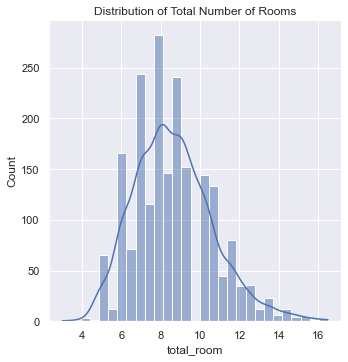

In [223]:
# check the distribution of the bsmt_score
sns.displot(ames.total_room, kde=True)
plt.title('Distribution of Total Number of Rooms',fontsize=12);

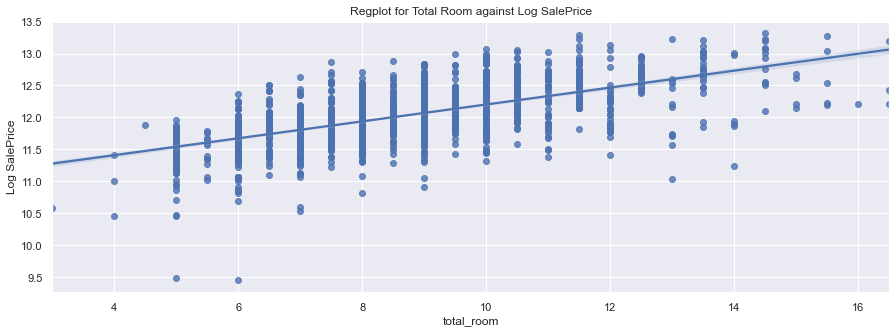

In [224]:
# plot reg plot to shows linear relationships against target
sns.regplot(data=ames, x='total_room', y='SalePrice')
plt.ylabel('Log SalePrice')
plt.title('Regplot for Total Room against Log SalePrice');

- From the regplot, `total_room` feature showed a positive linear relationship against Log SalePrice, the higher the `total_room` tend to have higher on `SalePrice`
- Pearson Correlation Coefficient shows 0.65 aginast SalePrice which is a strong postive correlation

### Garage

In [225]:
# check current garage and kitchen related variables corr
ames[['Garage_Cond','Garage_Qual','Garage_Cars','Garage_Finish', 'Garage_Area','SalePrice']].corr()

,Garage_Cond,Garage_Qual,Garage_Cars,Garage_Finish,Garage_Area,SalePrice
Garage_Cond,1.000000,0.949346,0.557462,0.480648,0.543468,0.355452
Garage_Qual,0.949346,1.000000,0.571056,0.486162,0.560065,0.367201
Garage_Cars,0.557462,0.571056,1.000000,0.573162,0.897008,0.669565
Garage_Finish,0.480648,0.486162,0.573162,1.000000,0.513264,0.600220
Garage_Area,0.543468,0.560065,0.897008,0.513264,1.000000,0.655303
SalePrice,0.355452,0.367201,0.669565,0.600220,0.655303,1.000000


In [226]:
# create new feature as garage_score
ames['garage_score'] = (ames['Garage_Cond']*ames['Garage_Qual']*ames['Garage_Cars']*
                        ames['Garage_Finish']*ames['Garage_Area'])**0.5

# create the same feature for test dataset
test['garage_score'] = (test['Garage_Cond']*test['Garage_Qual']*test['Garage_Cars']*
                        test['Garage_Finish']*test['Garage_Area'])**0.5

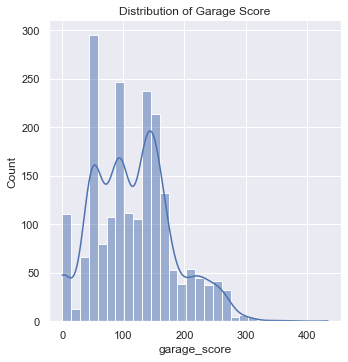

In [227]:
# check garage score distribution
sns.displot(ames.garage_score, kde=True)
plt.title('Distribution of Garage Score',fontsize=12);

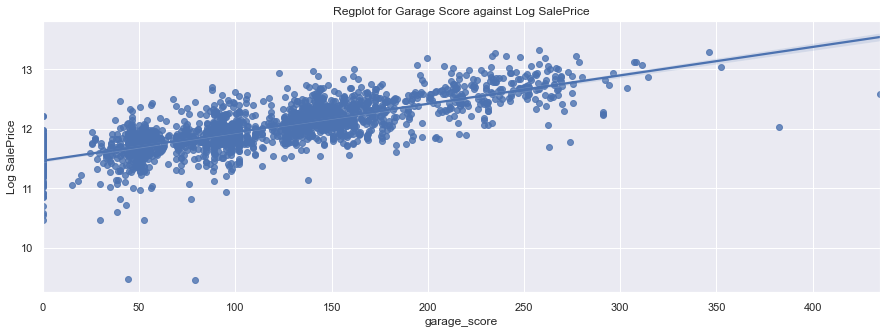

In [228]:
# plot reg plot to shows linear relationships against target
sns.regplot(data=ames, x='garage_score', y='SalePrice')
plt.ylabel('Log SalePrice')
plt.title('Regplot for Garage Score against Log SalePrice');

- From the regplot, `garage_score` feature showed a positive linear relationship against Log SalePrice, the higher the `garage_score` tend to have higher on `SalePrice`
- Pearson Correlation Coefficient shows 0.77 aginast SalePrice which is a strong postive correlation

In [229]:
# check pearson correlation coefficient
check_corr(ames, 'SalePrice')

SalePrice         1.00
total_size        0.84
Overall_Qual      0.83
quality_score     0.80
garage_score      0.77
zone              0.73
Gr_Liv_Area       0.71
Exter_Qual        0.69
Kitchen_Qual      0.68
location          0.68
Garage_Cars       0.67
Garage_Area       0.66
Total_Bsmt_SF     0.65
bsmt_score        0.65
total_room        0.65
Bsmt_Qual         0.64
Year_Built        0.63
1st_Flr_SF        0.62
Garage_Finish     0.60
Year_Remod/Add    0.60
Full_Bath         0.57
Fireplace_Qu      0.54
Heating_QC        0.50
TotRms_AbvGrd     0.50
age              -0.68
Name: SalePrice, dtype: float64

### Multicollinearity

In [230]:
# check pearson correlation coefficient
check_corr(ames, 'SalePrice')

SalePrice         1.00
total_size        0.84
Overall_Qual      0.83
quality_score     0.80
garage_score      0.77
zone              0.73
Gr_Liv_Area       0.71
Exter_Qual        0.69
Kitchen_Qual      0.68
location          0.68
Garage_Cars       0.67
Garage_Area       0.66
Total_Bsmt_SF     0.65
bsmt_score        0.65
total_room        0.65
Bsmt_Qual         0.64
Year_Built        0.63
1st_Flr_SF        0.62
Garage_Finish     0.60
Year_Remod/Add    0.60
Full_Bath         0.57
Fireplace_Qu      0.54
Heating_QC        0.50
TotRms_AbvGrd     0.50
age              -0.68
Name: SalePrice, dtype: float64

In [231]:
# check any multicollinearity
ames[check_corr(ames, 'SalePrice').index].corr()

,SalePrice,total_size,Overall_Qual,quality_score,garage_score,zone,Gr_Liv_Area,Exter_Qual,Kitchen_Qual,location,...,Bsmt_Qual,Year_Built,1st_Flr_SF,Garage_Finish,Year_Remod/Add,Full_Bath,Fireplace_Qu,Heating_QC,TotRms_AbvGrd,age
SalePrice,1.000000,0.841230,0.827078,0.804688,0.765532,0.730300,0.707598,0.694950,0.683579,0.680738,...,0.642188,0.626173,0.624994,0.600220,0.599982,0.566301,0.542049,0.503078,0.500097,-0.679681
total_size,0.841230,1.000000,0.656659,0.613801,0.700734,0.574103,0.843368,0.532059,0.534824,0.491039,...,0.527357,0.424920,0.742660,0.479660,0.387449,0.545800,0.515979,0.318185,0.621171,-0.451441
Overall_Qual,0.827078,0.656659,1.000000,0.923834,0.691095,0.673383,0.563784,0.740242,0.689644,0.704267,...,0.653957,0.606764,0.474680,0.555676,0.584564,0.519639,0.479580,0.476694,0.372468,-0.659626
quality_score,0.804688,0.613801,0.923834,1.000000,0.704658,0.693052,0.501613,0.893298,0.746674,0.740791,...,0.652100,0.643286,0.456092,0.565706,0.614783,0.500109,0.436979,0.514172,0.325240,-0.696288
garage_score,0.765532,0.700734,0.691095,0.704658,1.000000,0.659575,0.535667,0.636400,0.584463,0.630429,...,0.556787,0.648121,0.514948,0.801907,0.525901,0.499107,0.439983,0.425920,0.375299,-0.659253
zone,0.730300,0.574103,0.673383,0.693052,0.659575,1.000000,0.444510,0.636505,0.562791,0.868308,...,0.584275,0.731699,0.444426,0.563709,0.559864,0.500255,0.398010,0.427566,0.289836,-0.729529
Gr_Liv_Area,0.707598,0.843368,0.563784,0.501613,0.535667,0.444510,1.000000,0.432173,0.443397,0.427301,...,0.337018,0.260024,0.531610,0.361007,0.323021,0.628952,0.482120,0.280265,0.812733,-0.316081
Exter_Qual,0.694950,0.532059,0.740242,0.893298,0.636400,0.636505,0.432173,1.000000,0.728838,0.695920,...,0.579019,0.618276,0.401900,0.513690,0.618162,0.471442,0.352620,0.525554,0.264779,-0.680925
Kitchen_Qual,0.683579,0.534824,0.689644,0.746674,0.584463,0.562791,0.443397,0.728838,1.000000,0.599673,...,0.526276,0.538349,0.403954,0.460895,0.618423,0.429747,0.358478,0.513301,0.277822,-0.629086
location,0.680738,0.491039,0.704267,0.740791,0.630429,0.868308,0.427301,0.695920,0.599673,1.000000,...,0.610286,0.729430,0.328780,0.519244,0.626847,0.541669,0.352134,0.498766,0.256422,-0.758186


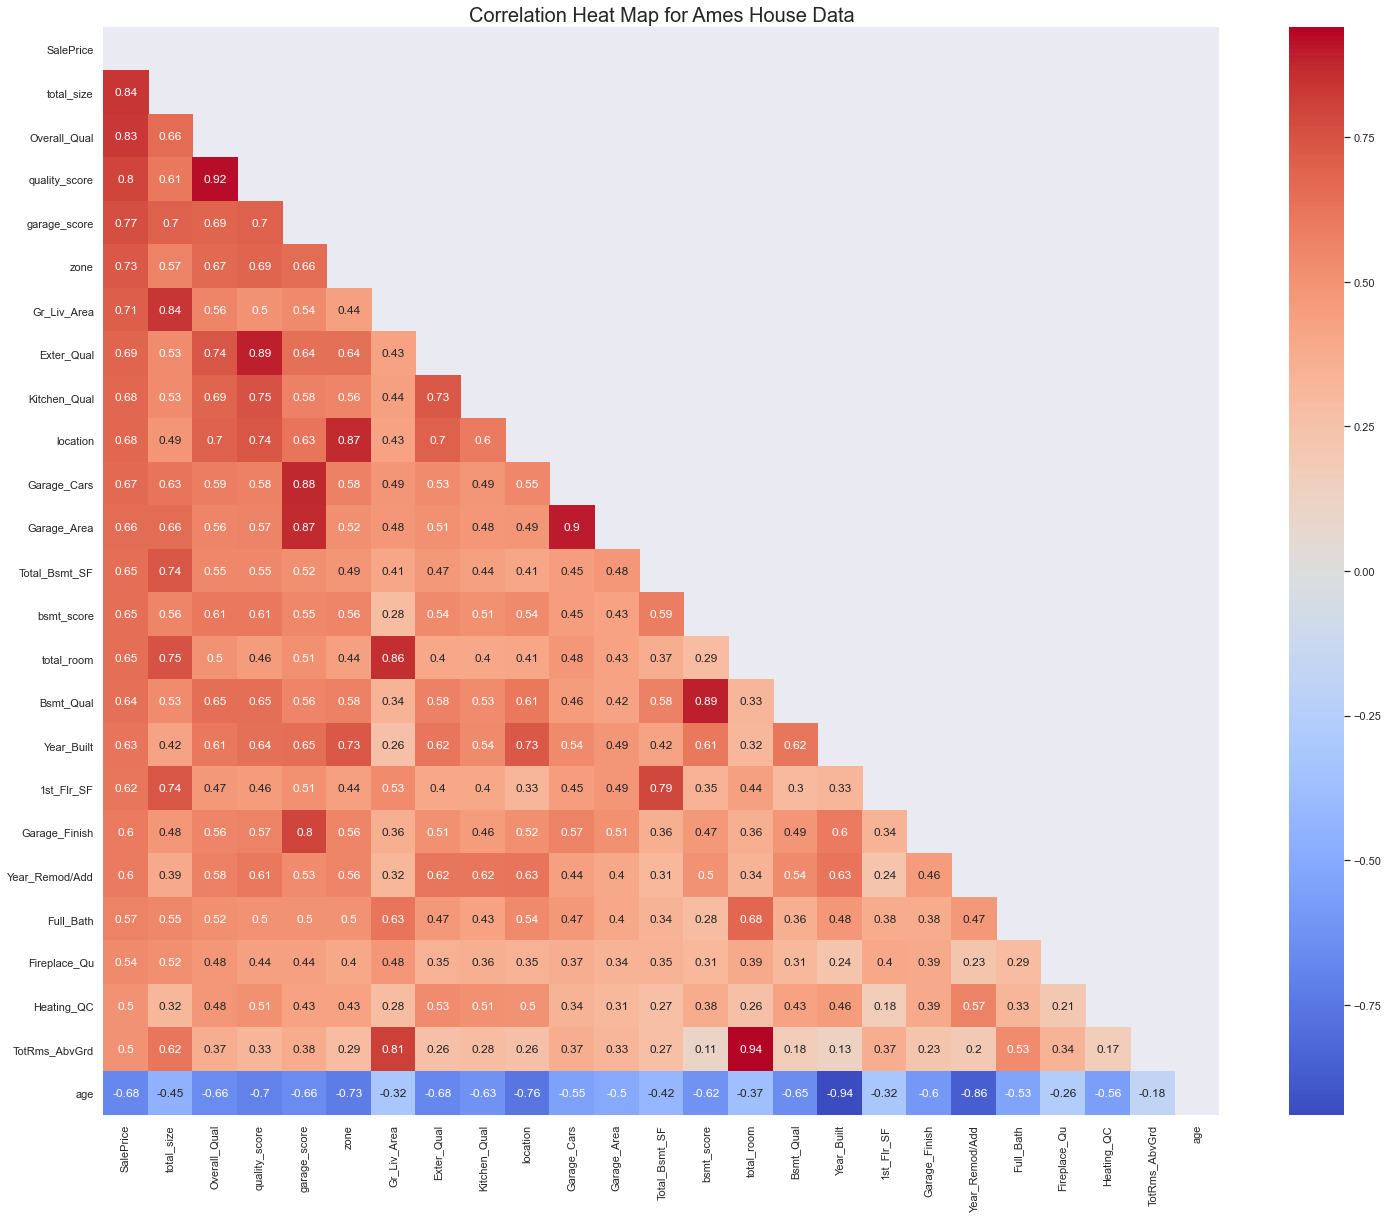

In [232]:
# use heatmap to find the Pearson Correlation Coefficient on different numeric columns against SalePrice above 0.5 
# applying masking techniques to see only one half heatmap,
# below diagonal capturing a col's correlation against itself
plt.figure(figsize=(25,20))
corr = round(ames[check_corr(ames, 'SalePrice').index].corr(),2)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# 'coolwarm' colormap is easier to read in my opinion
sns.heatmap(corr, mask = mask, annot = True, cmap='coolwarm')

plt.title('Correlation Heat Map for Ames House Data',fontsize=20)
plt.savefig('../images/heatmap_mcll_ori.png',bbox_inches='tight');

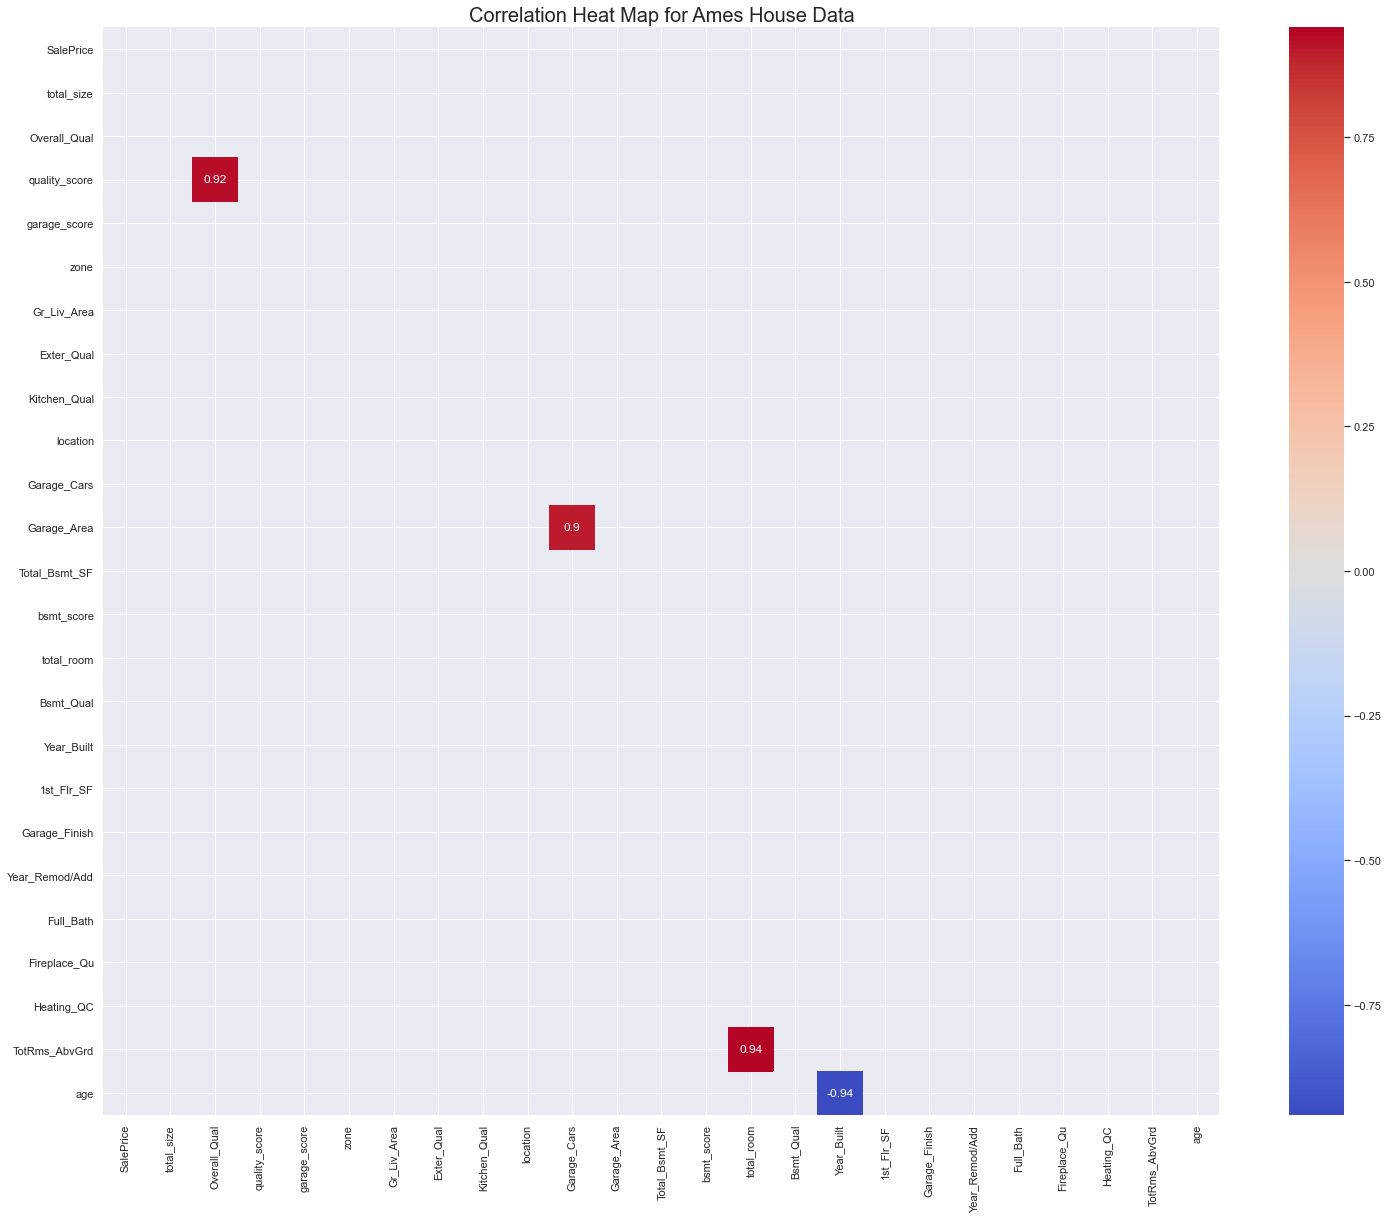

In [233]:
# use heatmap to find the Pearson Correlation Coefficient on different numeric columns against SalePrice above 0.5 
# further applying masking techniques to see only one half heatmap with Pearson correlation coefficient above 0.8
plt.figure(figsize=(25,20))
corr = round(ames[check_corr(ames, 'SalePrice').index].corr(),2)
high_corr = corr[abs(corr)>=0.9]

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# 'coolwarm' colormap is easier to read in my opinion
sns.heatmap(high_corr, mask = mask, annot = True, cmap='coolwarm')
plt.grid(); 
plt.title('Correlation Heat Map for Ames House Data',fontsize=20)
plt.savefig('../images/heatmap_mcll.png',bbox_inches='tight');

There are total 4 pairs of numeric features with pearson corelation coefficient with each other above **0.9**, in order to reduce the multicollinearity of the variables and affect the machine learning. We decided to keep the variables that we have newly created.

Features pair have pearson correlation coefficient 0.5 and above against SalePrice:

- **Overall_Qual - quality_score** > drop `Overall_Qual`
- **Garage_Cars - Garage_Area** > drop `Garage_Cars`
- **TotRms_AbvGrd - total_room** > drop `TotRms_AbvGrd`
- **age - Year_Built** > drop `Year_Built`

since we have already re-engineer the `age` feature, hence we decided to drop `Year_Built`, `Year_Remod/Add` and `Garage_Yr_Blt` from our model to avoid potential noise.

In [234]:
# create a list of variable to be dropped for modelling
features_to_drop = ['Overall_Qual','Garage_Cars','TotRms_AbvGrd','Year_Built','Year_Remod/Add','Garage_Yr_Blt'] 

# create a list of the test data set ID
test_id_list = [id_num for id_num in test.Id]

# check the lenght of list
len(test_id_list)

878

In [235]:
# check the shape of ames and test data set before drop the columns
print(f'ames shape: {ames.shape}')
print(f'test shape: {test.shape}')

ames shape: (2039, 84)
test shape: (878, 83)


In [236]:
# drop the features that have high multicollearity and the potential noise features
ames.drop(columns=features_to_drop, axis=1, inplace=True)
test.drop(columns=features_to_drop, axis=1, inplace=True)

In [237]:
# check the shape of ames and test data set after drop the columns
print(f'ames shape: {ames.shape}')
print(f'test shape: {test.shape}')

ames shape: (2039, 78)
test shape: (878, 77)


In [238]:
# Combine the ames and test dataset before drop columns and dummify
X_train = ames.drop(['SalePrice'], axis=1)
X = pd.concat([X_train, test])

### Dummify Categorical Variables

In [239]:
# check the X data set info
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 877
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2917 non-null   object 
 1   PID              2917 non-null   object 
 2   MS_SubClass      2917 non-null   object 
 3   MS_Zoning        2917 non-null   object 
 4   Street           2917 non-null   object 
 5   Alley            2917 non-null   object 
 6   Lot_Shape        2917 non-null   object 
 7   Land_Contour     2917 non-null   object 
 8   Utilities        2917 non-null   object 
 9   Lot_Config       2917 non-null   object 
 10  Land_Slope       2917 non-null   object 
 11  Neighborhood     2917 non-null   object 
 12  Condition_1      2917 non-null   object 
 13  Condition_2      2917 non-null   object 
 14  Bldg_Type        2917 non-null   object 
 15  House_Style      2917 non-null   object 
 16  Overall_Cond     2917 non-null   int64  
 17  Roof_Style     

In [240]:
# shape before dummify
print(f'X_train shape: {X_train.shape}')
print(f'X shape: {X.shape}')

X_train shape: (2039, 77)
X shape: (2917, 77)


In [241]:
# categorical columns needed to be dummify, exclude the ID and PID
dummify_col = [col for col in ames.select_dtypes(include='O').drop(columns=['Id','PID']).columns]
print(dummify_col)

['MS_SubClass', 'MS_Zoning', 'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type', 'House_Style', 'Roof_Style', 'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Foundation', 'Heating', 'Electrical', 'Garage_Type', 'Misc_Feature', 'Mo_Sold', 'Yr_Sold', 'Sale_Type']


In [242]:
# dummify the categorical columns exclude ID and PID
X = pd.get_dummies(X, columns=dummify_col, drop_first= True)

In [243]:
# shape after dummify
print(f'X_train shape: {X_train.shape}')
print(f'X shape: {X.shape}')

X_train shape: (2039, 77)
X shape: (2917, 235)


- After one hot encoding / dummify our categorical variables, our features had increased from 77 to 235

## Model Preparation and Selection

We decided to use the **train dataset** and conduct further *train-test-split* to evaluate and select our best final model

In [244]:
# select our features as X_train by dropping of ID and PID, and y as our target response 'SalePrice'
X_train = X[~X['Id'].isin(test_id_list)].drop(columns=['Id','PID'])
X_test = X[X['Id'].isin(test_id_list)].drop(columns=['Id','PID']) #this is meant for final model prediction

y = ames['SalePrice'] # assign our target response SalePrice to y

### Scaling

In [245]:
# instantiate StandardScaler
ss = StandardScaler()

In [246]:
# scaling the X_train features
X_ss = ss.fit_transform(X_train)

### Train Test Split

In [247]:
# use X_ss and y from train datasets as our features and target response for train test split by using 80% of the train size
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(X_ss, y, train_size=0.8, random_state=8 )

### Baseline Model: Linear Regression

We will first set our baseline model by using the simplest model - Linear Regression, then will only further tune the model by using Lasso Regression and Ridge Regression.

In [248]:
# instantiate our baseline models - linear regressioni
lreg = LinearRegression()

# fit our models with the train data
lreg.fit(X_train_ss, y_train_ss)

LinearRegression()

In [249]:
# cross_val_score: Evaluates a score by cross-validation. number of folds is given in cv (default=5)
lreg_scores = cross_val_score(lreg, X_train_ss, y_train_ss)

In [250]:
# evaluate our cross val score on different models
print(f'Linear Regresion')
print(lreg_scores) 
print(f'Mean Cross Val Score (train): {lreg_scores.mean()}')

Linear Regresion
[-1.34986689e+16 -1.49042560e+19 -1.14414000e+20 -4.54554558e+20
 -4.22030950e+19]
Mean Cross Val Score (train): -1.2521788157078605e+20


In [251]:
# use our model to predict our target on X_test_ss
y_lreg_pred = lreg.predict(X_test_ss)

In [252]:
# evaluate our baseline models
print(f'Linear Regresion')
print(f'R2 score (train): {lreg.score(X_train_ss, y_train_ss)}')
print(f'RMSE (train): {mean_squared_error(np.exp(y_train_ss), np.exp(lreg.predict(X_train_ss)), squared=False)}')

print(f'R2 score (test): {lreg.score(X_test_ss, y_test_ss)}')

# RMSE score for y_test_ss, y_lreg_pred turn out to be error due to infinity value, hence we do not print it out the value

Linear Regresion
R2 score (train): 0.9411516636211819
RMSE (train): 16444.859247607772
R2 score (test): -2.2433589224956674e+20


C:\Users\OEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


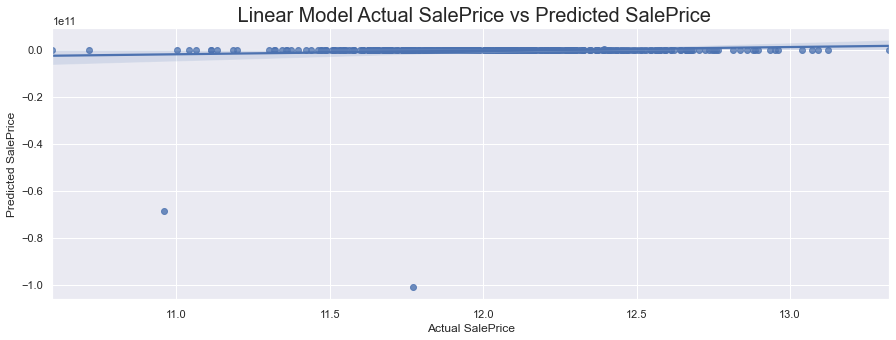

In [253]:
# plot the regplot to shows our true value against predicted value on linear model
sns.regplot(y_test_ss, y_lreg_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title(' Linear Model Actual SalePrice vs Predicted SalePrice', fontsize=20)
plt.savefig('../images/linear_model.png',bbox_inches='tight');

- From our baseline model $R^2$ score **0.9411** on train data while $R^2$ score **-2.2e+20** on test data, the regplot also showed worst in prediction the sale price.
- Since we have total 235 features, it can be explained by baseline model (linear regression) was overfitted, hence the our baseline model perform very badly and unable to predict the housing price accurately. 
- although RMSE score on train data only about 16,444, when it comes to RMSE score on the test data, it turn out to be an error due to infinity value after exponent on the housing price. This is casued by the predicted housing price from baseline model are too far off, and inaccurately to generalize the prediction.
- In order to resolve overfitting issue, we will look into regularization model - Ridge Regression and Lasso Regression. We will then evaluate and decide which model to be our final production model.

### Regularization: Ridge and Lasso Regression

We wll first use the cross validation model to obtain the optimal alpha strength for both Ridge Regression Model and Lasso Regression Model.

In [254]:
# instantiate our models
ridgeregCV = RidgeCV(alphas=np.linspace(.1, 10, 100))
lassoregCV = LassoCV(n_alphas=500)

In [255]:
# instantiate ridge cross validation to choose our optimal alpha which is our regularization strength
ridgereg_cv = RidgeCV(alphas=np.logspace(.1,10,100), scoring='r2', cv=5).fit(X_train_ss , y_train_ss) # fit with 5-fold cv
lassoreg_cv = LassoCV(n_alphas=500, cv=5).fit(X_train_ss , y_train_ss) # fit with 5-fold cv

In [256]:
# check the optimal alpha strength
print(f'RidgeCV optimal alpha strength: {ridgereg_cv.alpha_}')
print(f'LassoCV optimal alpha strength: {lassoreg_cv.alpha_}')

RidgeCV optimal alpha strength: 316.22776601683825
LassoCV optimal alpha strength: 0.0035199086231733523


### Hyperparameters: GridSearchCV

Besides the optimal alpha strength on the models, we also look into to obtain the best parameters from each model by using GridSearchCV

In [257]:
# instantiate our models
ridgereg = Ridge()
lassoreg = Lasso()

In [258]:
# check ridge model parameters
ridgereg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [259]:
# check ridge model parameters
lassoreg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [260]:
# set out params for gridsearch by using the optimal alpha from ridgereg_cv and lassoreg_cv
ridge_params = {'alpha': [ridgereg_cv.alpha_],
                'fit_intercept':[True,False], 
                'normalize':[True,False], 
                'copy_X':[True, False]}

lasso_params = {'alpha': [lassoreg_cv.alpha_],
                'fit_intercept':[True,False], 
                'normalize':[True,False], 
                'copy_X':[True, False]}

In [261]:
# gridsearch the best parameters using the optimal alpha 
ridgereg_gs = GridSearchCV(estimator = ridgereg,
                           param_grid = ridge_params, 
                           cv = 5,
                           verbose = 1)

ridgereg_gs.fit(X_train_ss, y_train_ss)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [316.22776601683825], 'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             verbose=1)

In [262]:
# check the best paramaters and the best score for ridge model
print(ridgereg_gs.best_params_)
print(ridgereg_gs.best_score_)

{'alpha': 316.22776601683825, 'copy_X': True, 'fit_intercept': True, 'normalize': False}
0.902473640653468


- The best parameters for ridge model is same as the defaul parameters

In [263]:
# gridsearch the best parameters using the optimal alpha 
lassoreg_gs = GridSearchCV(estimator = lassoreg,
                           param_grid = lasso_params, 
                           cv = 5,
                           verbose = 1)

lassoreg_gs.fit(X_train_ss, y_train_ss)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0035199086231733523],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             verbose=1)

In [264]:
# check the best paramaters and the best score for lasso model
print(lassoreg_gs.best_params_)
print(lassoreg_gs.best_score_)

{'alpha': 0.0035199086231733523, 'copy_X': True, 'fit_intercept': True, 'normalize': False}
0.9015396699529372


- The best parameters for lasso model is same asthe defaul parameters

After we obtain both optimal alpha and best parameters, we will then fit our models and evaluate by using 2 metrics:
- **Coefficient of Determination ($R^2$)** 
- **Root Mean Squared Error (RMSE)**

In [265]:
# use the best/default parameters and optimal alpha to fit our models with the train data
ridgereg = Ridge(alpha=ridgereg_cv.alpha_).fit(X_train_ss, y_train_ss)
lassoreg = Lasso(alpha=lassoreg_cv.alpha_).fit(X_train_ss, y_train_ss)

In [266]:
# use our model to predict our target on X_test_ss
y_ridgereg_pred = ridgereg.predict(X_test_ss)
y_lassoreg_pred = lassoreg.predict(X_test_ss)

In [267]:
# evaluate our models
print(f'Ridge Regresion')
print(f'R2 score (train): {ridgereg.score(X_train_ss, y_train_ss)}')
print(f'RMSE (train): {mean_squared_error(np.exp(y_train_ss), np.exp(ridgereg.predict(X_train_ss)), squared=False)}')

print(f'R2 score (test): {ridgereg.score(X_test_ss, y_test_ss)}')
print(f'RMSE (test): {mean_squared_error(np.exp(y_test_ss), np.exp(y_ridgereg_pred), squared=False)}')
print('='*20)


print(f'Lasso Regresion')
print(f'R2 score (train): {lassoreg.score(X_train_ss, y_train_ss)}')
print(f'RMSE (train): {mean_squared_error(np.exp(y_train_ss), np.exp(lassoreg.predict(X_train_ss)), squared=False)}')

print(f'R2 score (test): {lassoreg.score(X_test_ss, y_test_ss)}')
print(f'RMSE (test): {mean_squared_error(np.exp(y_test_ss), np.exp(y_lassoreg_pred), squared=False)}')

Ridge Regresion
R2 score (train): 0.9280654622125583
RMSE (train): 17439.373727327125
R2 score (test): 0.9234481462202144
RMSE (test): 21025.320536484043
Lasso Regresion
R2 score (train): 0.9242393301835611
RMSE (train): 18050.85569437721
R2 score (test): 0.9256974398979523
RMSE (test): 20783.936008047996


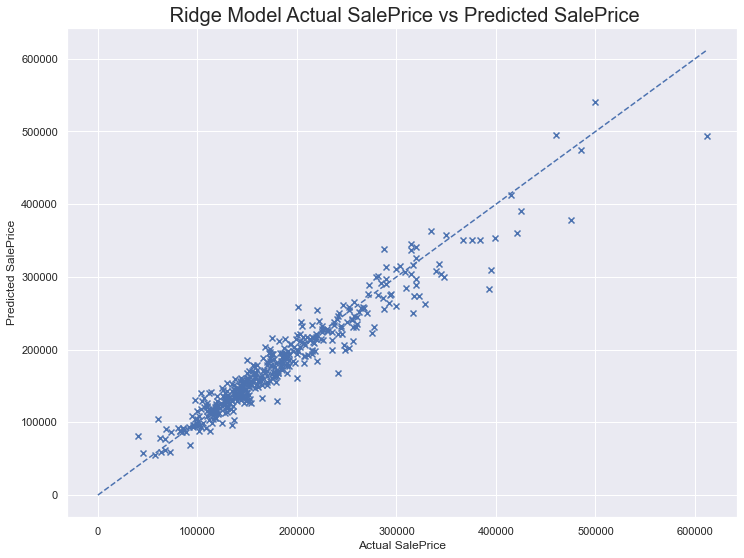

In [268]:
# plot the scatterplot to shows our true value against predicted value on ridge model
plt.figure(figsize = (12, 9))

plt.scatter(np.exp(y_test_ss), np.exp(y_ridgereg_pred), marker = 'x')

# Line showing perfect predictions.
plt.plot([0, max(max(np.exp(y_test_ss)),max(np.exp(y_ridgereg_pred)))],
         [0, max(max(np.exp(y_test_ss)),max(np.exp(y_ridgereg_pred)))],
         linestyle = '--');

plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title(' Ridge Model Actual SalePrice vs Predicted SalePrice', fontsize=20)
plt.savefig('../images/ridge_model.png',bbox_inches='tight');

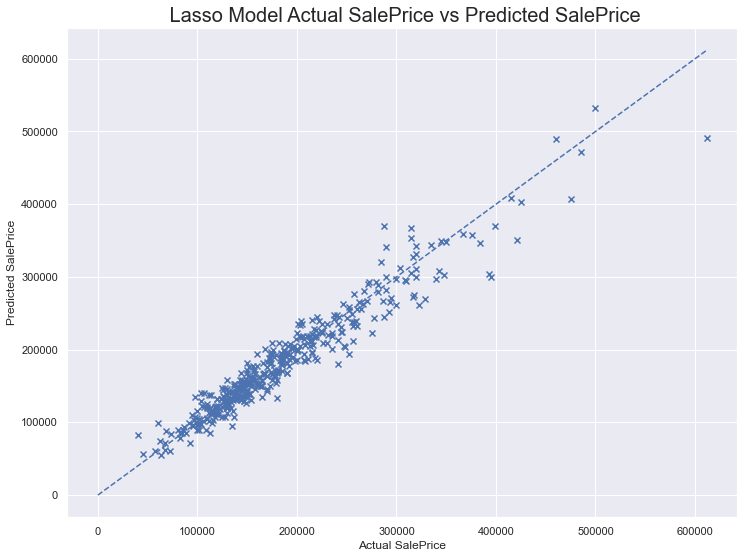

In [269]:
# plot the scatterplot to shows our true value against predicted value on lasso model
plt.figure(figsize = (12, 9))

plt.scatter(np.exp(y_test_ss), np.exp(y_lassoreg_pred), marker = 'x')

# Line showing perfect predictions.
plt.plot([0, max(max(np.exp(y_test_ss)),max(np.exp(y_lassoreg_pred)))],
         [0, max(max(np.exp(y_test_ss)),max(np.exp(y_lassoreg_pred)))],
         linestyle = '--');

plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title(' Lasso Model Actual SalePrice vs Predicted SalePrice', fontsize=20)
plt.savefig('../images/lasso_model.png',bbox_inches='tight');

C:\Users\OEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


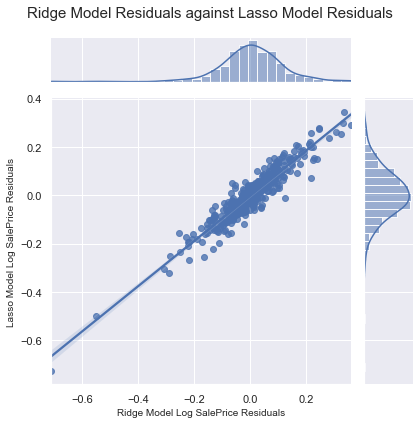

In [270]:
# plot jointplot on models residuals:
ridge_resid = y_test_ss - ridgereg.predict(X_test_ss)
lasso_resid = y_test_ss - lassoreg.predict(X_test_ss)

sns.jointplot(ridge_resid, lasso_resid, kind='reg').set_axis_labels('Ridge Model Log SalePrice Residuals', 
                                                                    'Lasso Model Log SalePrice Residuals', fontsize=10)

plt.suptitle( "Ridge Model Residuals against Lasso Model Residuals" , size = 15 )

plt.tight_layout()
plt.savefig('../images/ridge_lasso.png',bbox_inches='tight');

**Summary of Metrics:**

|Model|Cross Validation Score|$R^2$ Score (Train)|$R^2$ Score (Test)|RMSE (Train)|RMSE (Test)|
|---|---|---|---|---|---|
|Ridge Regression|0.902473640653468|0.9280654622125583|0.9234481462202144|17439.373727327125|21025.320536484043|
|Lasso Regression|0.9015396699529372|0.9242393301835611|0.9256974398979523|18050.85569437721|20783.936008047996|

- From both scatter plot charts, it shows that both models actual saleprice against our predicted saleprice are close to the ideal line, it means that the model quite accurately in predicting the housing price when comes to evaluate it against the actual housing price.
- Jointplot above shows both models having close residuals, however Lasso model tend to have more normally distributed on the residuals.
- Refer to the summary of metrics, Ridge regression model score better on Train $R^2$ and RMSE as compared to Lasso regression model, although the model is performing far better than our baseline model as it regularize the coefficients of our features, the test results are not better off against lasso regression model, most probably the Ridge regression model is still overfitted.
- Lasso regression model on the other hand provided $R^2$ score of 92.42% on train data and 92.57% on test data, it was only about 0.15% difference and it showed further reduce our model from overfitting. 
- Both models have very close on the RMSE on test data, which Lasso regression model have slightly lower RMSE than ridge regression model about `$`240. The lower the RMSE means that the predicted saleprice is less vary from the actual saleprice and further lead to more accurate prediction.
- Hence we decided to select Lasso Regression model as our final model for predicting Ames housing price as the $R^2$ on both train and test did not show overfitting and RMSE on both train and test are in acceptable range while RMSE on test are slightly lower against Ridge regression's RMSE. The scatterplot of Lasso model also shows that is good in generalize to new data.

# Modeling and Evaluation

In [271]:
# instantiate StandardScaler
sc = StandardScaler()

In [272]:
# fit transform the features
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Predictive Model

Building our final predictive model using Lasso with optimal alpha of **155.88748610204112**

In [273]:
# use the optimal alpha strength and check cross val score
lasso = Lasso(alpha=lassoreg_cv.alpha_).fit(X_train_sc, y)

lasso_scores = cross_val_score(lasso, X_train_sc, y, cv=5)

print (lasso_scores)
print(f'Lasso Regression Mean Cross Val Score: {lasso_scores.mean()}')

[0.88473471 0.92320022 0.91227669 0.88313452 0.94048116]
Lasso Regression Mean Cross Val Score: 0.9087654579586275


In [274]:
# check the r2 score for the lasso model
print(f'LassoCV R^2 on training set: {lasso.score(X_train_sc, y)}')

LassoCV R^2 on training set: 0.9245518800463668


In [275]:
# checking RMSE on training set
print(f'Lasso Regression RMSE on training set: {mean_squared_error(np.exp(y), np.exp(lasso.predict(X_train_sc)), squared=False)}')

Lasso Regression RMSE on training set: 18426.868187826698


In [276]:
# create a dataframe to shows the coefficients, exponent coefficients of each variables in descending order
lasso_coefs = pd.DataFrame({'variable':X_train.columns, 
                            'coef':lasso.coef_,
                            'exp_coef': np.exp(lasso.coef_),
                            'y_percent_change': (np.exp(lasso.coef_)-1)*100,
                            'abs_y_percent_change': abs((np.exp(lasso.coef_)-1)*100)
                           }
                          )

lasso_coefs.sort_values('abs_y_percent_change', inplace=True, ascending=False)

print('Numbers of features with percent change above 0 is',lasso_coefs[lasso_coefs['abs_y_percent_change']>0].shape[0])
print('Numbers of features with percent change equal to 0 is',lasso_coefs[lasso_coefs['abs_y_percent_change']==0].shape[0])
lasso_coefs.head(30)

Numbers of features with percent change above 0 is 85
Numbers of features with percent change equal to 0 is 148


,variable,coef,exp_coef,y_percent_change,abs_y_percent_change
44,total_size,0.118113,1.125371,12.537079,12.537079
39,quality_score,0.088897,1.092968,9.296784,9.296784
42,age,-0.047761,0.953361,-4.663883,4.663883
18,Gr_Liv_Area,0.041436,1.042306,4.230627,4.230627
0,Overall_Cond,0.041284,1.042148,4.214825,4.214825
43,log_Lot_Area,0.036787,1.037472,3.747207,3.747207
45,bsmt_score,0.021286,1.021514,2.151404,2.151404
41,zone,0.019397,1.019586,1.958618,1.958618
33,Paved_Drive,0.018109,1.018274,1.827401,1.827401
27,Fireplaces,0.014872,1.014983,1.498322,1.498322


In [278]:
# check total remaining features
print(lasso_coefs.shape[0])

233


In [279]:
# check the number of features with 0% impact
print('Total numbers of features with 0% impact:', lasso_coefs[lasso_coefs['abs_y_percent_change']==0].shape[0])

# check the percentage of features with 0% impact
print('Total % of features with 0% impact:', round(lasso_coefs[lasso_coefs['abs_y_percent_change']==0].shape[0] / lasso_coefs.shape[0] *100,2))

Total numbers of features with 0% impact: 148
Total % of features with 0% impact: 63.52


- There are total of 148 features had 0% impact on our target SalePrce which is about 63% of the overall features.

In [280]:
# making predicion on testing set
y_pred_lasso = lasso.predict(X_test_sc)

In [281]:
# save the prediction data into dataframe for submission
# exponetial the log transformed saleprice back before submission
lasso_submit = pd.DataFrame({'Id': test.Id, 'SalePrice': np.exp(y_pred_lasso)})
lasso_submit.to_csv('../datasets/submit_pred.csv', index=False) 

- Our Lasso Regression model have $R^2$ score of 92.45% and mean cross val score of 90.88%, it have only about 1.56% difference and it further reduce our model from overfitting
- The $R^2$ score of 92.45% reveals that 92.45% of the data fit our regression model. It also shows as our model accuracy.
- Submitted to Kaggle with lasso regression model **RMSE on testing set: 19,795.80**
- it means our predictive model have average difference of $19,795.80 from the actual housing price which we find this is acceptable range to deploy our predictive model for generalization.

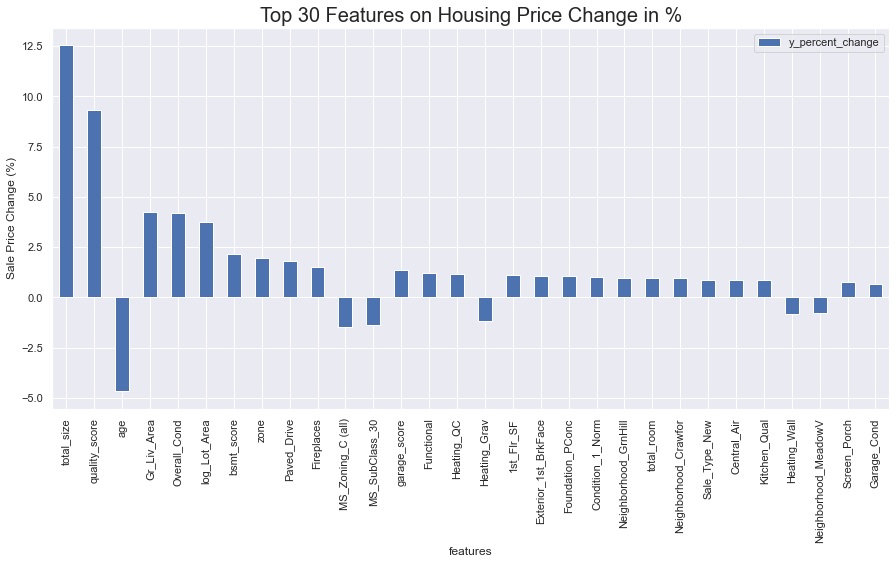

In [282]:
# visualize the top 30 features coef by bar plot
pd.DataFrame(lasso_coefs.set_index('variable')['y_percent_change']).head(30).plot.bar(figsize=(15, 7))
plt.xlabel('features')
plt.ylabel('Sale Price Change (%)')
plt.title('Top 30 Features on Housing Price Change in %', fontsize=20);

The interpretation for **Log-Level Regression** can be found from [Interpret Regression Coefficient Estimates](https://sites.google.com/site/curtiskephart/ta/econ113/interpreting-beta)
> “if we change x by 1 (unit), we’d expect our y variable to change by 100⋅β1 percent”

From the bar chart it shows that the top 6 features with strong impact on the housing price change in %:
- total_size (positve)
- quality_score (positve)
- age (Negative)
- Gr_Liv_Area (positve)
- Overall_Cond (positve)
- log_Lot_Area (positve)

For `total_size` top the rank, we can say that 1 unit increase in average `total_size`, we expect our average `SalePrice` increase by 12.53% with remain the other features at constant. When average `quality_score` increase by 1 unit, it will increase the average sale price by 9.30% with remain the other features at constant. It also applied to `Gr_Liv_Area`, `Overall_Cond` and `log_Lot_Area`. 

For `age` feature, it means that every 1 year older of the average house age, it will reduce the average sale price by 4.66% with remain other features at constant.

In [283]:
# check the top 10 strongest negative impact features on sale price
lasso_coefs[lasso_coefs['abs_y_percent_change'] > 0].sort_values('y_percent_change', ascending=False).tail(10)

,variable,coef,exp_coef,y_percent_change,abs_y_percent_change
10,BsmtFin_SF_2,-0.003974,0.996034,-0.396590,0.396590
105,Neighborhood_OldTown,-0.004981,0.995032,-0.496846,0.496846
24,Kitchen_AbvGr,-0.005389,0.994625,-0.537464,0.537464
142,Roof_Style_Mansard,-0.006469,0.993552,-0.644789,0.644789
98,Neighborhood_MeadowV,-0.007733,0.992297,-0.770315,0.770315
194,Heating_Wall,-0.008168,0.991866,-0.813428,0.813428
192,Heating_Grav,-0.011688,0.988380,-1.162035,1.162035
48,MS_SubClass_30,-0.013889,0.986207,-1.379346,1.379346
63,MS_Zoning_C (all),-0.014875,0.985235,-1.476534,1.476534
42,age,-0.047761,0.953361,-4.663883,4.663883


- Besides `age` from being the strongest feature on negaively imapct the average sale price, under `MS_Zoning_C (all)` and `MS_SubClass_30` category also reduce the average housing price by about 1.48% and 1.38% respectively (with remain other features at constant)

In [284]:
# check the fireplaces have impact to the saleprice
lasso_coefs[(lasso_coefs['variable'].str.contains('Fire')) & (lasso_coefs['abs_y_percent_change'] > 0)]

,variable,coef,exp_coef,y_percent_change,abs_y_percent_change
27,Fireplaces,0.014872,1.014983,1.498322,1.498322
28,Fireplace_Qu,0.005655,1.005671,0.567052,0.567052


- Both number of fireplaces and fireplace quality have positive impact on the average housing price in Ames city
- 1 unit increase in the number of fireplaces or fireplace quality, will have about 1.5% and 0.57% increase in average housing price (with remain other features at constant)

In [285]:
# check the garage have impact to the saleprice
lasso_coefs[(lasso_coefs['variable'].str.contains('gara')) & (lasso_coefs['abs_y_percent_change'] > 0)]

,variable,coef,exp_coef,y_percent_change,abs_y_percent_change
47,garage_score,0.01353,1.013622,1.362156,1.362156


- Garage score have positive impact on the average housing price in Ames city. 1 unit increase in the garage score, will have about 1.36% increase in average housing price (with remain other features at constant)

In [286]:
# check the basement have impact to the saleprice
lasso_coefs[(lasso_coefs['variable'].str.contains('bsm')) & (lasso_coefs['abs_y_percent_change'] > 0)]

,variable,coef,exp_coef,y_percent_change,abs_y_percent_change
45,bsmt_score,0.021286,1.021514,2.151404,2.151404


- Basement score have positive impact on the average housing price in Ames city. 1 unit increase in the Basement score, will have about 2.15% increase in average housing price (with remain other features at constant)

In [287]:
# check the neighborhood have impact to the saleprice
lasso_coefs[(lasso_coefs['variable'].str.contains('Neighbor')) & 
            (lasso_coefs['abs_y_percent_change'] > 0)].sort_values('y_percent_change', ascending=False)

,variable,coef,exp_coef,y_percent_change,abs_y_percent_change
95,Neighborhood_GrnHill,0.009795,1.009844,0.984362,0.984362
91,Neighborhood_Crawfor,0.009401,1.009446,0.944565,0.944565
109,Neighborhood_Somerst,0.006616,1.006638,0.663829,0.663829
110,Neighborhood_StoneBr,0.004212,1.004221,0.422065,0.422065
88,Neighborhood_BrkSide,0.003377,1.003383,0.338306,0.338306
104,Neighborhood_NridgHt,0.002107,1.002110,0.210952,0.210952
89,Neighborhood_ClearCr,0.001281,1.001282,0.128182,0.128182
101,Neighborhood_NPkVill,0.000514,1.000514,0.051372,0.051372
92,Neighborhood_Edwards,-0.000485,0.999515,-0.048472,0.048472
112,Neighborhood_Veenker,-0.000877,0.999124,-0.087626,0.087626


- Green Hills neighborhood have the highest positive impact to the sale price among the neighborhoods, it will have about 0.98% increase in average housing price (with remain other features at constant)
- while Meadow Village have the highest negative impact to the sale price among the neighborhoods, it will have about 0.77% decrease in average housing price (with remain other features at constant)

### Kaggle Challenge RMSE Score

After submit our predicted sale price using our model built to Kaggle Challenge [here](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge), screenshot below shows the RMSE on our test data set

<img src="../images/kaggle_score.JPG" width="600" height="600" />


# Conclusions and Recommendations

### Findings

1) There are total 6 features that 1 unit change in the feature will lead to more than 3% changes in the average housing price:
- **Total Size:** Size has the highest impact to the housing price in Ames 
- **Quality Score:** Quality of the house unit will determine the housing price as well
- **Age:** The newer the house unit will bring the housing price higher, on the other hand, the older the house unit will bring down the housing price
- **Above Grade (Ground) Living Area:** Living Area is crucial for a house as the buyer tend to prefer with bigger living area for staying, hence the housing price will be determined by the size of living area as well
- **Overall Condition:** Beside the overall quality score, the overall condition of the house unit also will impact the housing price
- **Lot Area:** The Lot Area may not be the fully utilized as livable area, however when comes to backyard size and potential building of additional facilities for the house, Lot Area will be important hence it have strong positive impact to the housing price in Ames.

2) Age has the most negative impact (reduce by 4.66%) on the average housing price, the firm should also avoid the **Commercial Zoning** area as the zone will have negative impact (reduce by 1.48%) on the average housing price. Besides that for **SubClass_30** which the type of dwelling is **1-STORY 1945 & OLDER** will also reduce 1.38% on the average housing price.

3) Pearson Correlation Coefficients shows that `garage_score` and `bsmt_score` have strong positive correlation against `saleprice` with 0.77 and 0.65 respectively, however `bsmt_score` have higher positive impact (increase 2.15%) on the average saleprice as compared to `garage_score` with positive (increase 1.36%) on the average saleprice.

4) RMSE score 19,795.80, it means our predictive model have average difference of $19,795.80 from the actual housing price which we find this is acceptable range to deploy our predictive model for generalization.



### Recommendations

1) In term of house characteristics, we will recommend the Real Estate Investment Firm can aim to focus on the **top 6 features** that have major impact (above 3%) on the average housing price - **Total Size, Quality Score, Age, Above Grade (Ground) Living Area, Overall Condition and Lot Area**. It will add the most value to the home.

2) We will not recommend the older house unit as the house age have negative impact on the average housing price. Besides that we will also suggest the firm to avoid invest to **Commercial Zoning** area and **SubClass_30** which the dwelling type is **1-STORY 1945 & OLDER**, both type of house will hurt the value of the home.

3) In term of house location, the firm can focus on zone with higher level as it will increase 1.96% of the average housing price for each level increase in the zone. We also recommend to invest in the Neighborhood of **Green Hills** and **Crawford** have the highest positive impact on the average housing price in Ames city and lead to better investment return.

4) We also recommend the firm to modify and complete the **Basement**, **Numbers and Quality of Fireplaces** and **Garage** in order to further improve the average housing price for better investment return.

5) We recommend the firm to deploy our predictive model which have average difference of $19,795.80 from the actual housing price in Ames City, Iowa which means the firm can use the model to evaluate which house was sold undervalue or overvalue, and which house have great investment opportunities that can maximize the investment return.

### Future Enhancements

1) The final model is great for prediction and generalize the furture data in Ames City, Iowa. However in order to further to generalize the model to other cities in US there are more data needed and some features may affect the housing price and potential improve the model. Economic factos eg. market interest rate and big event like financial crisis will lead to huge fluctuation in property sale price. Hence we may need to look into more data like market interest rate as well as longer time series of data.

2) The local market demand and supply data is also another area that we can further look into and determine the buyer market or seller market. There is another indicator called "DOM" which is Days on Market, according to [opendoor website](https://www.opendoor.com/w/blog/factors-that-influence-home-value), *DOM is a real estate statistic that indicates how long homes are actively listed before a contract is signed. If your home has been on the market for a longer period of time, buyers may perceive there is something wrong or that the price is too high.* Hence, these are the areas we potential can look into and further improve our model. There are some features like amenities (eg. school, hospital, public transport, market & restaurant and etc.) nearby the house, city or rural areas (eg. job opportunities) in US may also impact the overall housing price.

3) In this project, we only run on 3 models which is baseline model (Linear Regression) and 2 additional Regularization Model (Ridge Regression and Lasso Regression). We decided to opt for Lasso Regression model as our final model not only the high accuracy but also the RMSE score `$`19,795.80 is in acceptable range. There are more different techniques can be used to build our predictive model and we have yet explore to those options, hence we cannot conclude that our Lasso Regression model is the only and best option for predictive model

### Citations

1. https://www.e-rallc.com/ANSIstandards
2. https://www.opendoor.com/w/blog/factors-that-influence-home-value
3. https://home.howstuffworks.com/home-improvement/remodeling/measure-square-footage3.htm
4. https://data.census.gov/cedsci/profile?g=1600000US1901855
5. https://www.cityofames.org/government/departments-divisions-a-h/city-assessor
6. https://www.cityofames.org/government/departments-divisions-a-h/city-assessor/maps
7. https://www.statology.org/how-to-interpret-rmse/
8. https://www.mymove.com/buying-selling/guides/most-important-factors-for-buying-your-dream-home/
9. https://kenbenoit.net/assets/courses/ME104/logmodels2.pdf
10. https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/
11. https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/
12. https://sites.google.com/site/curtiskephart/ta/econ113/interpreting-beta
13. https://www.forbes.com/sites/forbesrealestatecouncil/2021/01/11/16-challenges-for-real-estate-investors-and-how-to-deal-with-them/?sh=6fab694950e7